# Table of Contents

### 1. Importing packages

### 2. Preparing datasets

### 3. Removing redundant variables

### 4. Removing redundant samples

### 5. Transforming variables
#### 5.1 Nominal variables
#### 5.1 Binary variables
#### 5.1 Continuous variables
#### 5.1 Ordinal variables

### 6. Merging all datasets

### 7. Exporting files using pickle

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1. Importing packages

In [2]:
import pandas as pd
import numpy as np

# 2. Preparing datasets

### Loading datasets

In [3]:
# 1. European Social Survey round 8 dataset
df = pd.read_csv("/home/kodolamacz/Downloads/ess/ESS8e02.1_F1.csv")
# 2. Auxiliary dataset with information about variables
df_var = pd.read_csv("/home/kodolamacz/Downloads/ess/variables.csv")

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Preliminary data overview

In [5]:
df.head(1)

name  essround  edition    proddate  idno cntry  nwspol  netusoft  \
0  ESS8e02_1         8      2.1  01.12.2018     1    AT     120         4   

   netustm  ppltrst  ...  inwsmm  inwdde  inwmme  inwyye  inwehh  inwemm  \
0      180        8  ...      37       5      12    2016       8      33   

   inwtm   dweight   pspwght   pweight  
0   50.0  0.611677  1.178496  0.370393  

[1 rows x 534 columns]

In [6]:
df_var.head()

Name                                              Label  \
0    cntry                                            Country   
1  dweight                                      Design weight   
2  pspwght  Post-stratification weight including design we...   
3  pweight  Population size weight (must be combined with ...   
4   nwspol  News about politics and current affairs, watch...   

  Country_specific  Scale_type        Type       Format  Valid  Invalid  \
0               no     nominal    discrete  character-2  44387        0   
1               no  continuous  continuous  numeric-4.2  44387        0   
2               no  continuous  continuous  numeric-4.2  44387        0   
3               no  continuous  continuous  numeric-8.2  44387        0   
4               no  continuous  continuous  numeric-4.0  43863      524   

                                            Question  \
0                                          5 Country   
1                                  R17 Design weight   
2  R18 Post-stratification weight including desig...   
3  R19 Population size weight (must be combined w...   
4  A1 On a typical day, about how much time do yo...   

                          Group  
0                 Group Country  
1                 Group Weights  
2                 Group Weights  
3                 Group Weights  
4  Group Media and social trust

In the main dataset, variable names are abbreviations. In orther to avoid frequent Label checks in the auxiliary dataset or project documentation, df column names will be replaced with labels from Label column in df_var data frame.
First step in this process, will be checking potential duplicates in both df columns and df_var Label feature.

In [7]:
pd.DataFrame(np.asarray(df.columns).ravel()).duplicated().sum()

0

In [9]:
df_var.loc[df_var.Label.duplicated() == 1].Label

196    How much thought about climate change before t...
293    Interviewer code, lives with husband/wife/partner
375    Interviewer code, lives with husband/wife/partner
Name: Label, dtype: object

There are three duplicated labels in df_var data frame. They will be replaced with different names. 

In [10]:
df_var.loc[[196, 293, 375], "Label"] = ['How much thought about climate change before today 2',
                                        'Interviewer code, lives with husband/wife/partner 2',
                                       'Interviewer code, lives with husband/wife/partner 3']

In [13]:
df_var.loc[df_var.Label.duplicated() == 1].Label

Series([], Name: Label, dtype: object)

All duplicates have been successfully replaced.

### Creating a data frame with current df column names and df_var data.

In [14]:
table = pd.DataFrame(np.asarray(df.columns).ravel())

In [15]:
table.columns = ["Name"]

In [16]:
data_labels = pd.merge(table, df_var, on = "Name", how = "left")

In [17]:
data_labels.shape

(534, 10)

In [43]:
data_labels.head()

Name                               Label Country_specific Scale_type  \
0      name                    Title of dataset               no    nominal   
1  essround                           ESS round               no    nominal   
2   edition                             Edition               no    nominal   
3  proddate                     Production date               no    ordinal   
4      idno  Respondent's identification number               no    nominal   

       Type        Format  Valid  Invalid  \
0  discrete  character-12  44387        0   
1  discrete   numeric-2.0  44387        0   
2  discrete   character-3  44387        0   
3  discrete  character-10  44387        0   
4  discrete  numeric-12.0  44387        0   

                               Question                           Group  
0                    1 Title of dataset  Group Administrative variables  
1                           2 ESS round  Group Administrative variables  
2                             3 Edition  Group Administrative variables  
3                     4 Production date  Group Administrative variables  
4  6 Respondent's identification number  Group Administrative variables

In [18]:
labels = pd.DataFrame(np.asarray(data_labels.Label).reshape(1,-1))

In [19]:
labels

0          1        2                3    \
0  Title of dataset  ESS round  Edition  Production date   

                                  4        5    \
0  Respondent's identification number  Country   

                                                 6                        7    \
0  News about politics and current affairs, watch...  Internet use, how often   

                                                 8    \
0  Internet use, how much time on typical day, in...   

                                                 9    ...  \
0  Most people can be trusted or you can't be too...  ...   

                          524                             525  \
0  Start of interview, minute  End of interview, day of month   

                       526                     527                     528  \
0  End of interview, month  End of interview, year  End of interview, hour   

                        529                                              530  \
0  End of interview, minute  Interview length in minutes, main questionnaire   

             531                                                532  \
0  Design weight  Post-stratification weight including design we...   

                                                 533  
0  Population size weight (must be combined with ...  

[1 rows x 534 columns]

### Assigning labels to df columns

In [21]:
df.columns = np.asarray(labels)[0][:]

### Limiting the dataset to samples for Poland

In [26]:
df_Poland = df[df.Country == 'PL'].copy()

# 3. Removing redundant variables

### Dropping variables with just one value

In [28]:
df_Poland = df_Poland.drop(['Title of dataset', 'ESS round', 'Country', 'Edition'], axis = 1)

### Dropping variables relating to other countries - political parties

In [29]:
df_Poland = df_Poland.drop(['Party voted for in last national election, Austria', 
                            'Party voted for in last national election, Belgium',
                           'Party voted for in last national election, Switzerland',
                           'Party voted for in last national election, Czechia',
                           'Party voted for in last national election 1, Germany',
                           'Party voted for in last national election 2, Germany',
                           'Party voted for in last national election, Estonia',
                           'Party voted for in last national election, Spain',
                           'Party voted for in last national election, Finland',
                           'Party voted for in last national election, France (ballot 1)',
                           'Party voted for in last national election, United Kingdom',
                           'Party voted for in last national election, Hungary',
                           'Party voted for in last national election, Ireland',
                           'Party voted for in last national election, Israel',
                           'Party voted for in last national election, Iceland',
                           'Party voted for in last national election, Italy',
                           'Party voted for in last national election 1, Lithuania (first vote, party)',
                           'Party voted for in last national election 2, Lithuania (second vote, party)',
                           'Party voted for in last national election 3, Lithuania (third vote, party)',
                           'Party voted for in last national election, Netherlands',
                           'Party voted for in last national election, Norway',
                           'Party voted for in last national election, Portugal',
                           'Party voted for in last national election, Russian Federation',
                           'Party voted for in last national election, Sweden',
                           'Party voted for in last national election, Slovenia',], axis = 1)

### Dropping variables relating to other countries - 'Which party feel closer to'

Since logically this seems to be closely linked to voting for a party, this variable was also removed for Poland.

In [30]:
df_Poland = df_Poland.drop(['Which party feel closer to, Austria',
               'Which party feel closer to, Belgium',
               'Which party feel closer to, Switzerland',
               'Which party feel closer to, Czechia',
               'Which party feel closer to, Germany',
               'Which party feel closer to, Estonia',
               'Which party feel closer to, Spain',
               'Which party feel closer to, Finland',
               'Which party feel closer to, France',
               'Which party feel closer to, United Kingdom',
               'Which party feel closer to, Hungary',
               'Which party feel closer to, Ireland',
               'Which party feel closer to, Israel',
               'Which party feel closer to, Iceland',
               'Which party feel closer to, Italy',
               'Which party feel closer to, Lithuania',
               'Which party feel closer to, Netherlands',
               'Which party feel closer to, Norway',
               'Which party feel closer to, Poland',
               'Which party feel closer to, Portugal',
               'Which party feel closer to, Russian Federation',
               'Which party feel closer to, Sweden',
               'Which party feel closer to, Slovenia',
               'How close to party'], axis=1)

### Dropping variables relating to other countries - religion or denomination belonging to 

In [31]:
df_Poland = df_Poland.drop(['Religion or denomination belonging to at present, Austria',
                           'Religion or denomination belonging to at present, Belgium',
                           'Religion or denomination belonging to at present, Switzerland',
                           'Religion or denomination belonging to at present, Germany',
                           'Religion or denomination belonging to at present, Finland',
                           'Religion or denomination belonging to at present, United Kingdom',
                           'Religion or denomination belonging to at present, Hungary',
                           'Religion or denomination belonging to at present, Ireland',
                           'Religion or denomination belonging to at present, Iceland',
                           'Religion or denomination belonging to at present, Lithuania',
                           'Religion or denomination belonging to at present, Netherlands',
                           'Religion or denomination belonging to at present, Norway',
                           'Religion or denomination belonging to at present, Sweden',
                           'Religion or denomination belonging to in the past, Austria',
                           'Religion or denomination belonging to in the past, Belgium',
                           'Religion or denomination belonging to in the past, Switzerland',
                           'Religion or denomination belonging to in the past, Germany',
                           'Religion or denomination belonging to in the past, Finland',
                           'Religion or denomination belonging to in the past, United Kingdom',
                           'Religion or denomination belonging to in the past, Hungary',
                           'Religion or denomination belonging to in the past, Ireland',
                           'Religion or denomination belonging to in the past, Iceland',
                           'Religion or denomination belonging to in the past, Lithuania',
                           'Religion or denomination belonging to in the past, Netherlands',
                           'Religion or denomination belonging to in the past, Norway',
                           'Religion or denomination belonging to in the past, Sweden'], axis=1)

### Dropping variables relating to other countries - education

In [32]:
df_Poland = df_Poland.drop(['Highest level of education, Austria',
                           'Highest level of education, Belgium',
                           'Highest level of education, Switzerland',
                           'Highest level of education, Czechia',
                           'Highest level of education, Germany: h??chster allgemeinbildender Schulabschluss',
                           'Highest level of education, Germany: h??chster Studienabschluss',
                           'Highest level of education, Germany: h??chster Ausbildungsabschluss',
                           'Highest level of education, Estonia',
                           'Highest level of education, Spain',
                           'Highest level of education, Finland',
                           'Highest level of education, France',
                           'Highest level of education, United Kingdom: Up to 2 or more A-levels or equivalent',
                           'Highest level of education, United Kingdom: Up to Ph.D or equivalent',
                           'Age when completed full time education, United Kingdom',
                           'Highest level of education, Hungary',
                           'Highest level of education, Ireland',
                           'Highest level of education, Israeli education, Israel',
                           'Highest level of education, Russian education, Israel',
                           'Highest level of education, Iceland',
                           'Highest level of education, Italy',
                           'Highest level of education, Lithuania',
                           'Highest level of education, Netherlands',
                           'Highest level of education, Norway',
                           'Highest level of education, Portugal',
                           'Highest level of education, Russian Federation',
                           'Highest level of education, Sweden',
                           'Highest level of education, Slovenia'], axis=1)

### Dropping variables not referring directly to the surveyed person

In [33]:
df_Poland = df_Poland.drop(['Would vote for [country] to remain member of European Union or leave, United Kingdom',
                           'Would vote for [country] to become member of European Union or remain outside',
                           'Gender of second person in household',
                           'Gender of third person in household',
                           'Gender of fourth person in household',
                           'Gender of fifth person in household',
                           'Gender of sixth person in household',
                           'Gender of seventh person in household',
                           'Gender of eighth person in household',
                           'Gender of ninth person in household',
                           'Gender of tenth person in household',
                           'Gender of eleventh person in household',
                           'Gender of twelfth person in household',
                           'Year of birth of second person in household',
                           'Year of birth of third person in household',
                           'Year of birth of fourth person in household',
                           'Year of birth of fifth person in household',
                           'Year of birth of sixth person in household',
                           'Year of birth of seventh person in household',
                           'Year of birth of eighth person in household',
                           'Year of birth of ninth person in household',
                           'Year of birth of tenth person in household',
                           'Year of birth of eleventh person in household',
                           'Year of birth of twelfth person in household',
                           'Second person in household: relationship to respondent',
                           'Third person in household: relationship to respondent',
                           'Fourth person in household: relationship to respondent',
                           'Fifth person in household: relationship to respondent',
                           'Sixth person in household: relationship to respondent',
                           'Seventh person in household: relationship to respondent',
                           'Eighth person in household: relationship to respondent',
                           'Ninth person in household: relationship to respondent',
                           'Tenth person in household: relationship to respondent',
                           'Eleventh person in household: relationship to respondent',
                           'Twelfth person in household: relationship to respondent',
                           'Legal marital status, Finland',
                           'Legal marital status, United Kingdom'],
                           axis=1)

### Removing variables referring to respondents in other countries

In [34]:
df_Poland = df_Poland.drop(["Partner's highest level of education, Austria",
                           "Partner's highest level of education, Belgium",
                           "Partner's highest level of education, Switzerland",
                           "Partner's highest level of education, Czechia",
                           "Partner's highest level of education, Germany:\nh??chster allgemeinbildender Schulabschluss",
                           "Partner's highest level of education, Germany:\nh??chster Studienabschluss",
                           "Partner's highest level of education, Germany: h??chster\nAusbildungsabschluss",
                           "Partner's highest level of education, Estonia",
                           "Partner's highest level of education, Spain",
                           "Partner's highest level of education, Finland",
                           "Partner's highest level of education, France",
                           "Partner's highest level of education, United Kingdom: Up to 2 or more A-levels or equivalent",
                           "Partner's highest level of education, United Kingdom: Up to Ph.D or equivalent",
                           "Partner's age when completed full time education, United Kingdom",
                           "Partner's highest level of education, Hungary",
                           "Partner's highest level of education, Ireland",
                           "Partner's highest level of education, Israeli education, Israel",
                           "Partner's highest level of education, Russian education, Israel",
                           "Partner's highest level of education, Iceland",
                           "Partner's highest level of education, Italy",
                           "Partner's highest level of education, Lithuania",
                           "Partner's highest level of education, Netherlands",
                           "Partner's highest level of education, Norway",
                           "Partner's highest level of education, Portugal",
                           "Partner's highest level of education, Russian Federation",
                           "Partner's highest level of education, Sweden",
                           "Partner's highest level of education, Slovenia",
                           "Father's highest level of education, Austria",
                           "Father's highest level of education, Belgium",
                           "Father's highest level of education, Switzerland",
                           "Father's highest level of education, Czechia",
                           "Father's highest level of education, Germany:\nh??chster allgemeinbildender Schulabschluss",
                           "Father's highest level of education, Germany:\nh??chster Studienabschluss",
                           "Father's highest level of education, Germany: h??chster\nAusbildungsabschluss",
                           "Father's highest level of education, Estonia",
                           "Father's highest level of education, Spain",
                           "Father's highest level of education, Finland",
                           "Father's highest level of education, France",
                           "Father's highest level of education, United Kingdom: Up to 2 or more A-levels or equivalent",
                           "Father's highest level of education, United Kingdom: Up to Ph.D or equivalent",
                           "Father's age when completed full time education, United Kingdom",
                           "Father's highest level of education, Hungary",
                           "Father's highest level of education, Ireland",
                           "Father's highest level of education, Israeli education, Israel",
                           "Father's highest level of education, Russian education, Israel",
                           "Father's highest level of education, Iceland",
                           "Father's highest level of education, Italy",
                           "Father's highest level of education, Lithuania",
                           "Father's highest level of education, Netherlands",
                           "Father's highest level of education, Norway",
                           "Father's highest level of education, Portugal",
                           "Father's highest level of education, Russian Federation",
                           "Father's highest level of education, Sweden",
                           "Father's highest level of education, Slovenia",
                           "Mother's highest level of education, Austria",
                           "Mother's highest level of education, Belgium",
                           "Mother's highest level of education, Switzerland",
                           "Mother's highest level of education, Czechia",
                           "Mother's highest level of education, Germany:\nh??chster allgemeinbildender Schulabschluss",
                           "Mother's highest level of education, Germany:\nh??chster Studienabschluss",
                           "Mother's highest level of education, Germany: h??chster\nAusbildungsabschluss",
                           "Mother's highest level of education, Estonia",
                           "Mother's highest level of education, Spain",
                           "Mother's highest level of education, Finland",
                           "Mother's highest level of education, France",
                           "Mother's highest level of education, United Kingdom: Up to 2 or more A-levels or equivalent",
                           "Mother's highest level of education, United Kingdom: Up to Ph.D or equivalent",
                           "Mother's age when completed full time education, United Kingdom",
                           "Mother's highest level of education, Hungary",
                           "Mother's highest level of education, Ireland",
                           "Mother's highest level of education, Israeli education, Israel",
                           "Mother's highest level of education, Russian education, Israel",
                           "Mother's highest level of education, Iceland",
                           "Mother's highest level of education, Italy",
                           "Mother's highest level of education, Lithuania",
                           "Mother's highest level of education, Netherlands",
                           "Mother's highest level of education, Norway",
                           "Mother's highest level of education, Portugal",
                           "Mother's highest level of education, Russian Federation",
                           "Mother's highest level of education, Sweden",
                           "Mother's highest level of education, Slovenia",
                           "Place of interview: East, West Germany",
                           "Start of interview, day of month",
                           "Start of interview, month",
                           "Start of interview, year",
                           "End of interview, hour",
                           "End of interview, minute",
                           "Interview length in minutes, main questionnaire"], axis=1)

### Dropping remaining redundant variables

In [35]:
df_Poland = df_Poland.drop(["Production date",
                           "Respondent's identification number",
                           "Year of birth",
                           "Start of interview, hour",
                           "Start of interview, minute",
                           "End of interview, day of month",
                           "End of interview, month",
                           "End of interview, year",
                           "Relationship with husband/ wife/partner currently living with, Finland",
                           "Relationship with husband/ wife/partner currently living with, United Kingdom"], axis=1)

# 4. Removing redundant samples

### Limiting the dataset to people who voted in last national elections

In [38]:
df_Poland = df_Poland[df_Poland['Voted last national election'] == 1]

In [39]:
df_Poland['Voted last national election'].value_counts()

1    1178
Name: Voted last national election, dtype: int64

Deleting 'refusal' == 77 and 'don't know' == 88

In [40]:
df_Poland = df_Poland[df_Poland['Party voted for in last national election, Poland'].isin([77,88]) == 0]

Removing variable 'Voted last national election' - it now contains just one value

In [41]:
df_Poland = df_Poland.drop(['Voted last national election'], axis = 1)

In [39]:
df_Poland.shape

(1048, 292)

Abovementioned data cleaning limited the dataset to 1048 samples and 292 features.

# 5. Transforming variables

## 5.1 Nominal variables

In [40]:
df_Poland.head(1)

News about politics and current affairs, watching, reading or listening, in minutes  \
36135                                                 10                                     

       Internet use, how often  \
36135                        3   

       Internet use, how much time on typical day, in minutes  \
36135                                               6666        

       Most people can be trusted or you can't be too careful  \
36135                                                  3        

       Most people try to take advantage of you, or try to be fair  \
36135                                                  5             

       Most of the time people helpful or mostly looking out for themselves  \
36135                                                  3                      

       How interested in politics  \
36135                           4   

       Political system allows people to have a say in what government does  \
36135                                                  2                      

       Able to take active role in political group  \
36135                                            3   

       Political system allows people to have influence on politics  \
36135                                                  2              

       Confident in own ability to participate in politics  \
36135                                                  1     

       Trust in country's parliament  Trust in the legal system  \
36135                              3                          4   

       Trust in the police  Trust in politicians  Trust in political parties  \
36135                    4                     4                           3   

       Trust in the European Parliament  Trust in the United Nations  \
36135                                 4                            4   

       Party voted for in last national election, Poland  \
36135                                                6.0   

       Contacted politician or government official last 12 months  \
36135                                                  2            

       Worked in political party or action group last 12 months  \
36135                                                  2          

       Worked in another organisation or association last 12 months  \
36135                                                  2              

       Worn or displayed campaign badge/sticker last 12 months  \
36135                                                  2         

       Signed petition last 12 months  \
36135                               2   

       Taken part in lawful public demonstration last 12 months  \
36135                                                  2          

       Boycotted certain products last 12 months  \
36135                                          2   

       Posted or shared anything about politics online last 12 months  \
36135                                                  2                

       Feel closer to a particular party than all other parties  \
36135                                                  1          

       Placement on left right scale  How satisfied with life as a whole  \
36135                             88                                   8   

       How satisfied with present state of economy in country  \
36135                                                  3        

       How satisfied with the national government  \
36135                                           4   

       How satisfied with the way democracy works in country  \
36135                                                  5       

       State of education in country nowadays  \
36135                                       6   

       State of health services in country nowadays  \
36135                                             3   

       Government should reduce differences in income levels  \
36135                                                  3       



Creating a data frame with df_Poland column names and information on features from df_var dataset

In [44]:
table = pd.DataFrame(np.asarray(df_Poland.columns).ravel())
table.columns = ["Label"]
table

Label
0    News about politics and current affairs, watch...
1                              Internet use, how often
2    Internet use, how much time on typical day, in...
3    Most people can be trusted or you can't be too...
4    Most people try to take advantage of you, or t...
5    Most of the time people helpful or mostly look...
6                           How interested in politics
7    Political system allows people to have a say i...
8          Able to take active role in political group
9    Political system allows people to have influen...
10   Confident in own ability to participate in pol...
11                       Trust in country's parliament
12                           Trust in the legal system
13                                 Trust in the police
14                                Trust in politicians
15                          Trust in political parties
16                    Trust in the European Parliament
17                         Trust in the United Nations
18   Party voted for in last national election, Poland
19   Contacted politician or government official la...
20   Worked in political party or action group last...
21   Worked in another organisation or association ...
22   Worn or displayed campaign badge/sticker last ...
23                      Signed petition last 12 months
24   Taken part in lawful public demonstration last...
25           Boycotted certain products last 12 months
26   Posted or shared anything about politics onlin...
27   Feel closer to a particular party than all oth...
28                       Placement on left right scale
29                  How satisfied with life as a whole
30   How satisfied with present state of economy in...
31          How satisfied with the national government
32   How satisfied with the way democracy works in ...
33              State of education in country nowadays
34        State of health services in country nowadays
35   Government should reduce differences in income...
36   Men should have more right to job than women w...
37    Gays and lesbians free to live life as they wish
38       Ashamed if close family member gay or lesbian
39     Gay and lesbian couples right to adopt children
40   European Union: European unification go furthe...
41   Allow many/few immigrants of same race/ethnic ...
42   Allow many/few immigrants of different race/et...
43   Allow many/few immigrants from poorer countrie...
44       Immigration bad or good for country's economy
45   Country's cultural life undermined or enriched...
46   Immigrants make country worse or better place ...
47                                   How happy are you
48   How often socially meet with friends, relative...
49   How many people with whom you can discuss inti...
50   Take part in social activities compared to oth...
51   Respondent or household member victim of burgl...
52   Feeling of safety of walking alone in local ar...
53                           Subjective general health
54   Hampered in daily activities by illness/disabi...
55               How emotionally attached to [country]
56                  How emotionally attached to Europe
57    Belonging to particular religion or denomination
58    Religion or denomination belonging to at present
59   Religion or denomination belonging to at prese...
60   Ever belonging to particular religion or denom...
61   Religion or denomination belonging to in the past
62   Religion or denomination belonging to in the p...
63                               How religious are you
64   How often attend religious services apart from...
65     How often pray apart from at religious services
66   Member of a group discriminated against in thi...
67   Discrimination of respondent's group: colour o...
68   Discrimination of respondent's group: nationality
69      Discrimination of respondent's group: religion
70      Discrimination of respondent's group: language
71   Discrimination of respondent's group: ethnic g...
72           Discrimination of res

In [45]:
table.shape

(292, 1)

In [46]:
data_info = pd.merge(table, df_var, on = "Label", how = "left")

In [47]:
data_info.shape

(292, 10)

In [50]:
data_info.head()

Label      Name  \
0  News about politics and current affairs, watch...    nwspol   
1                            Internet use, how often  netusoft   
2  Internet use, how much time on typical day, in...   netustm   
3  Most people can be trusted or you can't be too...   ppltrst   
4  Most people try to take advantage of you, or t...   pplfair   

  Country_specific  Scale_type        Type       Format  Valid  Invalid  \
0               no  continuous  continuous  numeric-4.0  43863      524   
1               no     ordinal    discrete  numeric-1.0  44338       49   
2               no  continuous  continuous  numeric-4.0  30113    14274   
3               no     ordinal    discrete  numeric-2.0  44272      115   
4               no     ordinal    discrete  numeric-2.0  44072      315   

                                            Question  \
0  A1 On a typical day, about how much time do yo...   
1  A2 People can use the internet on different de...   
2  A3 On a typical day, about how much time do yo...   
3  A4 Using this card, generally speaking, would ...   
4  A5 Using this card, do you think that most peo...   

                          Group  
0  Group Media and social trust  
1  Group Media and social trust  
2  Group Media and social trust  
3  Group Media and social trust  
4  Group Media and social trust

In [52]:
labels = data_info[data_info.Scale_type == 'nominal'].Label

In [53]:
labels

18     Party voted for in last national election, Poland
58      Religion or denomination belonging to at present
59     Religion or denomination belonging to at prese...
61     Religion or denomination belonging to in the past
62     Religion or denomination belonging to in the p...
82                                           Citizenship
84                                      Country of birth
86     Language most often spoken at home: first ment...
87     Language most often spoken at home: second men...
90                              Country of birth, father
92                              Country of birth, mother
169                                               Gender
171    Interviewer code, lives with husband/wife/partner
172    Relationship with husband/ wife/partner curren...
175    Interviewer code, lives with husband/wife/part...
177                                 Legal marital status
178                     Legal marital status, post coded
182                           H

In [54]:
df_Poland[labels].head(1).shape

(1, 52)

There are 52 nominal variables in the data set.

In [55]:
df_nominal = df_Poland[labels].copy()

In [56]:
df_nominal.shape

(1048, 52)

In [57]:
df_nominal.head()

Party voted for in last national election, Poland  \
36135                                                6.0   
36136                                                6.0   
36140                                                4.0   
36141                                                4.0   
36142                                                2.0   

       Religion or denomination belonging to at present  \
36135                                                 1   
36136                                                 1   
36140                                                 1   
36141                                                 1   
36142                                                 1   

       Religion or denomination belonging to at present, Poland  \
36135                                              110.0          
36136                                              110.0          
36140                                              110.0          
36141                                              110.0          
36142                                              110.0          

       Religion or denomination belonging to in the past  \
36135                                                 66   
36136                                                 66   
36140                                                 66   
36141                                                 66   
36142                                                 66   

       Religion or denomination belonging to in the past, Poland Citizenship  \
36135                                             6666.0                  66   
36136                                             6666.0                  66   
36140                                             6666.0                  66   
36141                                             6666.0                  66   
36142                                             6666.0                  66   

      Country of birth Language most often spoken at home: first mentioned  \
36135               66                                                POL    
36136               66                                                POL    
36140               66                                                POL    
36141               66                                                POL    
36142               66                                                POL    

      Language most often spoken at home: second mentioned  \
36135                                                000     
36136                                                000     
36140                                                000     
36141                                                000     
36142                                                000     

      Country of birth, father Country of birth, mother  Gender  \
36135                       66                       66       2   
36136                       66                       66       1   
36140                       66                       66       2   
36141                       66                       66       2   
36142                       66                       66       1   

       Interviewer code, lives with husband/wife/partner  \
36135                                                  1   
36136                                                  1   
36140                                                  1   
36141                                                  2   
36142                                                  2   

       Relationship with husband/ wife/partner currently living with  \
36135                                                  1               
36136                                                  1               
36140                                                  3               
36141                                                 66               
36142                                                 66               

       

Removing classifier variables - it will be approached and modified separately later on

In [58]:
df_nominal = df_nominal.drop(['Party voted for in last national election, Poland'], axis=1)

### Nominal variables overview & removing redundant variables

Checking whether there are some blank values in the data

In [60]:
df_nominal.isnull().values.sum()

0

In [61]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Preparing charts showing variable frequencies

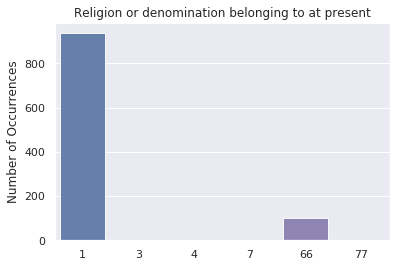

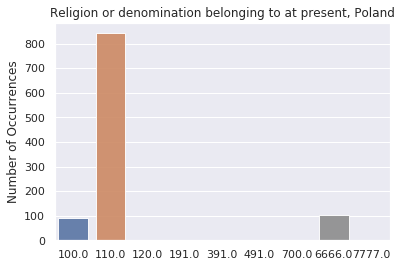

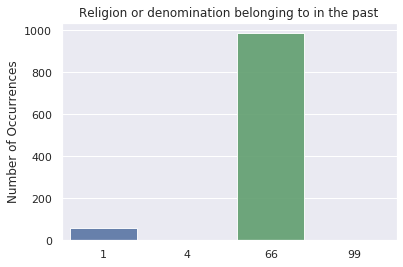

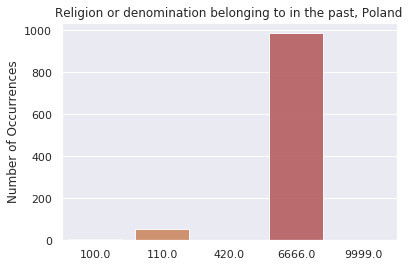

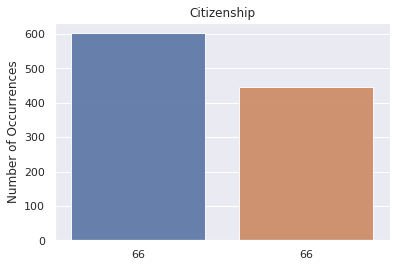

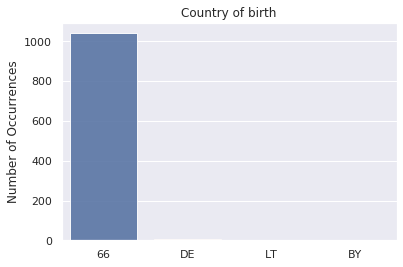

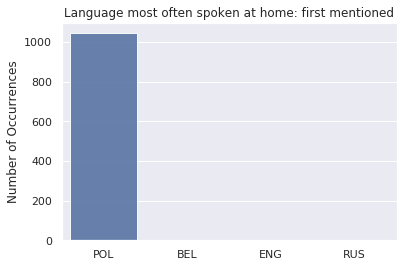

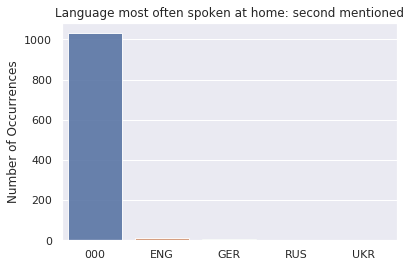

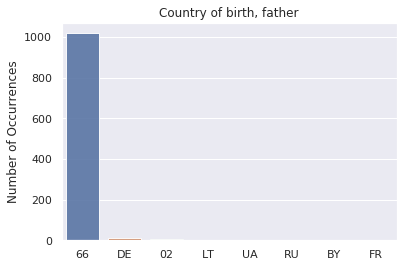

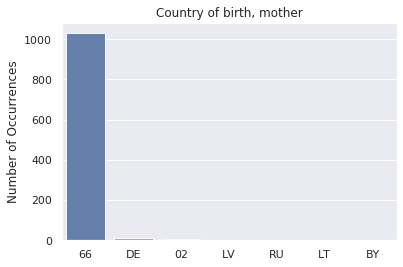

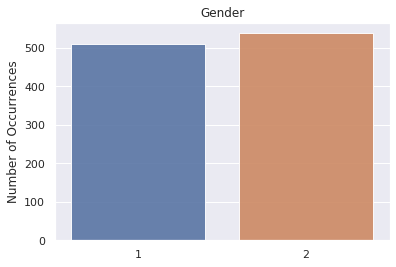

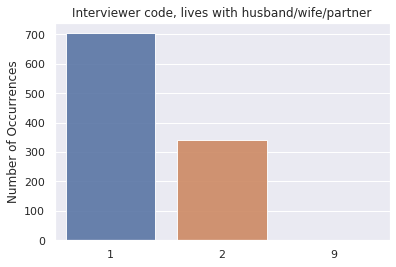

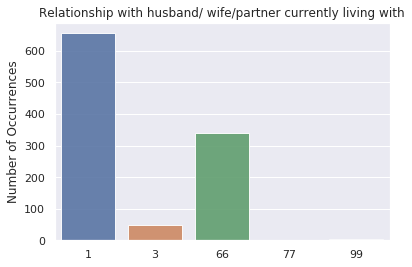

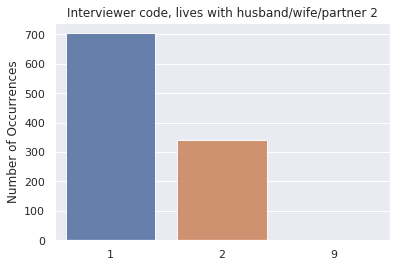

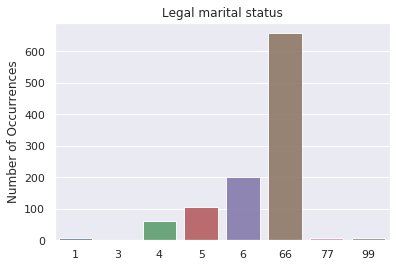

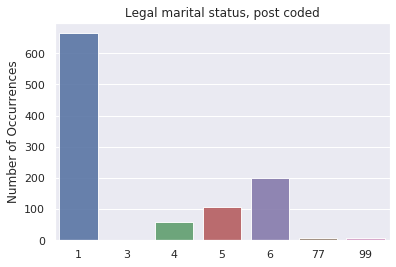

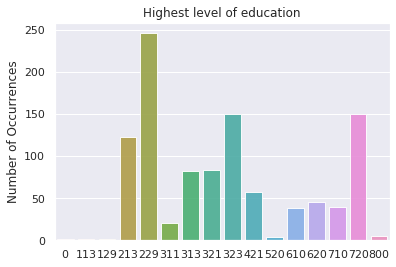

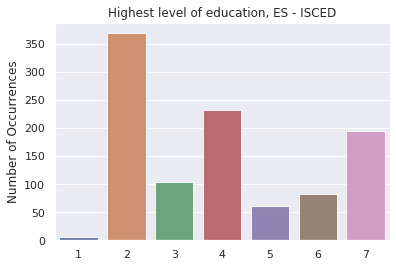

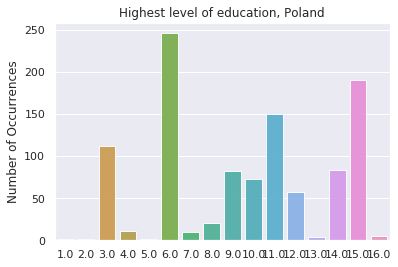

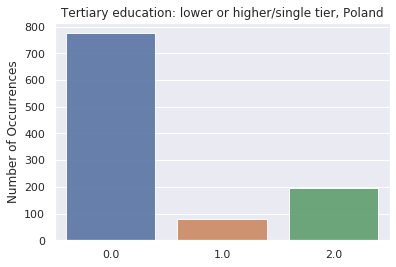

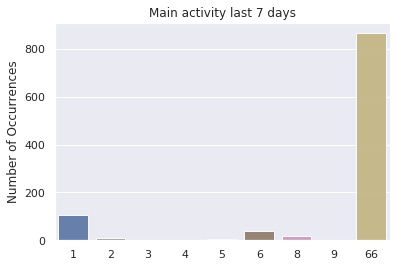

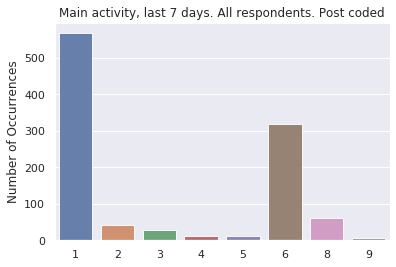

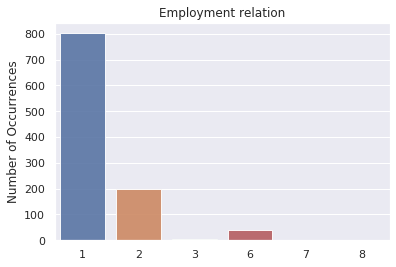

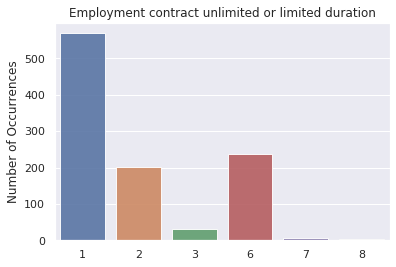

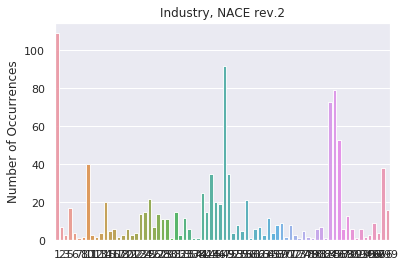

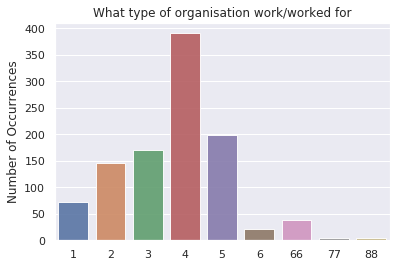

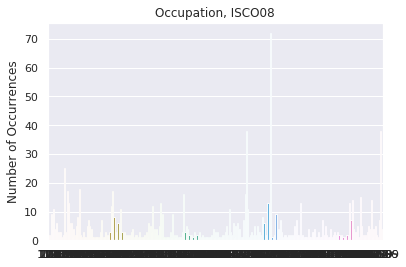

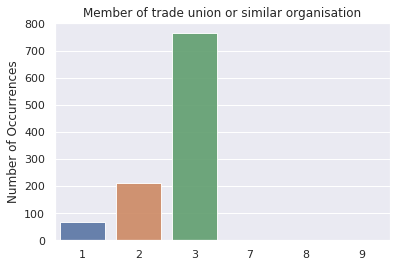

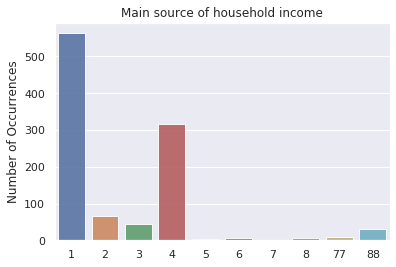

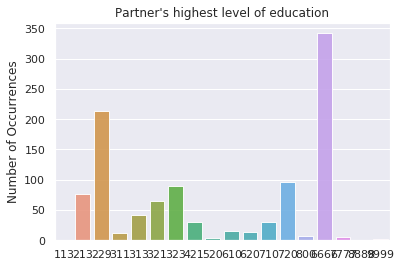

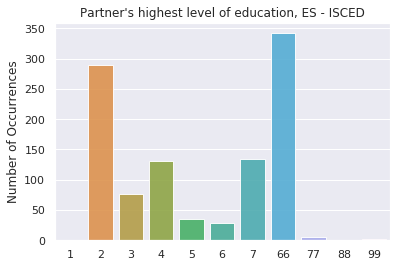

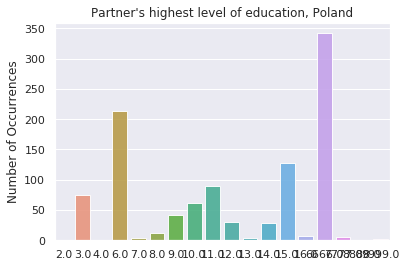

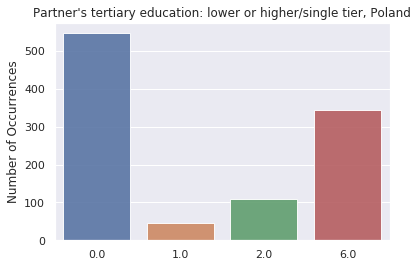

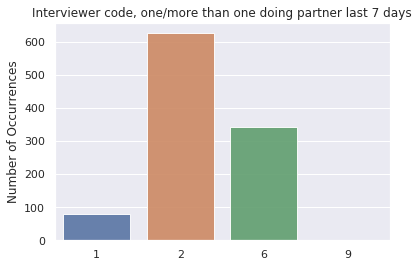

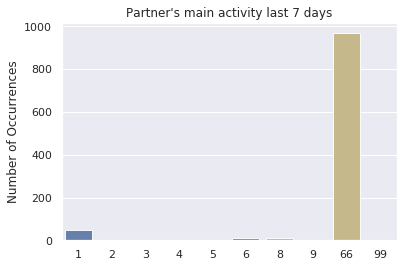

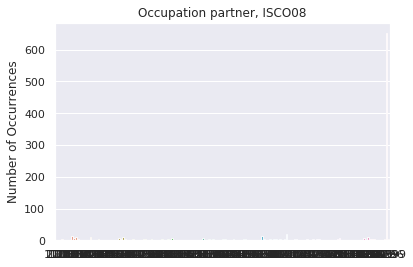

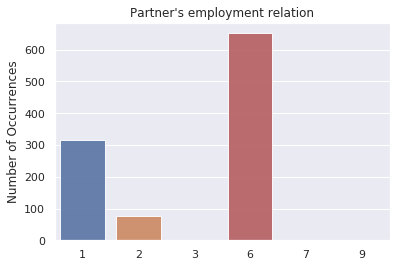

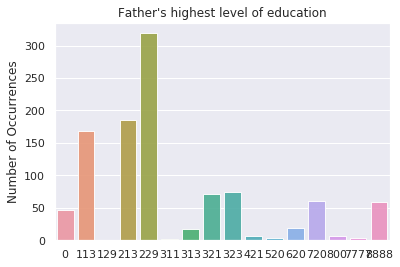

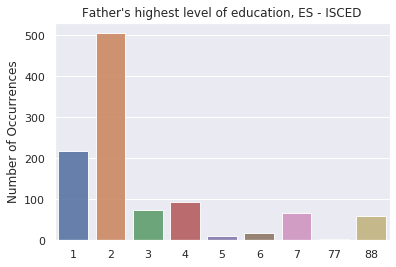

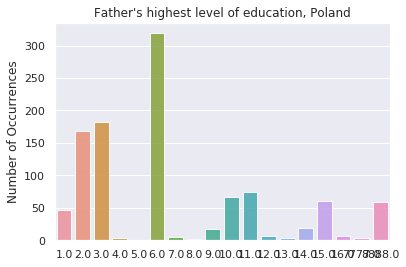

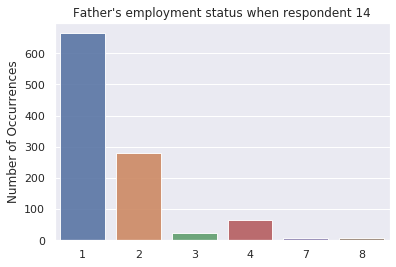

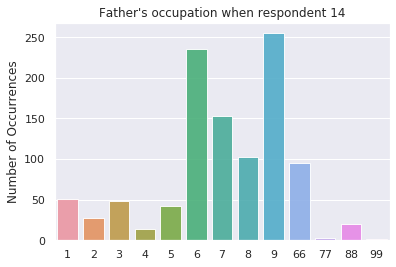

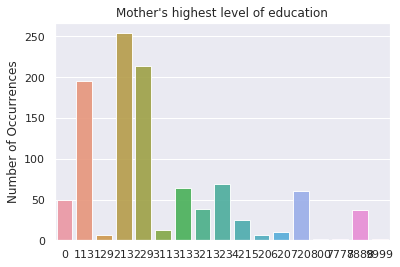

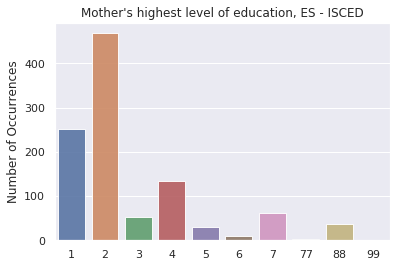

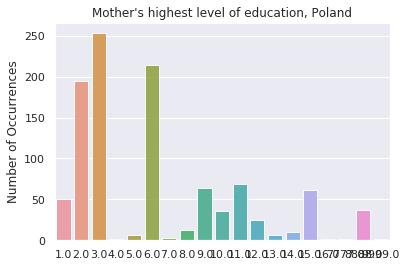

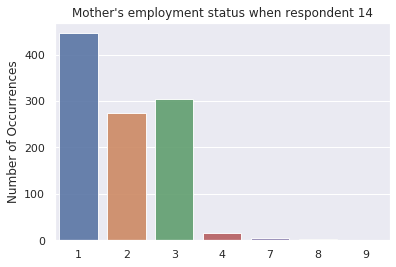

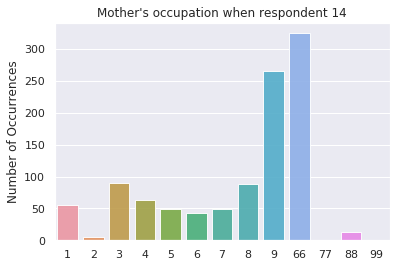

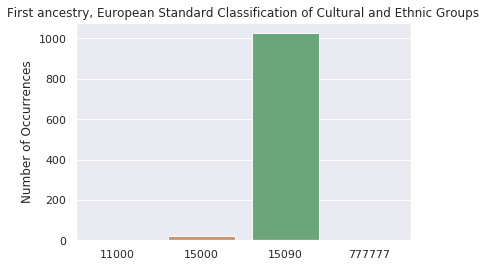

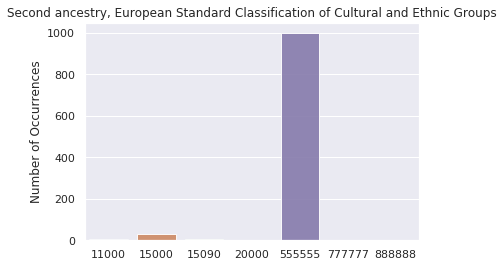

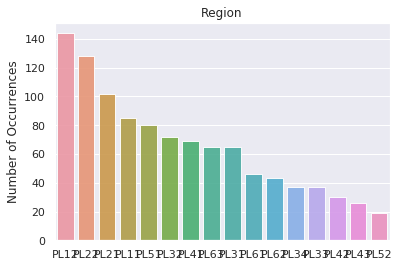

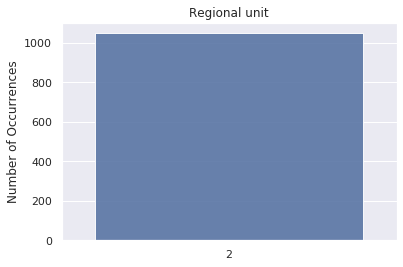

In [62]:
for i in range(df_nominal.columns.shape[0]):
    chart_data = df_nominal.iloc[:,i].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(chart_data.index, chart_data.values, alpha=0.9)
    plt.title(df_nominal.columns[i])
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.show()

Listing nominal variables frequencies

In [63]:
for i in range(df_nominal.columns.shape[0]):
    print(df_nominal.iloc[:,i].value_counts(normalize=True))

1     0.894084
66    0.098282
77    0.002863
3     0.002863
7     0.000954
4     0.000954
Name: Religion or denomination belonging to at present, dtype: float64
110.0     0.803435
6666.0    0.098282
100.0     0.087786
391.0     0.002863
7777.0    0.002863
120.0     0.001908
191.0     0.000954
700.0     0.000954
491.0     0.000954
Name: Religion or denomination belonging to at present, Poland, dtype: float64
66    0.940840
1     0.055344
99    0.001908
4     0.001908
Name: Religion or denomination belonging to in the past, dtype: float64
6666.0    0.940840
110.0     0.051527
100.0     0.003817
420.0     0.001908
9999.0    0.001908
Name: Religion or denomination belonging to in the past, Poland, dtype: float64
66    0.574427
66    0.425573
Name: Citizenship, dtype: float64
66    0.993321
DE    0.004771
LT    0.000954
BY    0.000954
Name: Country of birth, dtype: float64
POL    0.996183
BEL    0.001908
ENG    0.000954
RUS    0.000954
Name: Language most often spoken at home: first mention

2     0.481870
1     0.207061
4     0.088740
3     0.070611
7     0.063931
88    0.056298
6     0.018130
5     0.009542
77    0.003817
Name: Father's highest level of education, ES - ISCED, dtype: float64
6.0       0.304389
3.0       0.174618
2.0       0.161260
11.0      0.071565
10.0      0.063931
15.0      0.057252
8888.0    0.056298
1.0       0.044847
14.0      0.018130
9.0       0.017176
16.0      0.006679
12.0      0.006679
7.0       0.004771
7777.0    0.003817
4.0       0.002863
13.0      0.002863
8.0       0.001908
5.0       0.000954
Name: Father's highest level of education, Poland, dtype: float64
1    0.633588
2    0.268130
4    0.062023
3    0.022901
8    0.007634
7    0.005725
Name: Father's employment status when respondent 14, dtype: float64
9     0.243321
6     0.225191
7     0.145992
8     0.097328
66    0.090649
1     0.048664
3     0.045802
5     0.040076
2     0.026718
88    0.019084
4     0.013359
77    0.002863
99    0.000954
Name: Father's occupation when responden

#### Removing nominal variables which contain more general information than ones also available in the dataset:

1) Religion or denomination belonging to at present --> Religion or denomination belonging to at present, Poland (more specific)

2) Religion or denomination belonging to in the past --> Religion or denomination belonging to in the past, Poland (more specific)

3) Interviewer code, lives with husband/wife/partner --> Relationship with husband/ wife/partner currently living with (more specific)

4) Interviewer code, lives with husband/wife/partner 2 (the same as Interviewer code, lives with husband/wife/partner)

5) Legal marital status --> Legal marital status, post coded (Better quality information - merged from 2 variables)

6) Highest level of education; Highest level of education, ES - ISCED --> Country-specific data available in: Highest level of education, Poland

7) Main activity last 7 days --> Main activity, last 7 days. All respondents. Post coded (more specific data)

8) Partner's highest level of education; Partner's highest level of education, ES - ISCED --> Country-specific data available in: Partner's highest level of education, Poland

9) Father's highest level of education; Father's highest level of education, ES - ISCED --> Country-specific data available in: Father's highest level of education, Poland 

10) Mother's highest level of education; Mother's highest level of education, ES - ISCED --> Country-specific data available in: Mother's highest level of education, Poland


In [64]:
df_nominal = df_nominal.drop(["Religion or denomination belonging to at present",
                             "Religion or denomination belonging to in the past",
                             "Interviewer code, lives with husband/wife/partner",
                             "Interviewer code, lives with husband/wife/partner 2",
                             "Legal marital status",
                             "Highest level of education",
                             "Highest level of education, ES - ISCED",
                             "Main activity last 7 days",
                             "Partner's highest level of education",
                             "Partner's highest level of education, ES - ISCED",
                             "Father's highest level of education",
                             "Father's highest level of education, ES - ISCED",
                             "Mother's highest level of education",
                             "Mother's highest level of education, ES - ISCED"], axis=1)

In [65]:
df_nominal.shape

(1048, 37)

#### Removing variables with missing data > 80%

In [66]:
df_nominal = df_nominal.drop(["Citizenship",
                             "Country of birth, father",
                             "Country of birth, mother",
                             "Partner's main activity last 7 days",
                             "Language most often spoken at home: second mentioned",
                             "Religion or denomination belonging to in the past, Poland"], axis=1)

In [67]:
df_nominal.shape

(1048, 31)

##### Removing variables with just one answer or (just one answer + missing data) accounting for more than 95% of answers

In [68]:
df_nominal = df_nominal.drop(["Language most often spoken at home: first mentioned",
                        "First ancestry, European Standard Classification of Cultural and Ethnic Groups",
                        "Regional unit",
                        "Region",
                        "Country of birth",
                        "Second ancestry, European Standard Classification of Cultural and Ethnic Groups"], axis=1)

In [69]:
df_nominal.shape

(1048, 28)

#### Removing variables which meaning is not clear

In [70]:
df_nominal = df_nominal.drop(['Interviewer code, one/more than one doing partner last 7 days'], axis = 1)

#### Dropping variables with too many values

In [85]:
df_nominal = df_nominal.drop(["Occupation, ISCO08", "Occupation partner, ISCO08","Industry, NACE rev.2"], axis = 1)

#### Deleting variables not referring directly to the respondent

In [74]:
df_nominal = df_nominal.drop(["Partner's highest level of education, Poland",
                             "Partner's employment relation",
                             "Father's highest level of education, Poland",
                             "Father's employment status when respondent 14",
                             "Father's occupation when respondent 14",
                             "Mother's highest level of education, Poland",
                             "Mother's employment status when respondent 14",
                             "Mother's occupation when respondent 14"], axis = 1)

#### Removing variables redundant for other reasons

1) "Relationship with husband/ wife/partner currently living with" - very similar to Legal marital status, post-coded (with more missing values)

2) "Tertiary education: lower or higher/single tier, Poland" - values basically contained within Highest level of education, Poland

3) "Partner's tertiary education: lower or higher/single tier, Poland" --> values basically contained within Highest level of education, Poland

In [71]:
df_nominal = df_nominal.drop(["Partner's tertiary education: lower or higher/single tier, Poland",
                             "Relationship with husband/ wife/partner currently living with",
                             "Tertiary education: lower or higher/single tier, Poland"], axis = 1)

In [75]:
df_nominal.shape

(1048, 13)

In [77]:
df_nominal.columns

Index(['Religion or denomination belonging to at present, Poland', 'Gender',
       'Legal marital status, post coded',
       'Highest level of education, Poland',
       'Main activity, last 7 days. All respondents. Post coded',
       'Employment relation',
       'Employment contract unlimited or limited duration',
       'Industry, NACE rev.2', 'What type of organisation work/worked for',
       'Occupation, ISCO08', 'Member of trade union or similar organisation',
       'Main source of household income', 'Occupation partner, ISCO08'],
      dtype='object')

Listing all nominal variables selected to be in the final model

In [78]:
for i in range(df_nominal.columns.shape[0]):
    print(df_nominal.iloc[:,i].value_counts(normalize=True))

110.0     0.803435
6666.0    0.098282
100.0     0.087786
391.0     0.002863
7777.0    0.002863
120.0     0.001908
191.0     0.000954
700.0     0.000954
491.0     0.000954
Name: Religion or denomination belonging to at present, Poland, dtype: float64
2    0.513359
1    0.486641
Name: Gender, dtype: float64
1     0.633588
6     0.190840
5     0.102099
4     0.057252
77    0.007634
99    0.006679
3     0.001908
Name: Legal marital status, post coded, dtype: float64
6.0     0.234733
15.0    0.181298
11.0    0.143130
3.0     0.106870
14.0    0.079198
9.0     0.078244
10.0    0.069656
12.0    0.054389
8.0     0.019084
4.0     0.010496
7.0     0.009542
16.0    0.004771
13.0    0.003817
1.0     0.001908
5.0     0.001908
2.0     0.000954
Name: Highest level of education, Poland, dtype: float64
1    0.541985
6    0.304389
8    0.058206
2    0.039122
3    0.025763
4    0.012405
5    0.011450
9    0.006679
Name: Main activity, last 7 days. All respondents. Post coded, dtype: float64
1    0.765267


### Recoding nominal variables

Recoding Highest level of education, Poland: 1-4 --> 1, 5-13 --> 2, 15,16 --> 3 (Result: 1 - primary, 
2 - secondary, 3 - tertiary (full), 14 - tertiary:bachelor or engineer)

In [79]:
df_nominal["Highest level of education, Poland"][df_nominal["Highest level of education, Poland"].isin([1,2,3,4])] = 1
df_nominal["Highest level of education, Poland"][df_nominal["Highest level of education, Poland"].isin(range(5,14))] = 2
df_nominal["Highest level of education, Poland"][df_nominal["Highest level of education, Poland"].isin(range(15,17))] = 3

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separat

Recoding religion or denomination into 0-1 (0 - religious, 1 - not religious) [6666 = not applicable; 7777 = Refusal, also categorized here as religious]

In [81]:
df_nominal["Religion or denomination belonging to at present, Poland"][df_nominal["Religion or denomination belonging to at present, Poland"] != 6666] = 1
df_nominal["Religion or denomination belonging to at present, Poland"][df_nominal["Religion or denomination belonging to at present, Poland"] == 6666] = 0

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Due to its binary form now, "Religion or denomination belonging to at present, Poland" will be moved to binary variables in one of the further steps.

Recoding missing variables for remaining variables - replacement with most frequent category

In [82]:
# Recoding missing variables
var = df_nominal.columns
for i in var:
    df_nominal[i][df_nominal[i].isin([77, 88, 99])] = df_nominal[i][~df_nominal[i].isin([77, 88, 99])].value_counts().idxmax()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [86]:
for i in range(df_nominal.columns.shape[0]):
    print(df_nominal.iloc[:,i].value_counts(normalize=True))

1.0    0.901718
0.0    0.098282
Name: Religion or denomination belonging to at present, Poland, dtype: float64
2    0.513359
1    0.486641
Name: Gender, dtype: float64
1    0.647901
6    0.190840
5    0.102099
4    0.057252
3    0.001908
Name: Legal marital status, post coded, dtype: float64
2.0     0.614504
3.0     0.186069
1.0     0.120229
14.0    0.079198
Name: Highest level of education, Poland, dtype: float64
1    0.541985
6    0.304389
8    0.058206
2    0.039122
3    0.025763
4    0.012405
5    0.011450
9    0.006679
Name: Main activity, last 7 days. All respondents. Post coded, dtype: float64
1    0.765267
2    0.190840
6    0.036260
3    0.003817
8    0.001908
7    0.001908
Name: Employment relation, dtype: float64
1    0.542939
6    0.227099
2    0.191794
3    0.029580
7    0.004771
8    0.003817
Name: Employment contract unlimited or limited duration, dtype: float64
4     0.380725
5     0.189885
3     0.163168
2     0.139313
1     0.069656
66    0.036260
6     0.020992
Name:

In [87]:
df_nominal.shape

(1048, 10)

#### ONE HOT ENCODING

In [154]:
from sklearn.preprocessing import OneHotEncoder

In [155]:
ohe = OneHotEncoder()

In [156]:
x = np.arange(1048)
y = pd.DataFrame(x, columns=["A"])

In [157]:
# This loop's aim is One Hot Encoding of all nominal variables
for i in range(df_nominal.shape[1]):
#  first, name of the feature is being saved   
    new_name = df_nominal.iloc[:,i].name
#   Then, number of unique values is being calculated - one is to be dropped soon
    new_index_no = df_nominal.iloc[:,i].value_counts().count()
#   New_index is created based on indexes of values 
    new_index = df_nominal.iloc[:,i].value_counts().index
    new_index = new_index.sort_values()
#   One Hot Encoding is happening at this step
    new = ohe.fit_transform(df_nominal.iloc[:,i].values.reshape(-1,1)).toarray()
    new = pd.DataFrame(new[:,:-1])
    z = []
# list of column names is being created
    for j in range(new_index_no-1):
        x = new_name + "_" + str(new_index[j])
        z.append(x)
    new.columns = z
    y = y.join(new) 
# Dropping additional feature used to create a data frame with proper dimensions
y = y.drop(["A"], axis=1)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories

In [158]:
y.shape

(1048, 46)

In [159]:
y.head(5)

Legal marital status, post coded_1  Legal marital status, post coded_3  \
0                                 1.0                                 0.0   
1                                 1.0                                 0.0   
2                                 0.0                                 0.0   
3                                 0.0                                 0.0   
4                                 0.0                                 0.0   

   Legal marital status, post coded_4  Legal marital status, post coded_5  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 0.0   
3                                 0.0                                 1.0   
4                                 0.0                                 0.0   

   Highest level of education, Poland_1.0  \
0                                     0.0   
1                                     1.0   
2                                     0.0   
3                                     1.0   
4                                     0.0   

   Highest level of education, Poland_2.0  \
0                                     0.0   
1                                     0.0   
2                                     1.0   
3                                     0.0   
4                                     1.0   

   Highest level of education, Poland_3.0  \
0                                     1.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   Main activity, last 7 days. All respondents. Post coded_1  \
0                                                1.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                1.0           

   Main activity, last 7 days. All respondents. Post coded_2  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   Main activity, last 7 days. All respondents. Post coded_3  \
0                                                0.0           
1                                                0.0           
2                                                1.0           
3                                                0.0           
4                                                0.0           

   Main activity, last 7 days. All respondents. Post coded_4  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   Main activity, last 7 days. All respondents. Post coded_5  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   Main activity, last 7 days. All respondents. Post coded_6  \
0                                                0.0           
1                                                1.0           
2                                                0.0           
3                                                1.0           
4                  

In [160]:
y.index = df_nominal.index

In [162]:
ohe_variables = y.copy()

Nominal variables are now ready for use in modelling.

## 5.2 Binary variables

### Preparing a separate data frame

In [90]:
labels = data_info[data_info.Scale_type == 'binary'].Label
df_binary = df_Poland[labels].copy()

Moving "Religion or denomination belonging to at present, Poland" from nominal to binary variables.

In [91]:
df_binary["Religion or denomination belonging to at present, Poland"] = df_nominal["Religion or denomination belonging to at present, Poland"]

Dropping "Religion or denomination belonging to at present, Poland" from nominal variables

In [92]:
df_nominal = df_nominal.drop(["Religion or denomination belonging to at present, Poland"], axis=1)

### Binary variables overview & removing redundant variables

Displaying all variables

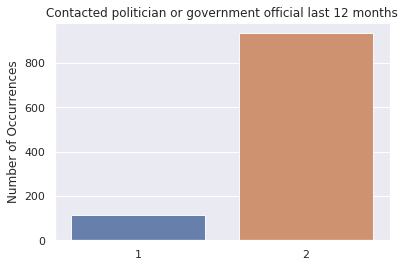

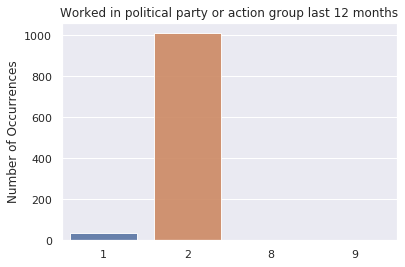

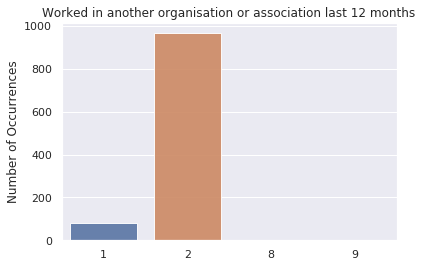

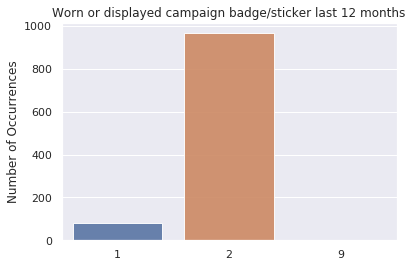

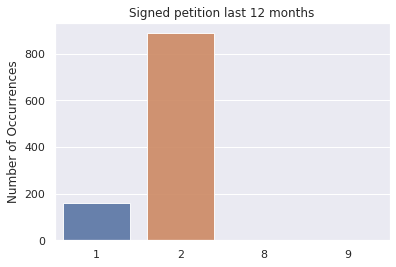

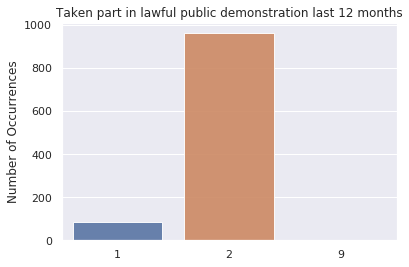

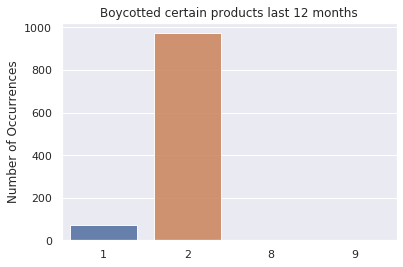

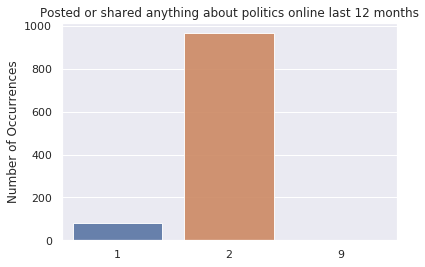

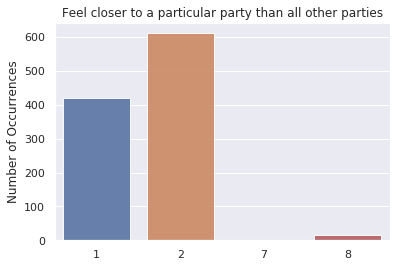

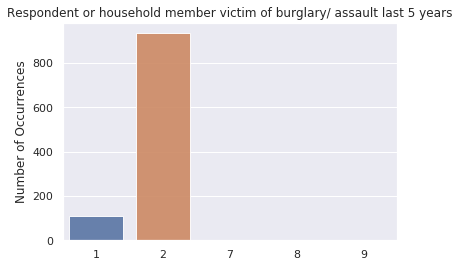

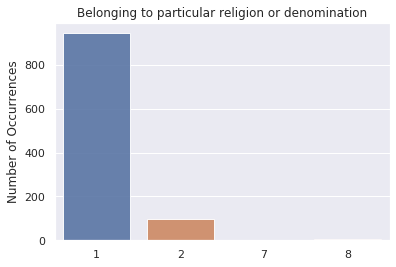

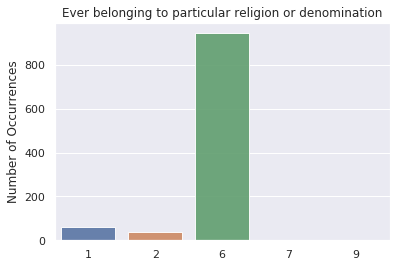

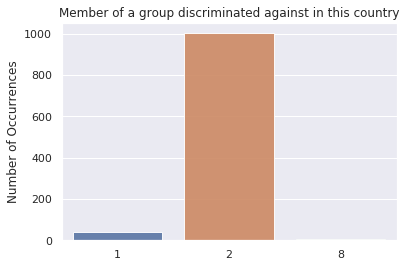

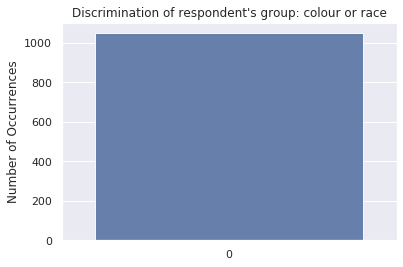

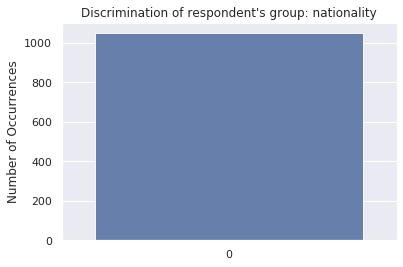

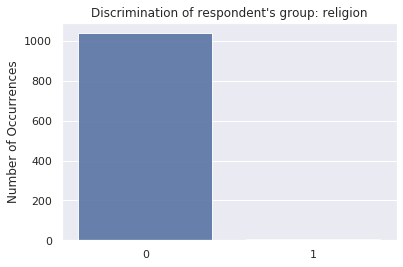

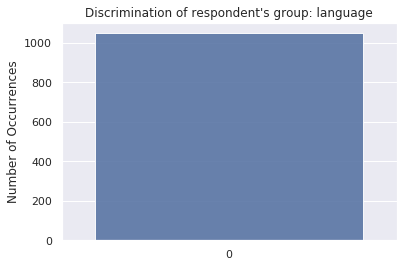

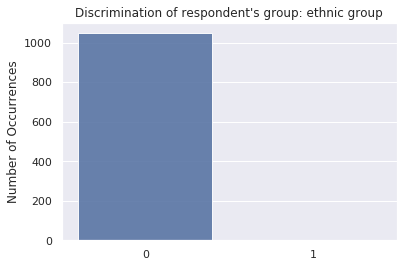

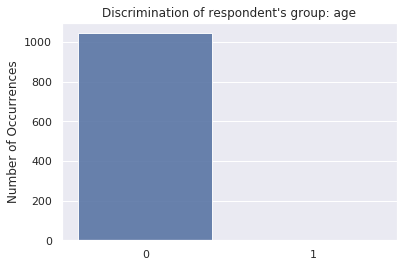

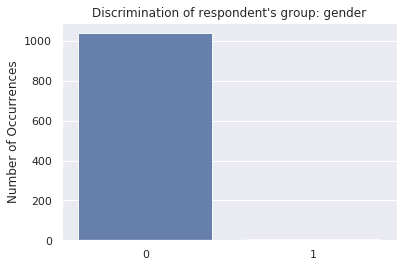

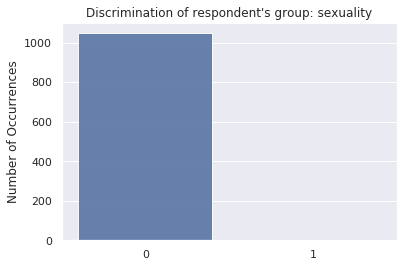

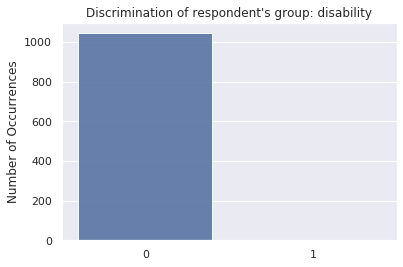

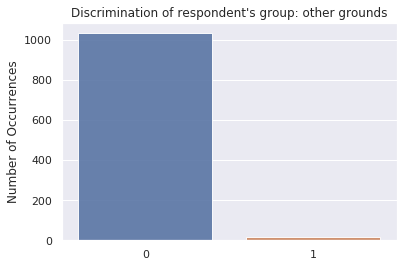

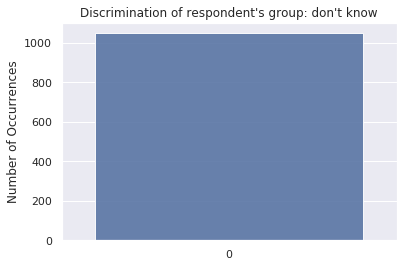

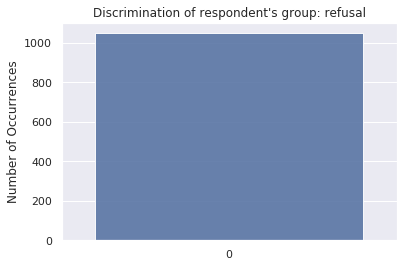

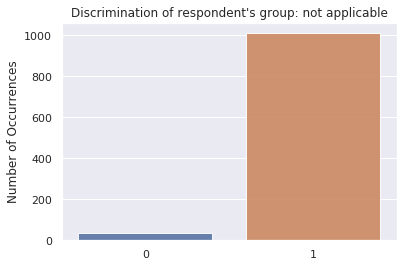

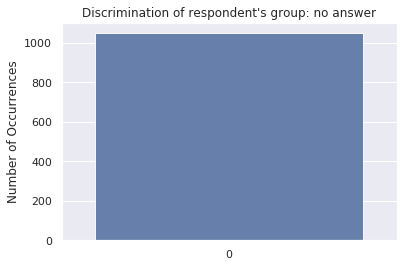

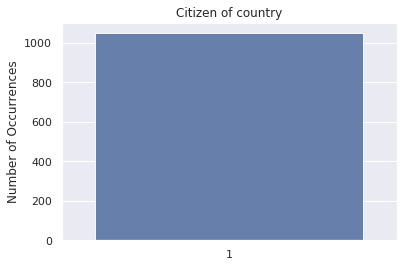

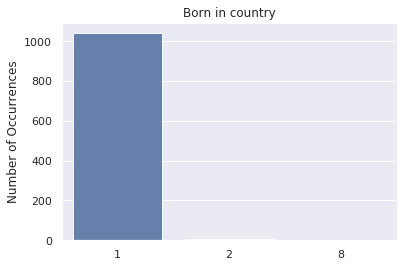

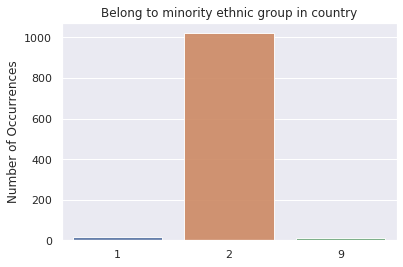

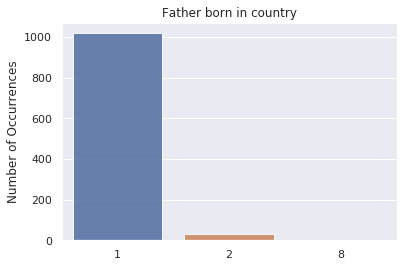

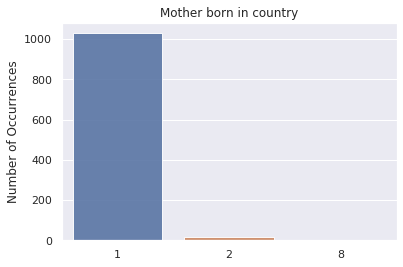

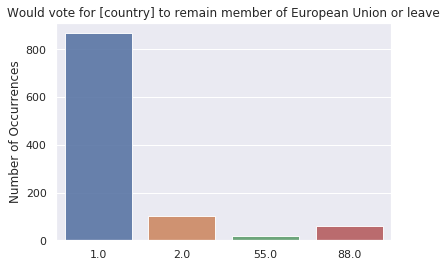

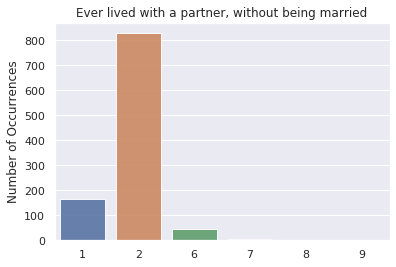

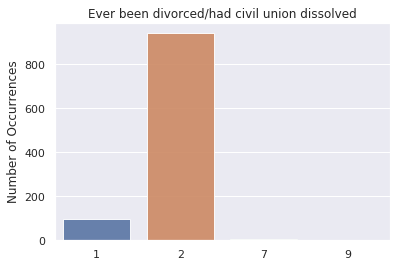

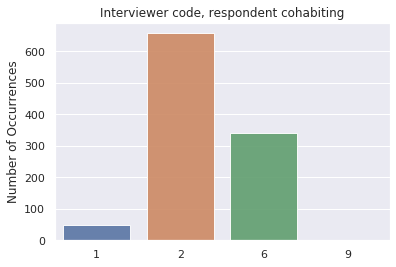

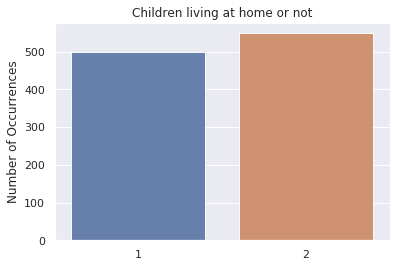

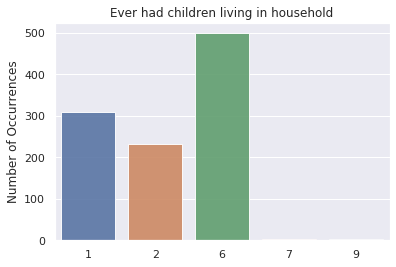

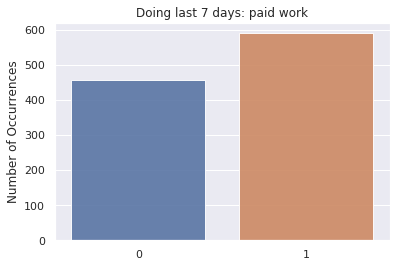

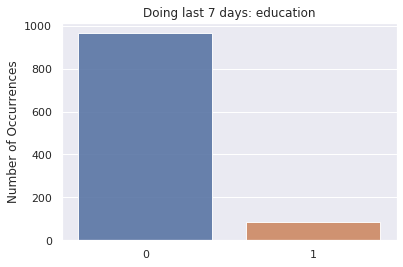

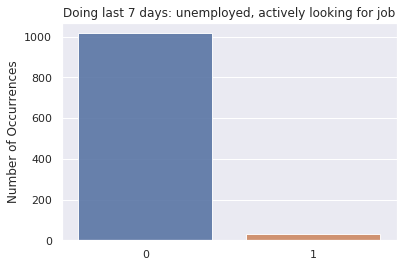

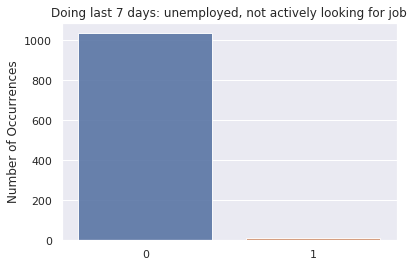

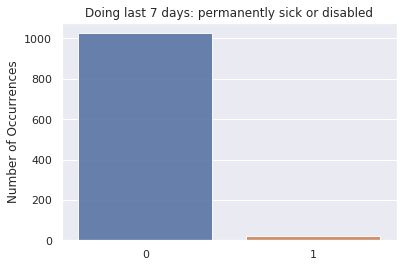

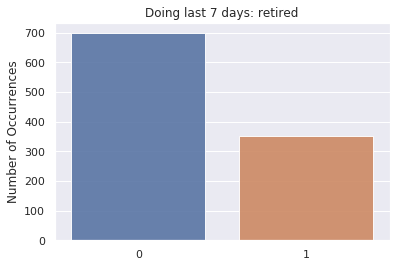

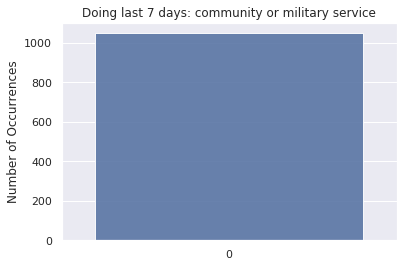

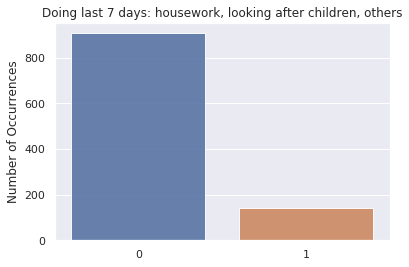

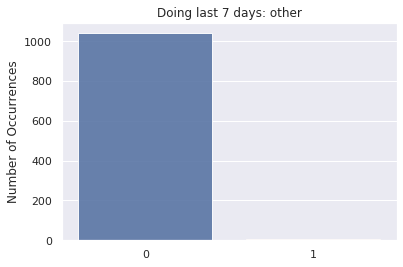

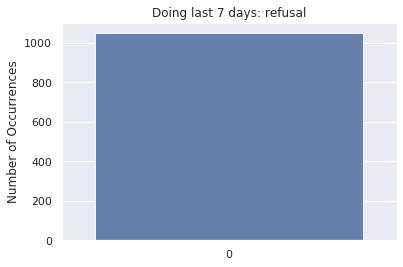

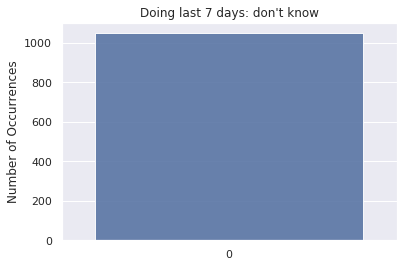

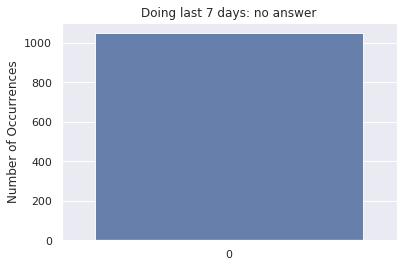

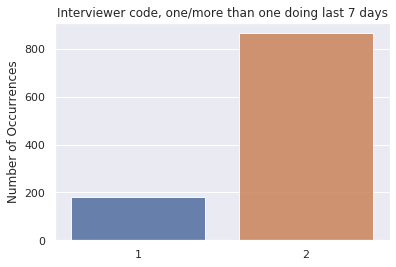

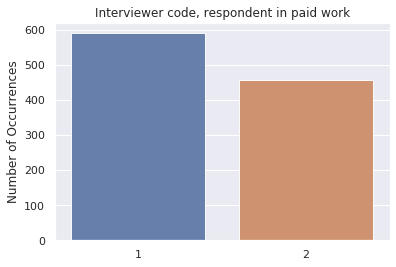

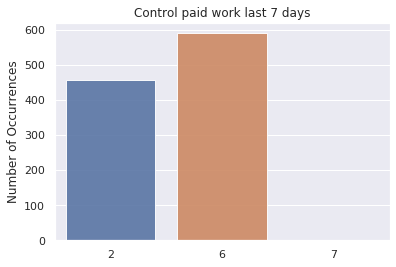

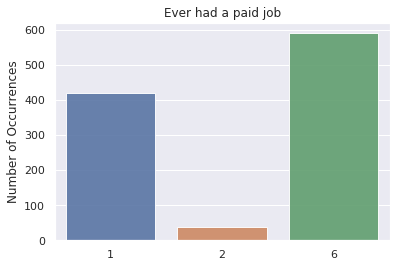

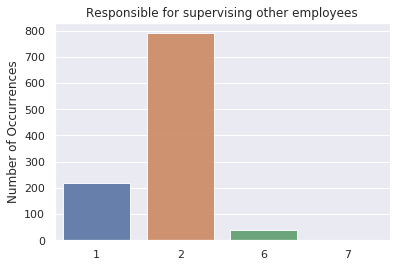

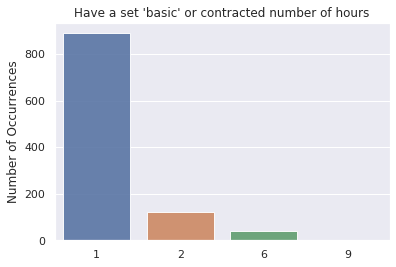

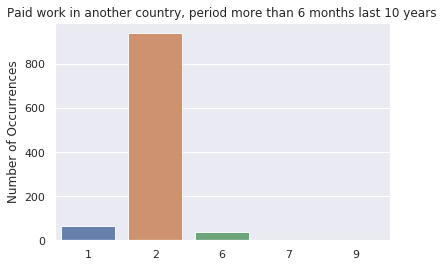

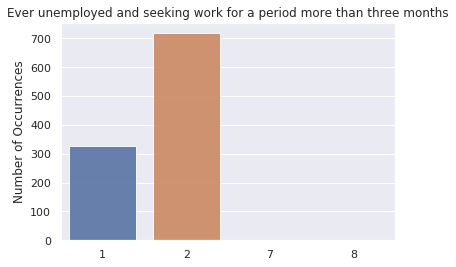

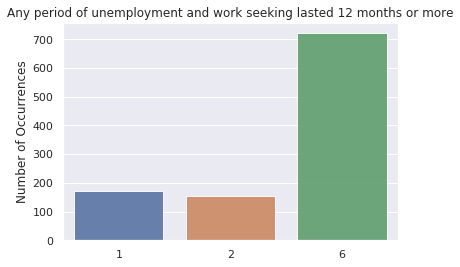

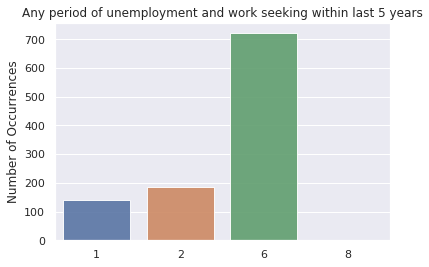

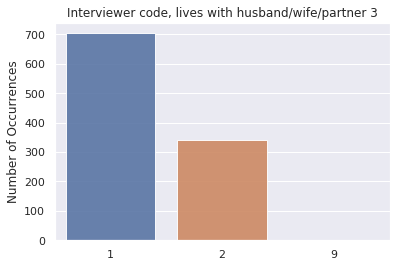

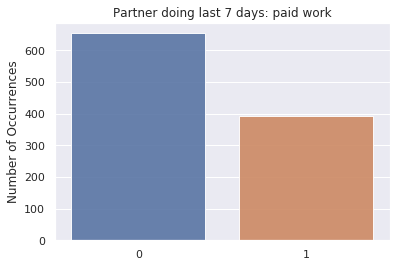

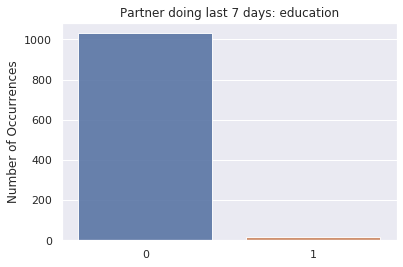

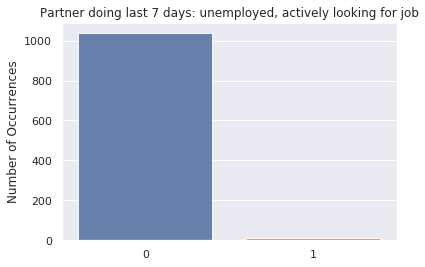

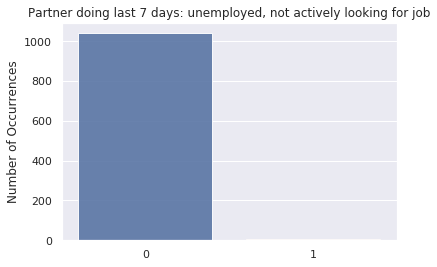

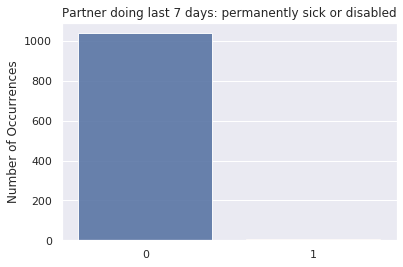

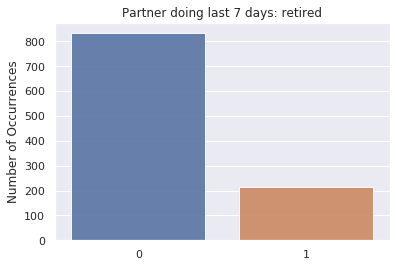

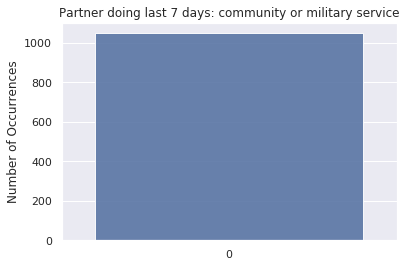

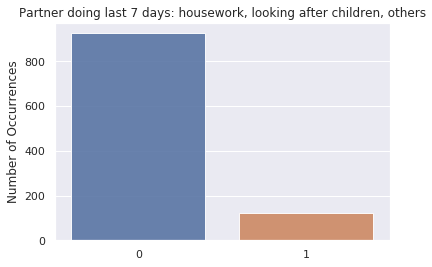

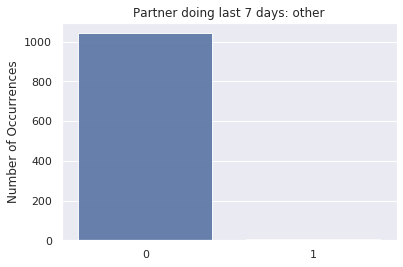

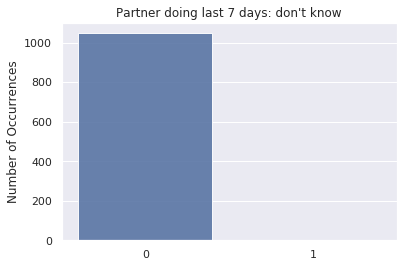

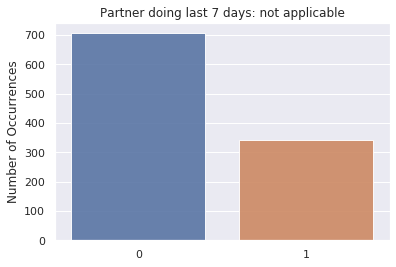

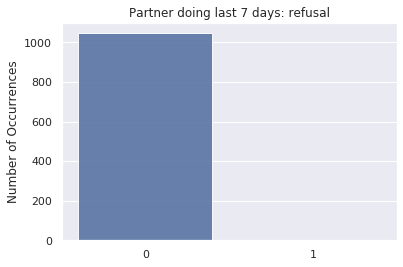

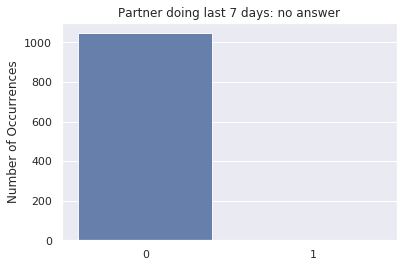

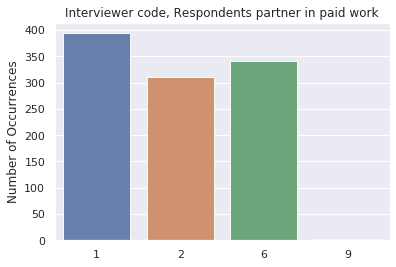

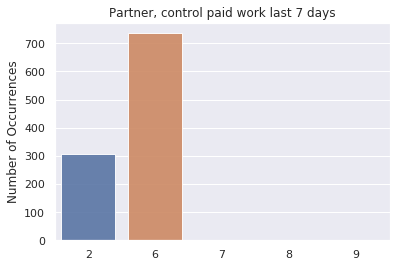

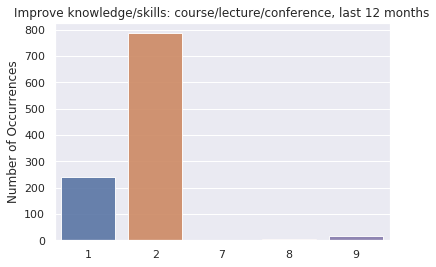

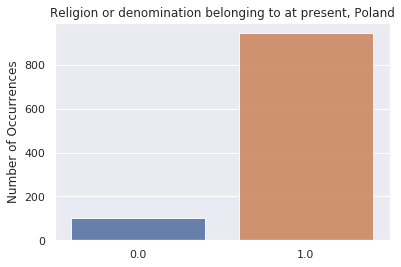

In [93]:
for i in range(df_binary.columns.shape[0]):
    chart_data = df_binary.iloc[:,i].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(chart_data.index, chart_data.values, alpha=0.9)
    plt.title(df_binary.columns[i])
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.show()

Listing all variables' frequencies

In [94]:
for i in range(df_binary.columns.shape[0]):
    print(df_binary.iloc[:,i].value_counts(normalize=True))

2    0.891221
1    0.108779
Name: Contacted politician or government official last 12 months, dtype: float64
2    0.963740
1    0.034351
9    0.000954
8    0.000954
Name: Worked in political party or action group last 12 months, dtype: float64
2    0.922710
1    0.075382
9    0.000954
8    0.000954
Name: Worked in another organisation or association last 12 months, dtype: float64
2    0.921756
1    0.077290
9    0.000954
Name: Worn or displayed campaign badge/sticker last 12 months, dtype: float64
2    0.846374
1    0.151718
9    0.000954
8    0.000954
Name: Signed petition last 12 months, dtype: float64
2    0.917939
1    0.080153
9    0.001908
Name: Taken part in lawful public demonstration last 12 months, dtype: float64
2    0.928435
1    0.066794
9    0.002863
8    0.001908
Name: Boycotted certain products last 12 months, dtype: float64
2    0.921756
1    0.076336
9    0.001908
Name: Posted or shared anything about politics online last 12 months, dtype: float64
2    0.583015
1    0

#### Removing variables with only one value or one value accounting for over 95% of answers or one value + missing values accounting for over 95% of answers or missing values accounting for over 60% of answers.

In [95]:
df_binary = df_binary.drop(["Discrimination of respondent's group: colour or race",
                           "Discrimination of respondent's group: nationality",
                           "Discrimination of respondent's group: religion",
                           "Discrimination of respondent's group: language",
                           "Discrimination of respondent's group: ethnic group",
                           "Discrimination of respondent's group: age",
                           "Discrimination of respondent's group: gender",
                           "Discrimination of respondent's group: sexuality",
                           "Discrimination of respondent's group: disability",
                           "Discrimination of respondent's group: don't know",
                           "Discrimination of respondent's group: refusal",
                           "Discrimination of respondent's group: not applicable",
                           "Discrimination of respondent's group: no answer",
                           "Citizen of country",
                           "Born in country",
                           "Doing last 7 days: community or military service",
                           "Doing last 7 days: other",
                           "Doing last 7 days: refusal",
                           "Doing last 7 days: don't know",
                           "Doing last 7 days: no answer",
                           "Partner doing last 7 days: unemployed, actively looking for job",
                           "Partner doing last 7 days: unemployed, not actively looking for job",
                           "Partner doing last 7 days: permanently sick or disabled",
                           "Partner doing last 7 days: community or military service",
                           "Partner doing last 7 days: other",
                           "Partner doing last 7 days: don't know",
                           "Partner doing last 7 days: refusal",
                           "Worked in political party or action group last 12 months",
                           "Feel closer to a particular party than all other parties",
                           "Member of a group discriminated against in this country",
                           "Discrimination of respondent's group: other grounds",
                           "Belong to minority ethnic group in country",
                           "Father born in country",
                           "Mother born in country",
                           "Doing last 7 days: unemployed, actively looking for job",
                           "Doing last 7 days: unemployed, not actively looking for job",
                           "Doing last 7 days: permanently sick or disabled",
                           "Interviewer code, one/more than one doing last 7 days",
                           "Any period of unemployment and work seeking lasted 12 months or more",
                           "Any period of unemployment and work seeking within last 5 years",
                           "Partner, control paid work last 7 days",
                           "Belonging to particular religion or denomination",
                            "Ever belonging to particular religion or denomination",
                            "Interviewer code, respondent cohabiting",
                            "Ever had children living in household",
                            "Ever had a paid job",
                            "Interviewer code, Respondents partner in paid work"], axis=1)

Displaying remaining variables

In [101]:
df_binary.columns

Index(['Contacted politician or government official last 12 months',
       'Worked in another organisation or association last 12 months',
       'Worn or displayed campaign badge/sticker last 12 months',
       'Signed petition last 12 months',
       'Taken part in lawful public demonstration last 12 months',
       'Boycotted certain products last 12 months',
       'Posted or shared anything about politics online last 12 months',
       'Respondent or household member victim of burglary/ assault last 5 years',
       'Belonging to particular religion or denomination',
       'Ever belonging to particular religion or denomination',
       'Would vote for [country] to remain member of European Union or leave',
       'Ever lived with a partner, without being married',
       'Ever been divorced/had civil union dissolved',
       'Interviewer code, respondent cohabiting',
       'Children living at home or not',
       'Ever had children living in household', 'Doing last 7 days: paid

#### Replacing missing values with most frequent value

In [102]:
variables = df_binary_mod.columns
for i in variables:
    df_binary[i][~df_binary[i].isin([0,1,2])] = df_binary[i][df_binary[i].isin([0,1,2])].value_counts().idxmax()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Moving Gender from nominal to binary variables

In [153]:
df_binary_mod["Gender"] = df_nominal["Gender"]
df_nominal = df_nominal.drop(["Gender"], axis=1)

#### Recoding binary to 1 - yes, no - 0

In [164]:
for i in df_binary_mod.columns:
    df_binary_mod[i][df_binary_mod[i] == 2] = 0

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 5.3 Continuous variables

### Creating a separate data frame

In [106]:
labels = data_info[data_info.Scale_type == 'continuous'].Label
df_continuous = df_Poland[labels]

In [107]:
df_continuous.shape

(1048, 14)

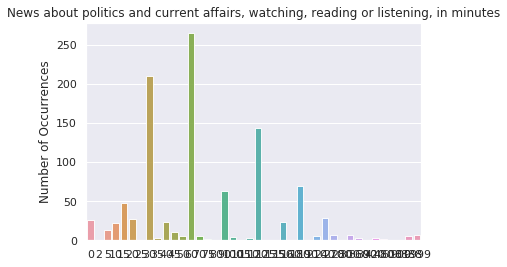

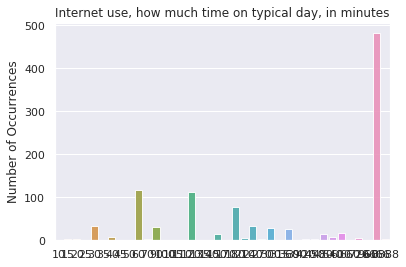

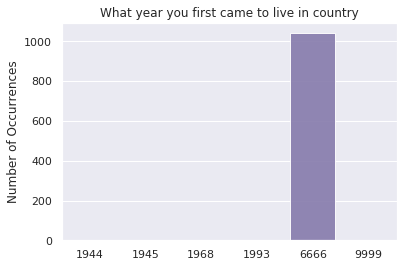

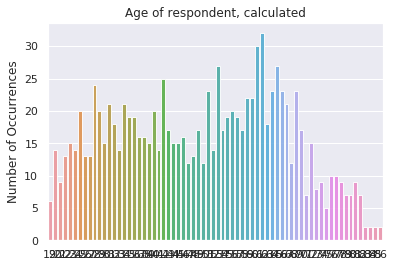

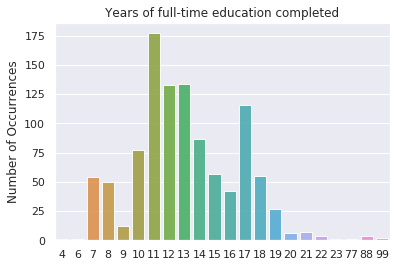

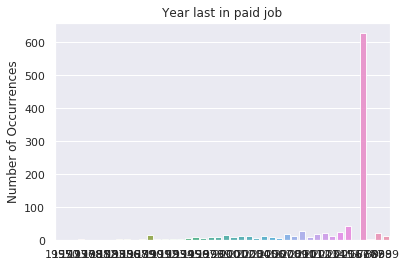

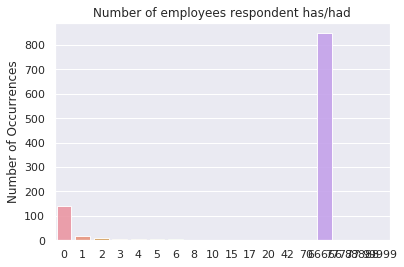

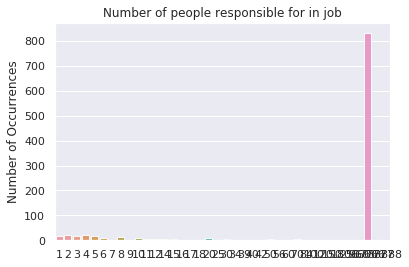

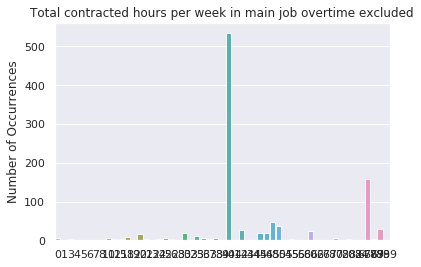

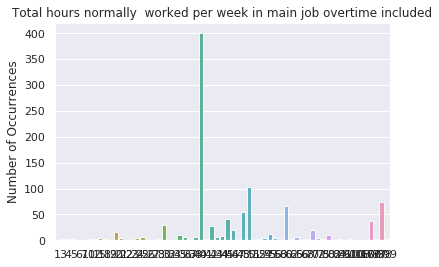

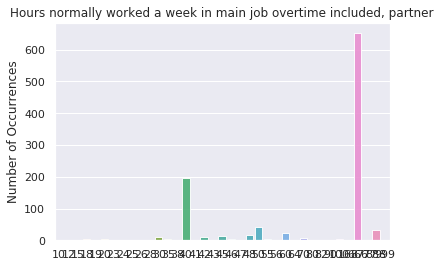

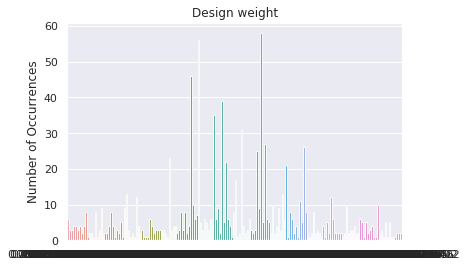

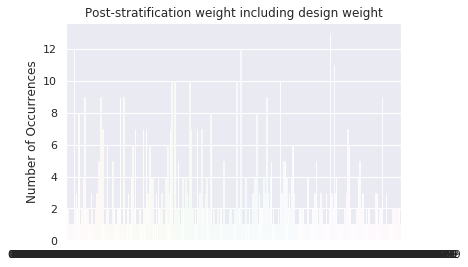

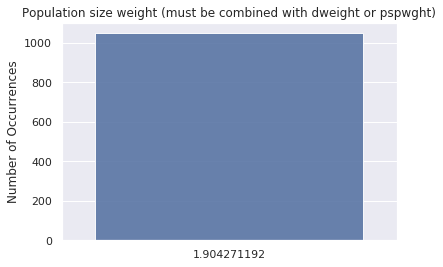

In [108]:
# loop for all variables in the data frame; chart_data - saving value_counts
for i in range(df_continuous.columns.shape[0]):
    chart_data = df_continuous.iloc[:,i].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(chart_data.index, chart_data.values, alpha=0.9)
    plt.title(df_continuous.columns[i])
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.show()

In [109]:
# Listing all values for continuous variables
for i in range(df_continuous.columns.shape[0]):
    print(df_continuous.iloc[:,i].value_counts(normalize=True))

60      0.252863
30      0.200382
120     0.137405
180     0.066794
90      0.060115
15      0.045802
240     0.027672
20      0.025763
0       0.024809
40      0.022901
150     0.021947
10      0.020992
5       0.012405
45      0.009542
9999    0.006679
270     0.006679
300     0.006679
210     0.005725
8888    0.004771
50      0.004771
70      0.004771
100     0.003817
420     0.002863
360     0.002863
110     0.002863
35      0.002863
75      0.001908
480     0.001908
390     0.000954
25      0.000954
600     0.000954
2       0.000954
160     0.000954
190     0.000954
80      0.000954
105     0.000954
900     0.000954
125     0.000954
135     0.000954
280     0.000954
Name: News about politics and current affairs, watching, reading or listening, in minutes, dtype: float64
6666    0.459924
60      0.111641
120     0.107824
180     0.074427
30      0.032443
240     0.031489
90      0.029580
300     0.026718
360     0.024809
600     0.016221
150     0.013359
480     0.013359
40      0.

### Removing variables with missing values > 60%

In [112]:
df_continuous = df_continuous.drop(["Internet use, how much time on typical day, in minutes",
                                   "What year you first came to live in country",
                                   "Year last in paid job",
                                   "Number of employees respondent has/had",
                                   "Number of people responsible for in job",
                                   "Hours normally worked a week in main job overtime included, partner",
                                   "Design weight",
                                   "Post-stratification weight including design weight",
                                   "Population size weight (must be combined with dweight or pspwght)"], axis = 1)

### Replacing missing values in remaining variables

In [118]:
df_continuous.columns

Index(['News about politics and current affairs, watching, reading or listening, in minutes',
       'Age of respondent, calculated',
       'Years of full-time education completed',
       'Total contracted hours per week in main job overtime excluded',
       'Total hours normally  worked per week in main job overtime included'],
      dtype='object')

In [121]:
# "Years of full-time education completed"
df_continuous["Years of full-time education completed"][df_continuous["Years of full-time education completed"].isin([66, 77, 88, 99])] = df_continuous["Years of full-time education completed"][~df_continuous["Years of full-time education completed"].isin([66, 77, 88, 99])].mean()

# "News about politics and current affairs, watching, reading or listening, in minutes"
df_continuous["News about politics and current affairs, watching, reading or listening, in minutes"][df_continuous["News about politics and current affairs, watching, reading or listening, in minutes"].isin([8888, 9999])] = df_continuous["News about politics and current affairs, watching, reading or listening, in minutes"][~df_continuous["News about politics and current affairs, watching, reading or listening, in minutes"].isin([8888, 9999])].mean()

# "Total contracted hours per week in main job overtime excluded"
df_continuous["Total contracted hours per week in main job overtime excluded"][df_continuous["Total contracted hours per week in main job overtime excluded"].isin([666, 777, 888, 999])] = df_continuous["Total contracted hours per week in main job overtime excluded"][~df_continuous["Total contracted hours per week in main job overtime excluded"].isin([666, 777, 888, 999])].mean()

# "Total hours normally  worked per week in main job overtime included"
df_continuous["Total hours normally  worked per week in main job overtime included"][df_continuous["Total hours normally  worked per week in main job overtime included"].isin([666, 777, 888, 999])] = df_continuous["Total hours normally  worked per week in main job overtime included"][~df_continuous["Total hours normally  worked per week in main job overtime included"].isin([666, 777, 888, 999])].mean()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [122]:
# Listing all values for continuous variables
for i in range(df_continuous.columns.shape[0]):
    print(df_continuous.iloc[:,i].value_counts(normalize=True))

60.000000     0.252863
30.000000     0.200382
120.000000    0.137405
180.000000    0.066794
90.000000     0.060115
15.000000     0.045802
240.000000    0.027672
20.000000     0.025763
0.000000      0.024809
40.000000     0.022901
150.000000    0.021947
10.000000     0.020992
5.000000      0.012405
81.314672     0.011450
45.000000     0.009542
270.000000    0.006679
300.000000    0.006679
210.000000    0.005725
70.000000     0.004771
50.000000     0.004771
100.000000    0.003817
110.000000    0.002863
360.000000    0.002863
35.000000     0.002863
420.000000    0.002863
480.000000    0.001908
75.000000     0.001908
280.000000    0.000954
105.000000    0.000954
600.000000    0.000954
125.000000    0.000954
900.000000    0.000954
135.000000    0.000954
190.000000    0.000954
390.000000    0.000954
160.000000    0.000954
80.000000     0.000954
2.000000      0.000954
25.000000     0.000954
Name: News about politics and current affairs, watching, reading or listening, in minutes, dtype: float

# 5.4 Ordinal variables

## Creating a separate data frame

In [125]:
labels = data_info[data_info.Scale_type == 'ordinal'].Label
df_ordinal = df_Poland[labels]

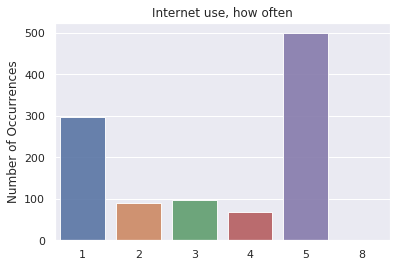

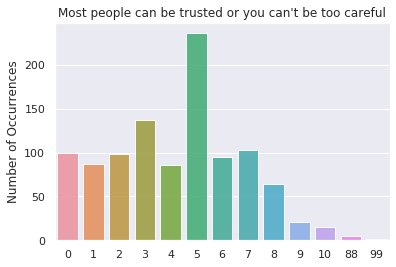

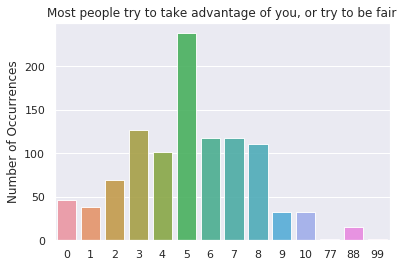

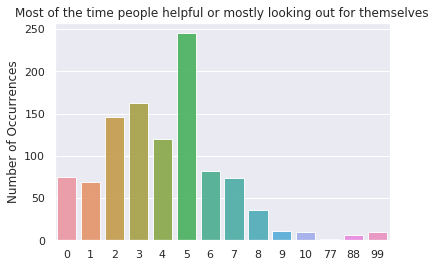

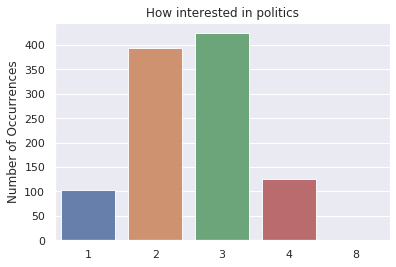

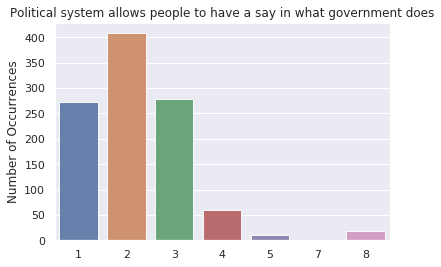

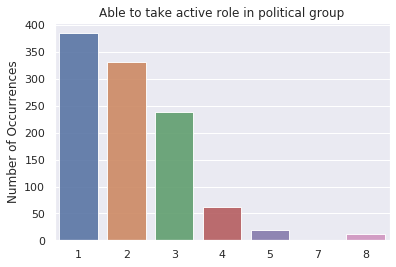

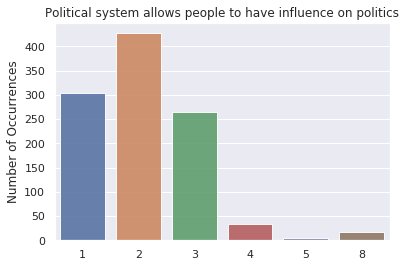

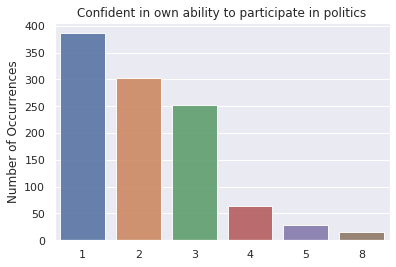

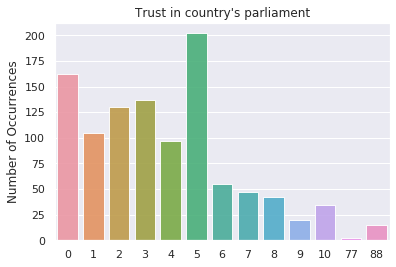

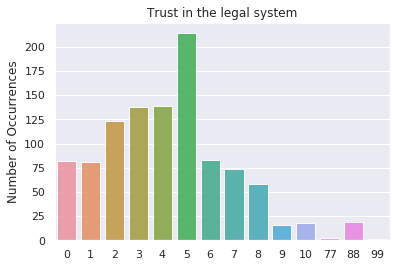

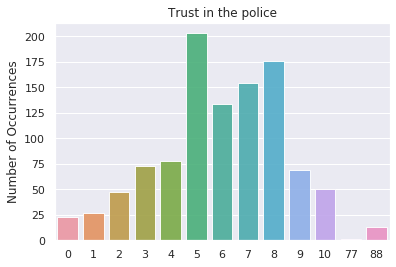

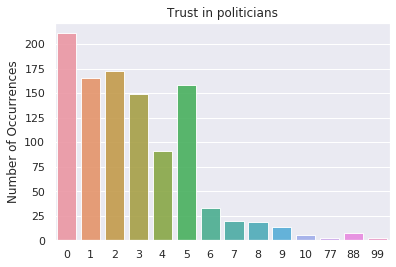

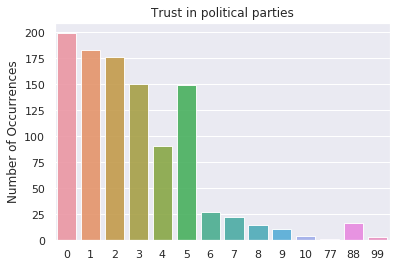

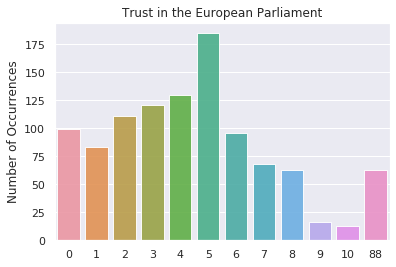

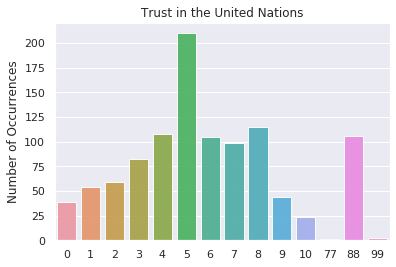

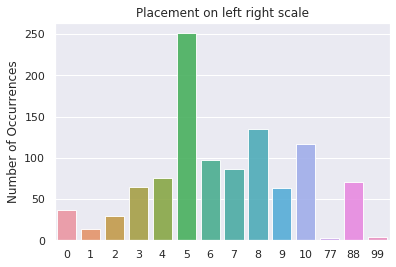

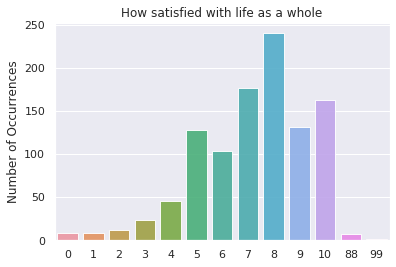

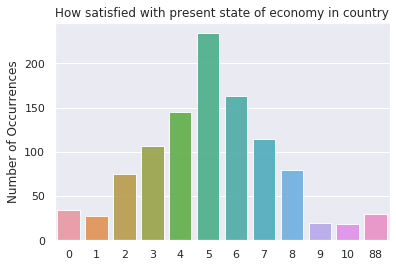

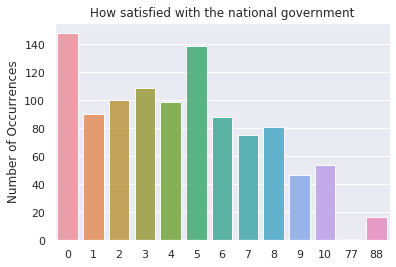

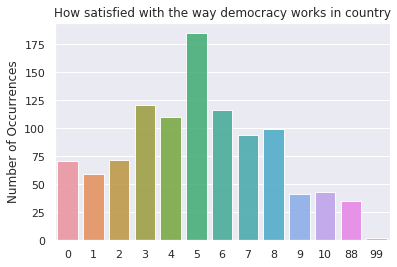

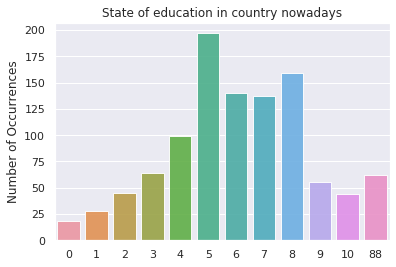

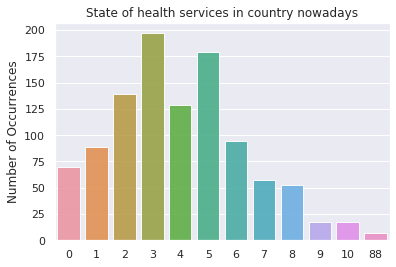

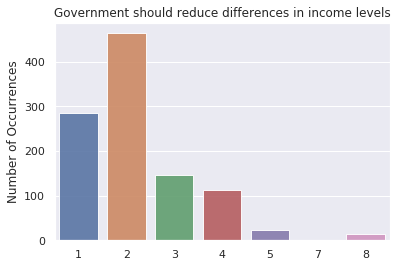

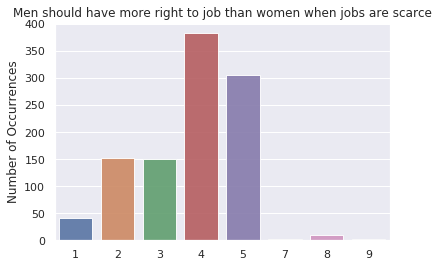

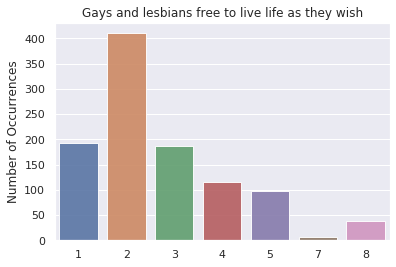

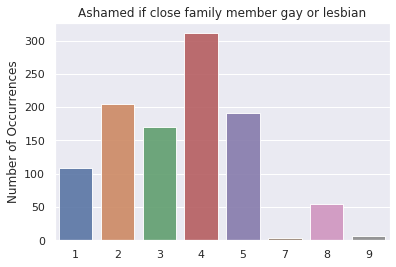

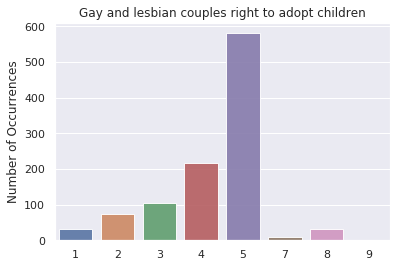

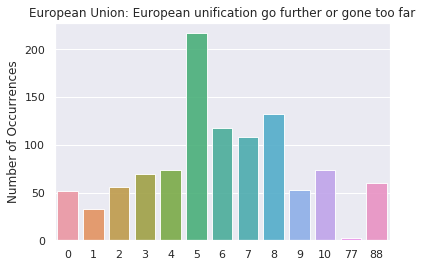

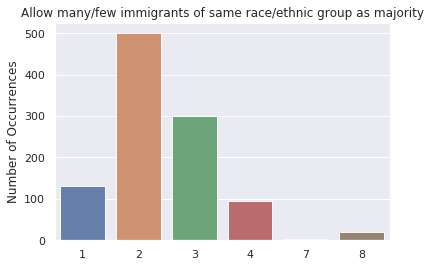

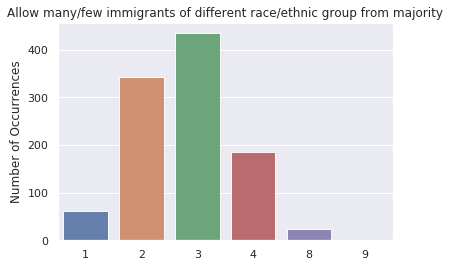

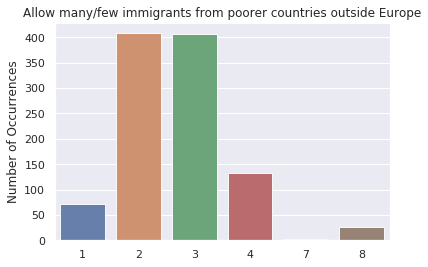

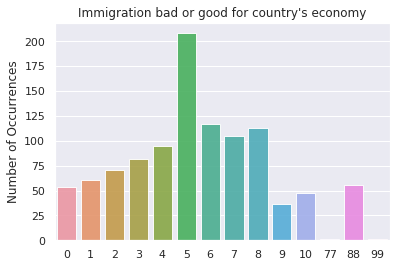

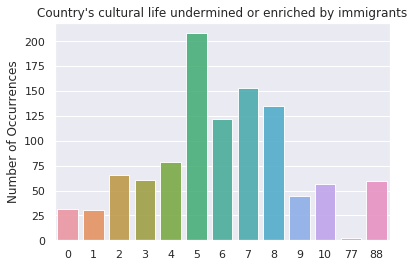

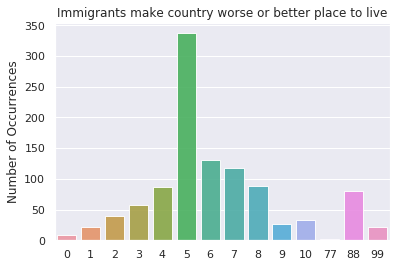

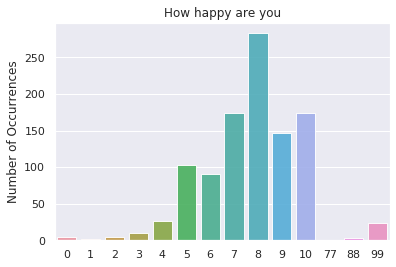

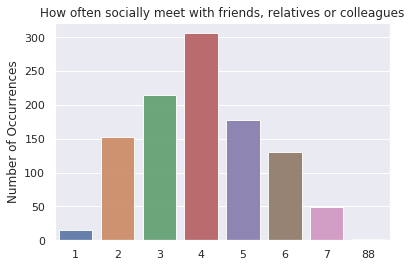

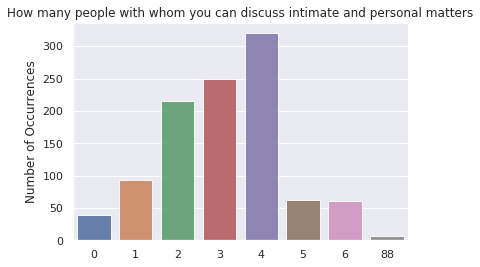

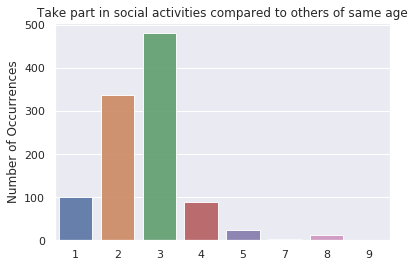

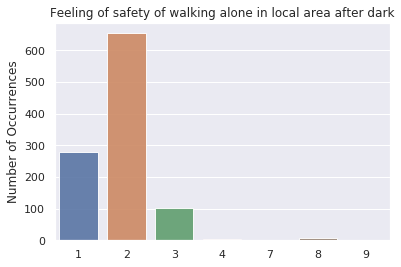

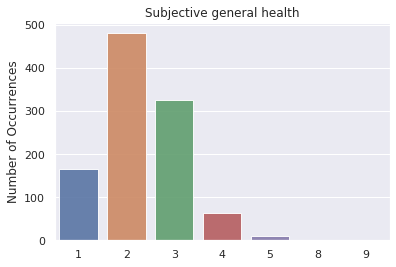

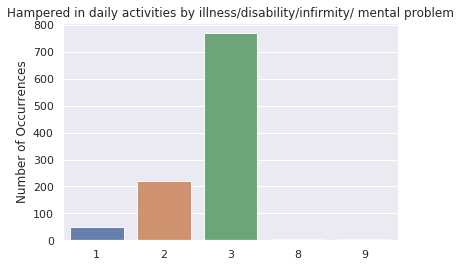

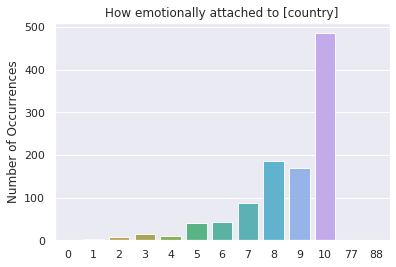

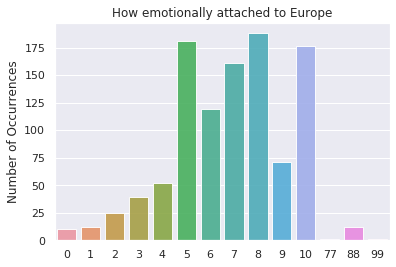

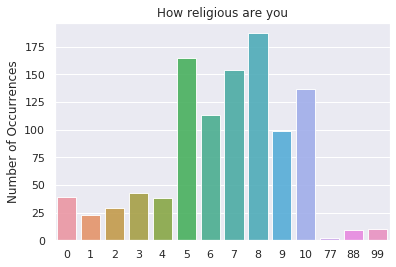

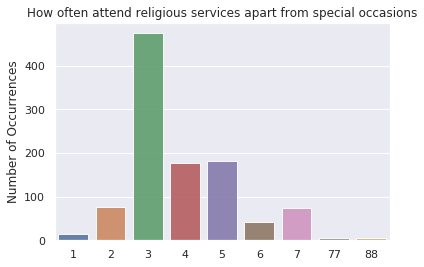

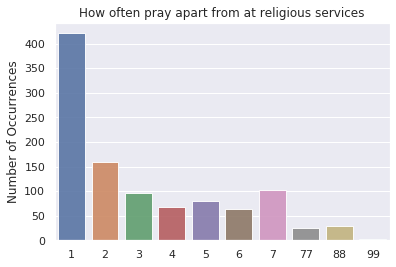

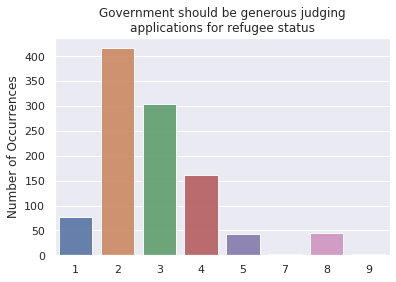

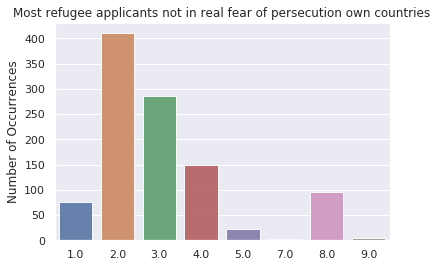

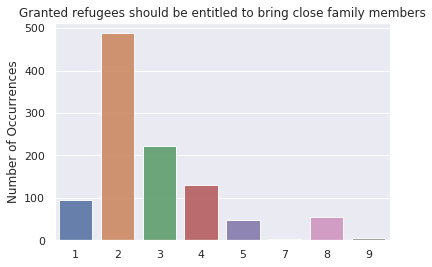

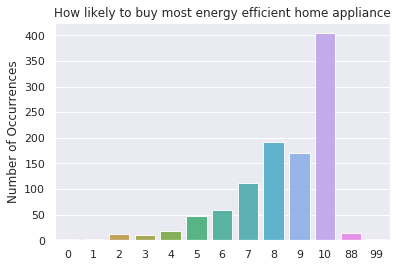

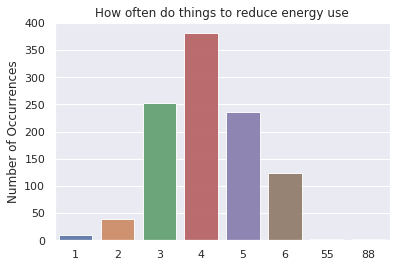

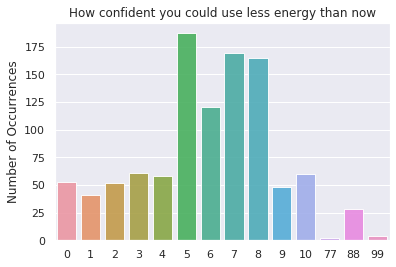

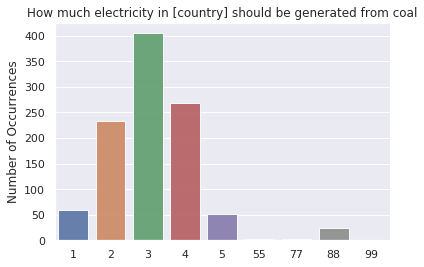

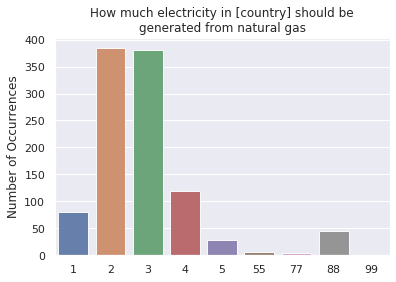

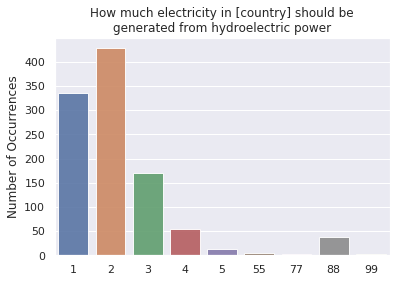

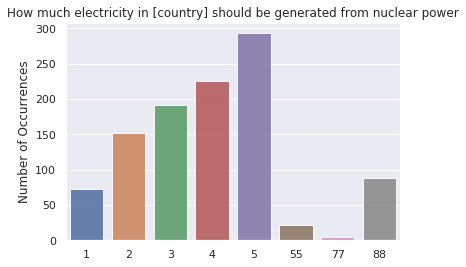

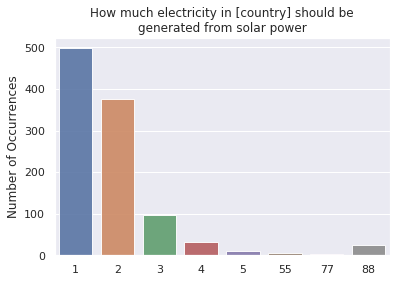

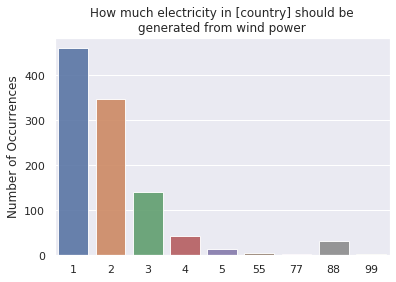

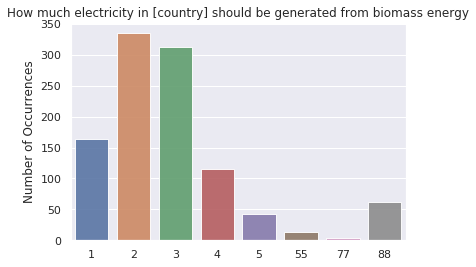

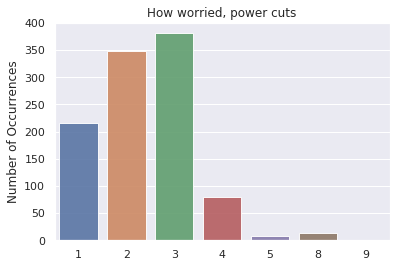

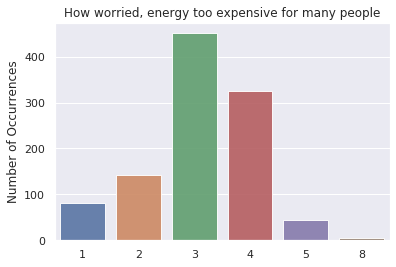

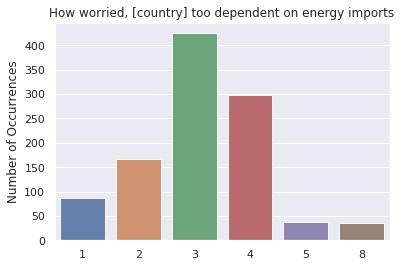

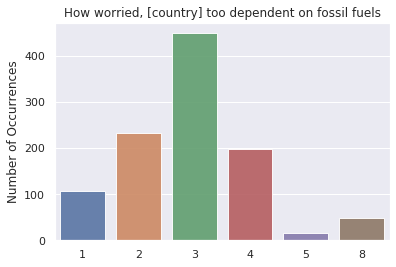

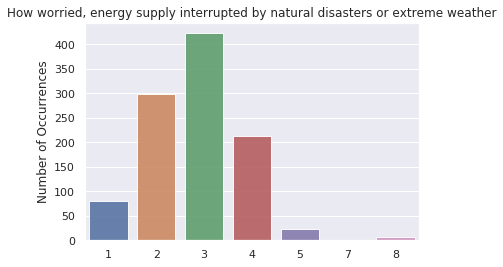

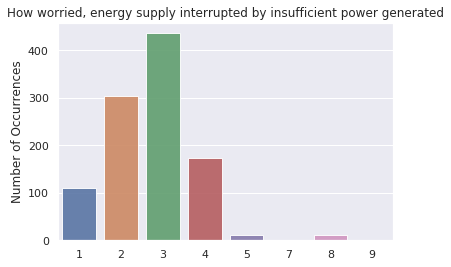

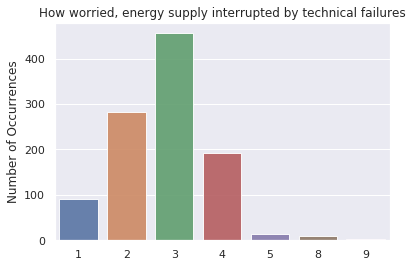

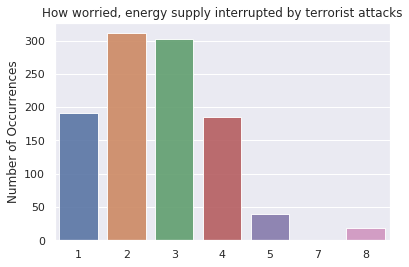

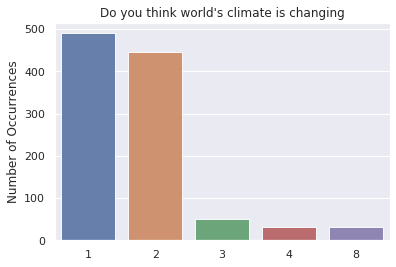

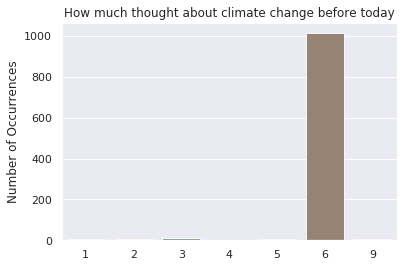

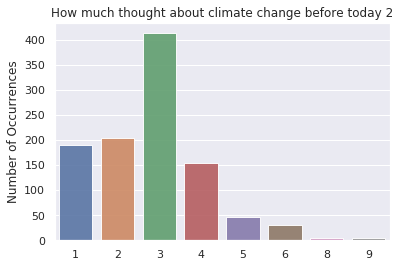

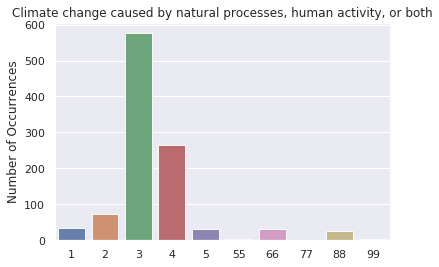

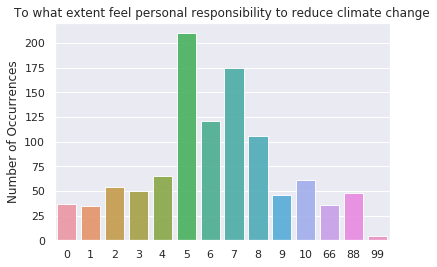

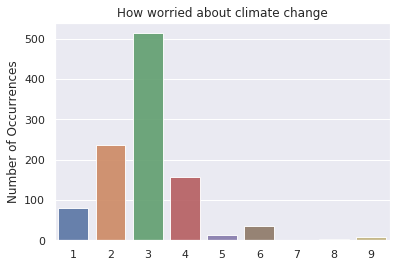

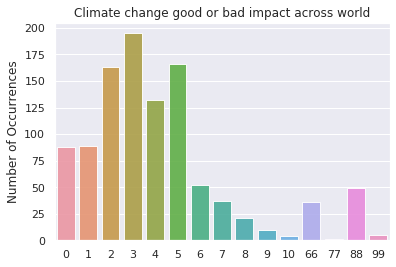

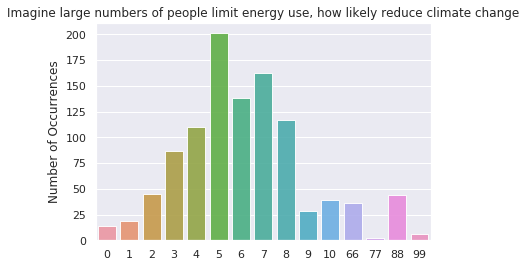

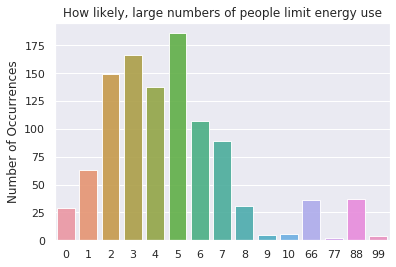

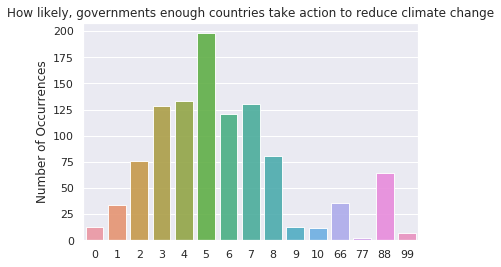

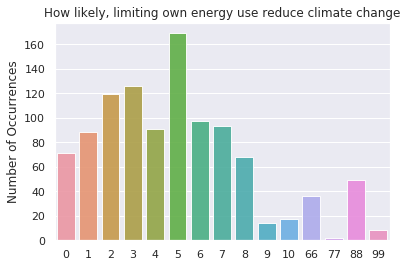

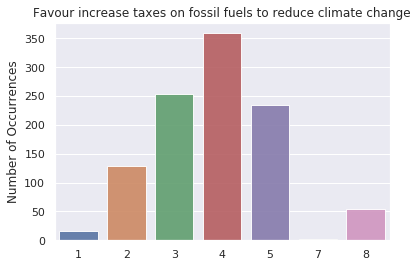

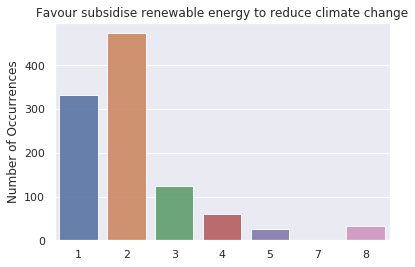

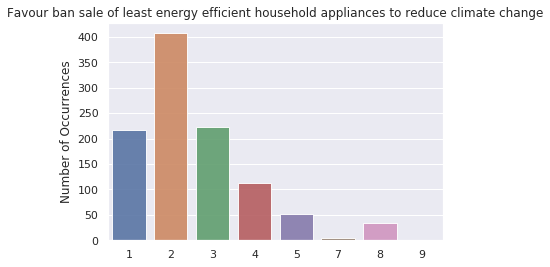

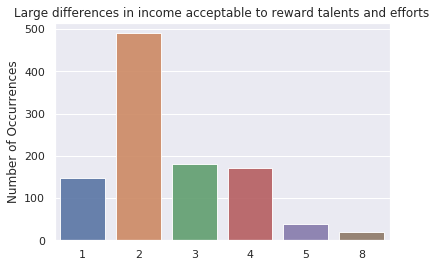

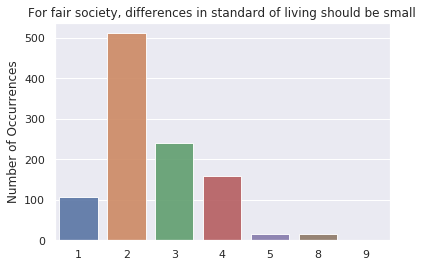

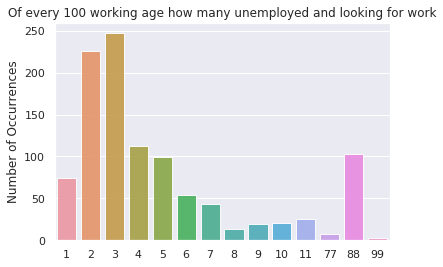

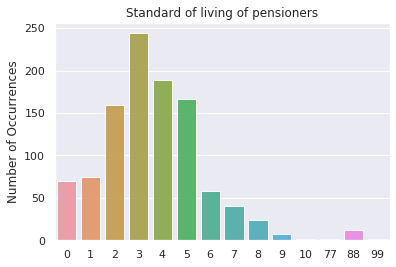

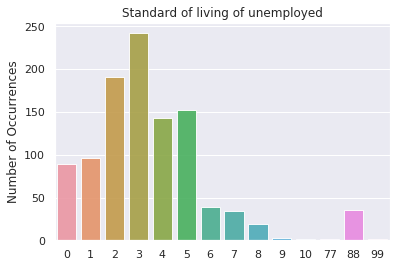

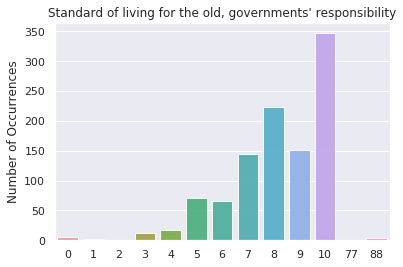

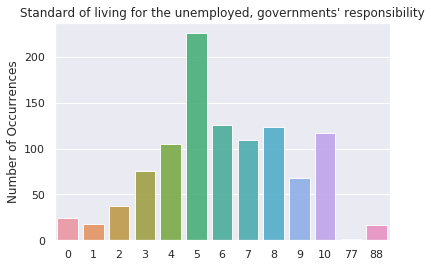

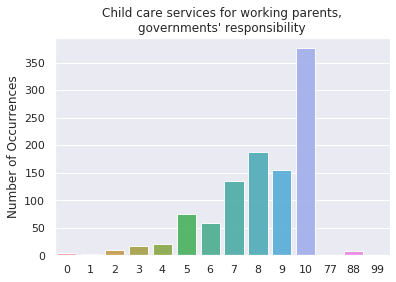

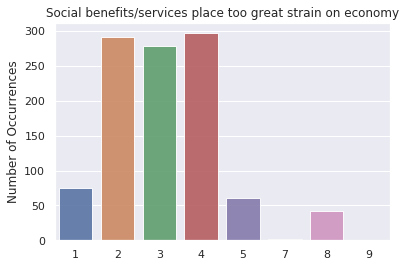

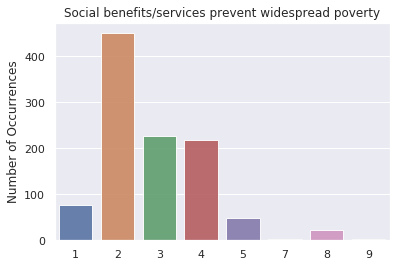

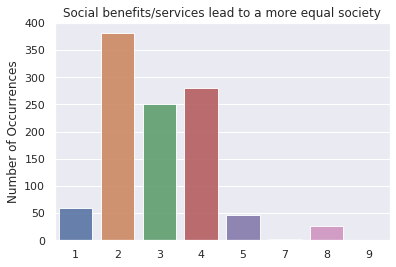

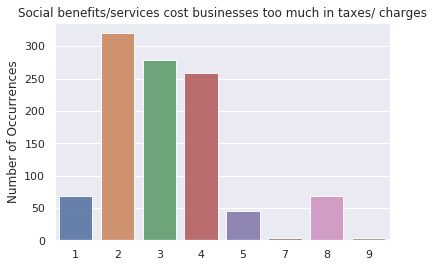

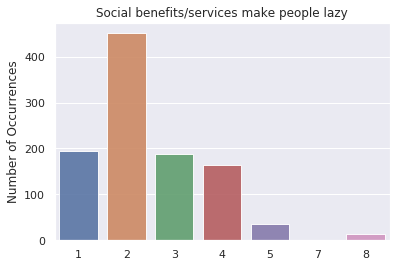

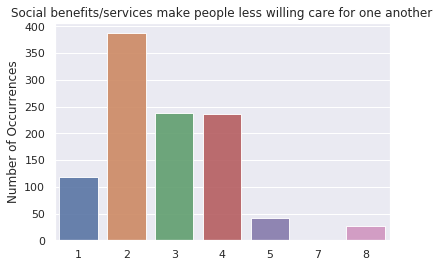

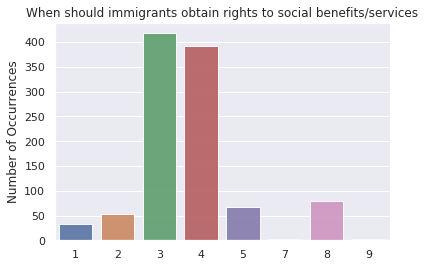

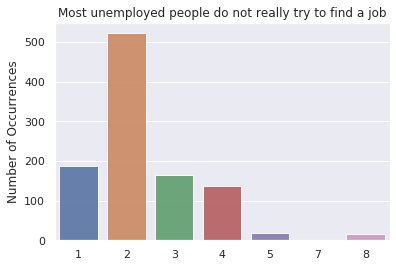

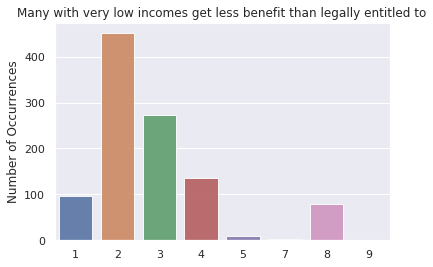

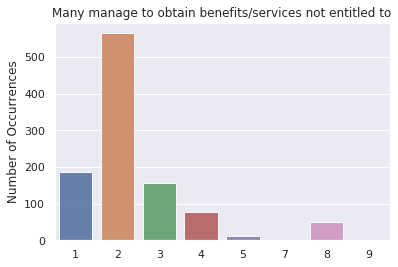

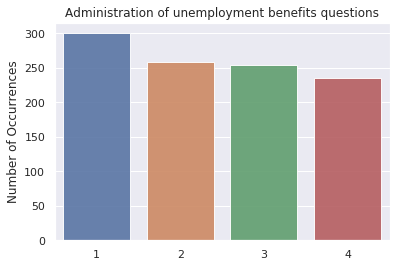

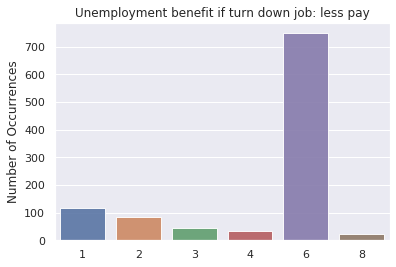

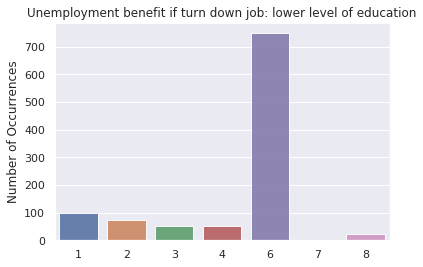

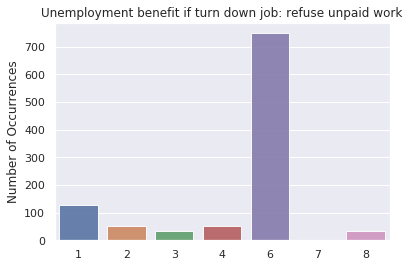

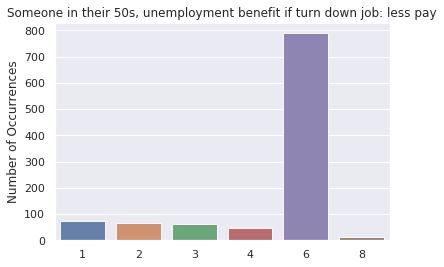

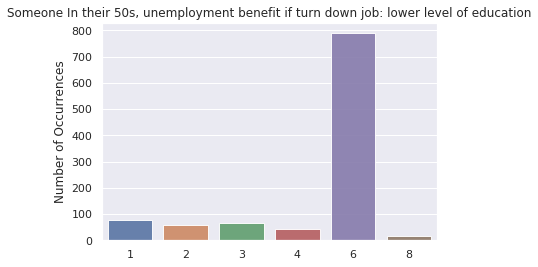

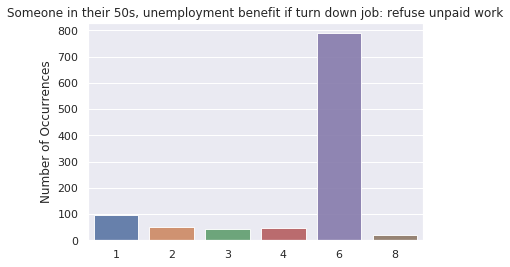

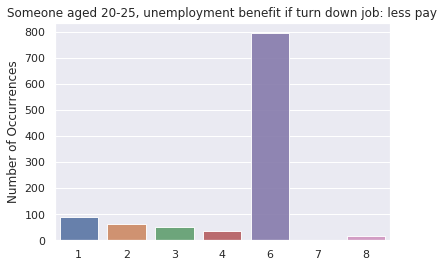

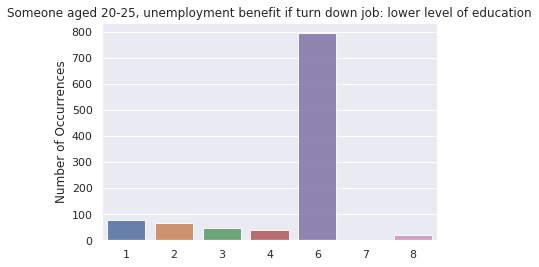

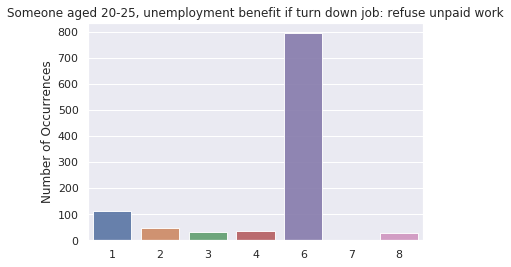

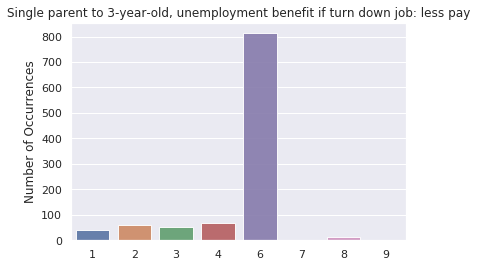

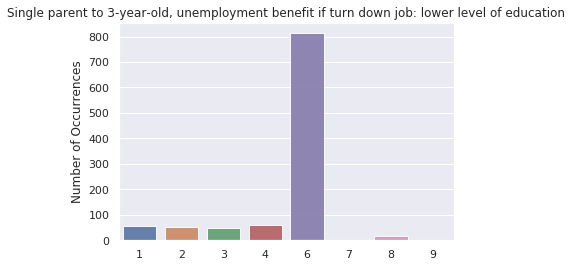

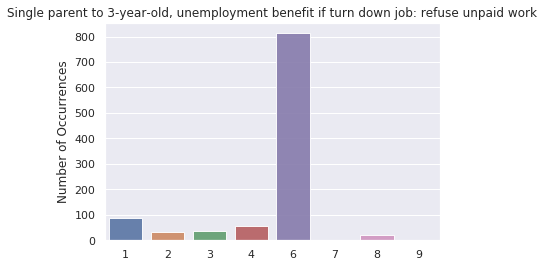

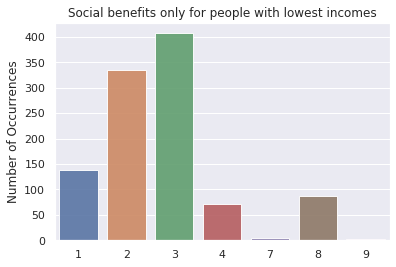

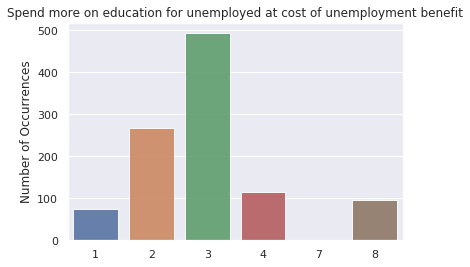

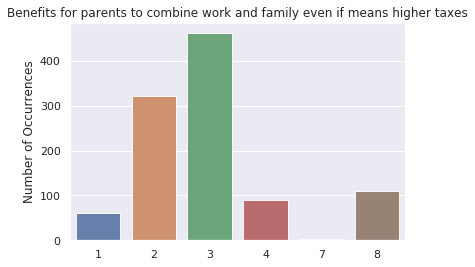

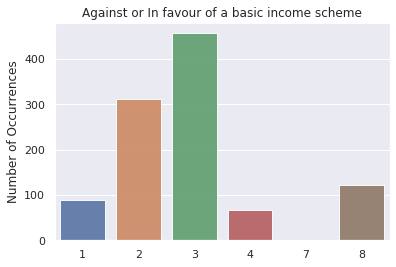

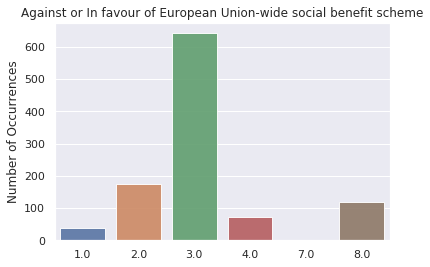

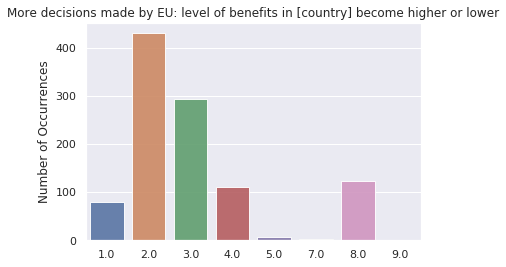

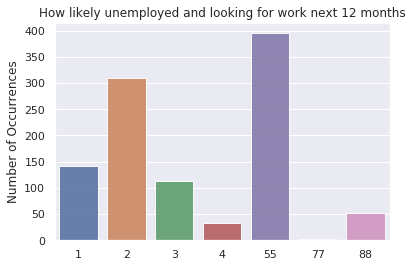

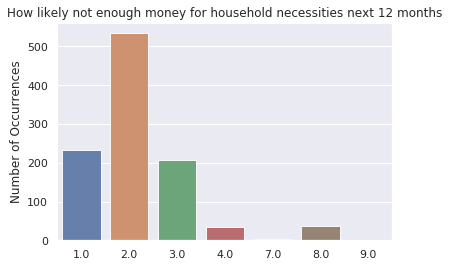

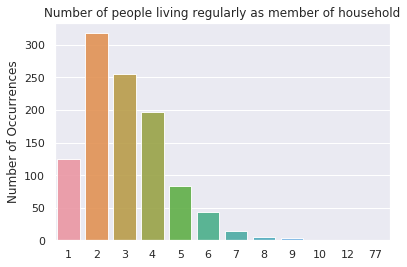

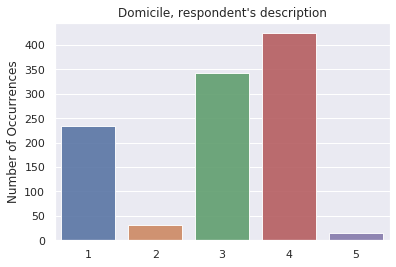

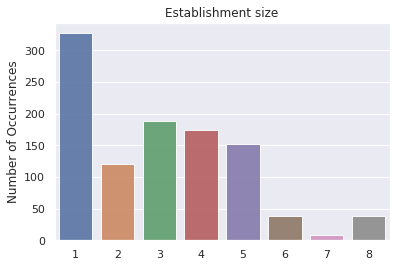

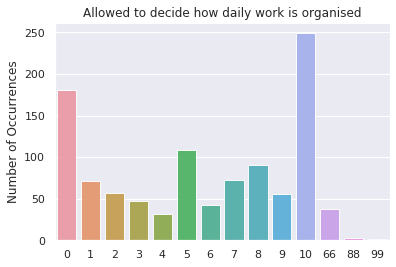

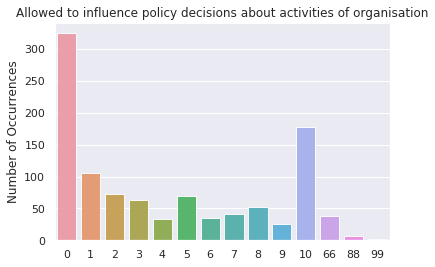

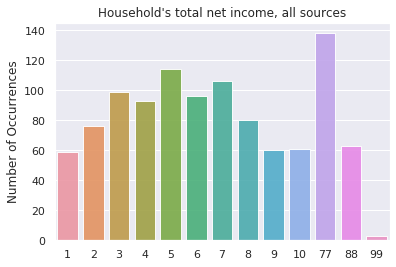

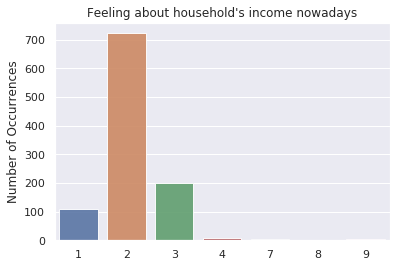

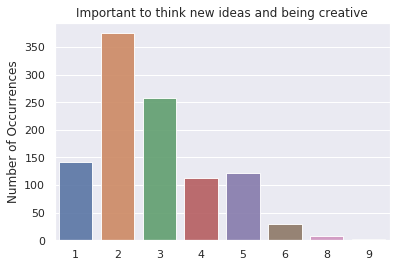

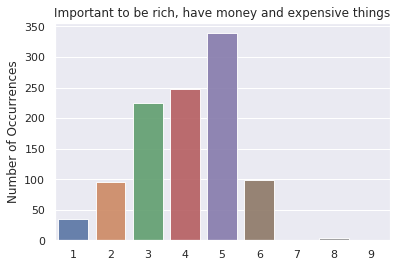

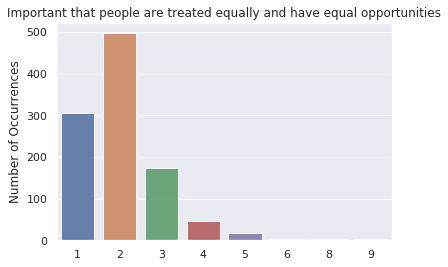

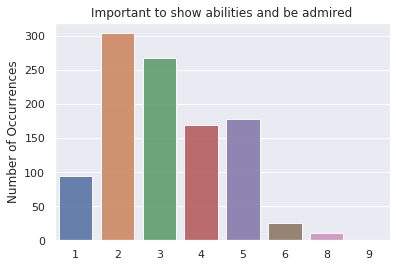

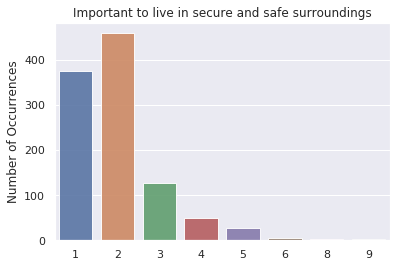

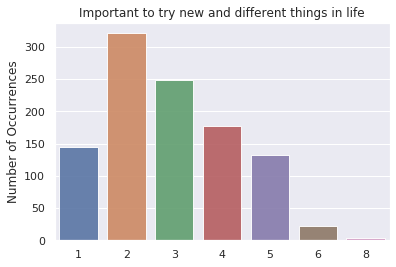

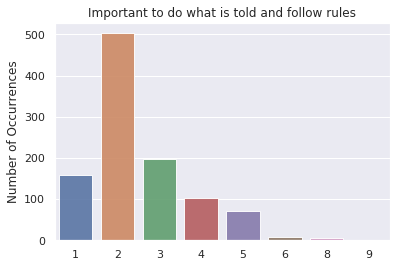

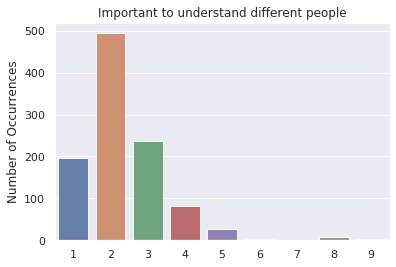

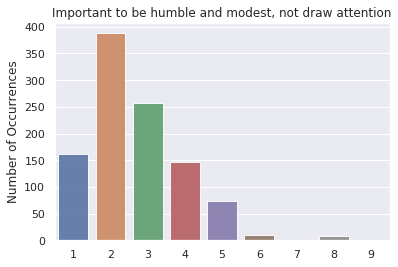

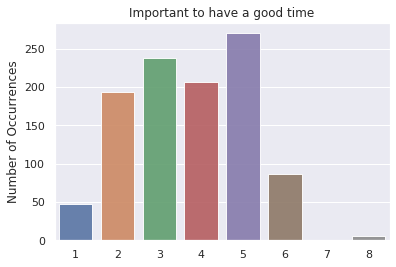

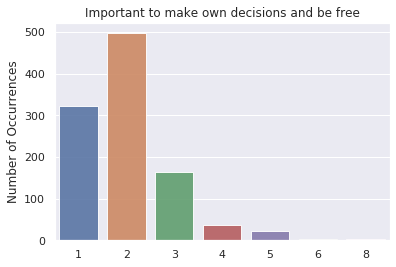

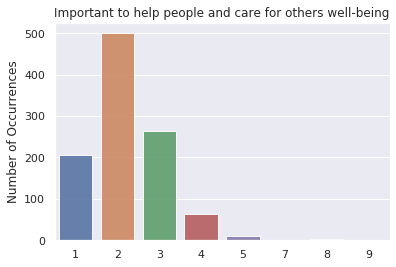

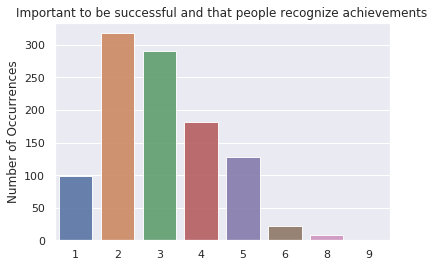

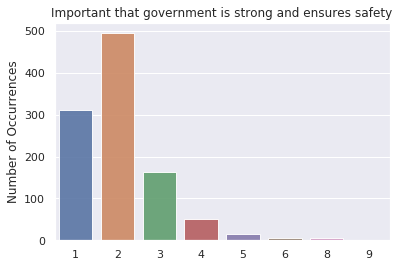

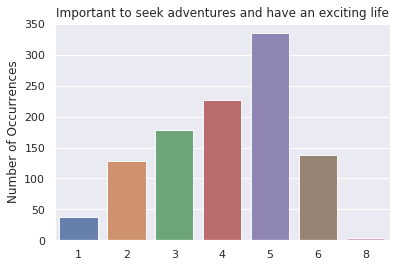

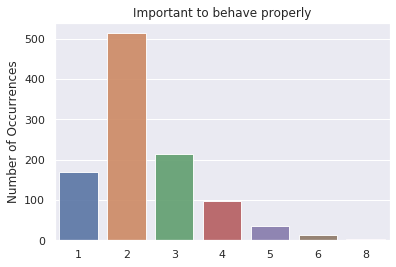

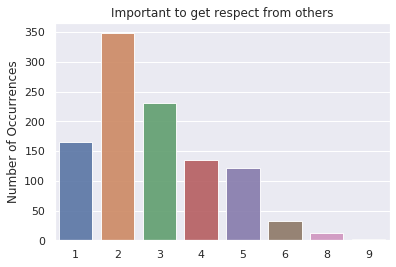

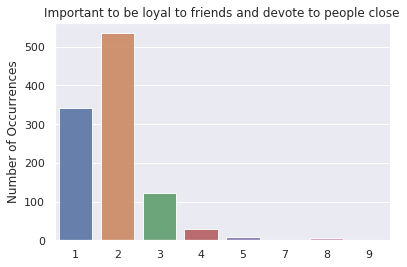

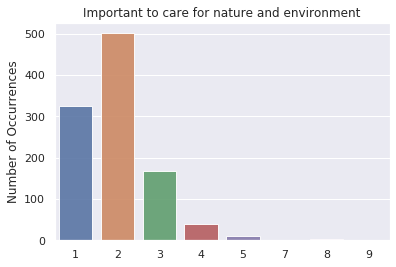

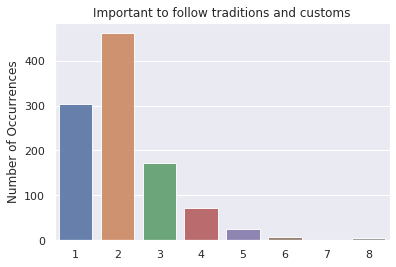

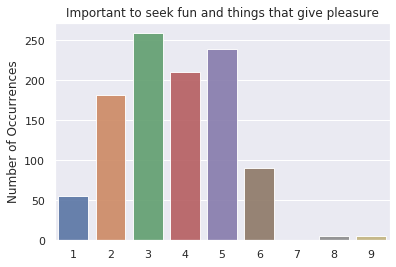

In [126]:
# loop for all variables in the data frame; chart_data - saving value_counts
for i in range(df_ordinal.columns.shape[0]):
    chart_data = df_ordinal.iloc[:,i].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(chart_data.index, chart_data.values, alpha=0.9)
    plt.title(df_ordinal.columns[i])
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.show()

In [127]:
# Listing all values for binary variables
for i in range(df_ordinal.columns.shape[0]):
    print(df_ordinal.iloc[:,i].value_counts(normalize=True))

5    0.476145
1    0.282443
3    0.091603
2    0.084924
4    0.063931
8    0.000954
Name: Internet use, how often, dtype: float64
5     0.225191
3     0.130725
7     0.098282
0     0.095420
2     0.093511
6     0.090649
1     0.083015
4     0.082061
8     0.061069
9     0.020038
10    0.014313
88    0.004771
99    0.000954
Name: Most people can be trusted or you can't be too careful, dtype: float64
5     0.227099
3     0.121183
7     0.112595
6     0.111641
8     0.105916
4     0.097328
2     0.065840
0     0.043893
1     0.036260
10    0.031489
9     0.030534
88    0.014313
99    0.000954
77    0.000954
Name: Most people try to take advantage of you, or try to be fair, dtype: float64
5     0.233779
3     0.155534
2     0.139313
4     0.114504
6     0.078244
0     0.071565
7     0.070611
1     0.065840
8     0.034351
9     0.010496
99    0.009542
10    0.009542
88    0.005725
77    0.000954
Name: Most of the time people helpful or mostly looking out for themselves, dtype: float64
3    

3    0.430344
4    0.310115
2    0.135496
1    0.077290
5    0.042939
8    0.003817
Name: How worried, energy too expensive for many people, dtype: float64
3    0.405534
4    0.284351
2    0.158397
1    0.083015
5    0.035305
8    0.033397
Name: How worried, [country] too dependent on energy imports, dtype: float64
3    0.428435
2    0.221374
4    0.187977
1    0.102099
8    0.045802
5    0.014313
Name: How worried, [country] too dependent on fossil fuels, dtype: float64
3    0.403626
2    0.285305
4    0.204198
1    0.076336
5    0.022901
8    0.006679
7    0.000954
Name: How worried, energy supply interrupted by natural disasters or extreme weather, dtype: float64
3    0.416031
2    0.289122
4    0.165076
1    0.105916
5    0.011450
8    0.010496
9    0.000954
7    0.000954
Name: How worried, energy supply interrupted by insufficient power generated, dtype: float64
3    0.435115
2    0.270038
4    0.183206
1    0.087786
5    0.013359
8    0.008588
9    0.001908
Name: How worried, ene

6    0.775763
1    0.082061
4    0.055344
3    0.033397
2    0.032443
8    0.019084
9    0.000954
7    0.000954
Name: Single parent to 3-year-old, unemployment benefit if turn down job: refuse unpaid work, dtype: float64
3    0.388359
2    0.319656
1    0.132634
8    0.083969
4    0.067748
7    0.004771
9    0.002863
Name: Social benefits only for people with lowest incomes, dtype: float64
3    0.470420
2    0.255725
4    0.110687
8    0.090649
1    0.071565
7    0.000954
Name: Spend more on education for unemployed at cost of unemployment benefit, dtype: float64
3    0.440840
2    0.307252
8    0.104962
4    0.085878
1    0.058206
7    0.002863
Name: Benefits for parents to combine work and family even if means higher taxes, dtype: float64
3    0.436069
2    0.297710
8    0.117366
1    0.083969
4    0.063931
7    0.000954
Name: Against or In favour of a basic income scheme, dtype: float64
3.0    0.612595
2.0    0.166031
8.0    0.114504
4.0    0.068702
1.0    0.036260
7.0    0.001908
N

List of variables from 0 to 10 with missing values to be replaced by the mean value

In [128]:
ord_miss_0to10 = pd.Series(["Most people can be trusted or you can't be too careful",
                           "Most people try to take advantage of you, or try to be fair",
                           "Most of the time people helpful or mostly looking out for themselves",
                           "Trust in country's parliament",
                           "Trust in the legal system",
                           "Trust in the police",
                           "Trust in politicians",
                           "Trust in political parties",
                           "Trust in the European Parliament",
                           "Trust in the United Nations",
                           "Placement on left right scale",
                           "How satisfied with life as a whole",
                           "How satisfied with present state of economy in country",
                           "How satisfied with the national government",
                           "How satisfied with the way democracy works in country",
                           "State of education in country nowadays",
                           "European Union: European unification go further or gone too far",
                           "Immigration bad or good for country's economy",
                           "Country's cultural life undermined or enriched by immigrants",
                           "Immigrants make country worse or better place to live",
                           "How happy are you",
                           "How emotionally attached to [country]",
                           "How emotionally attached to Europe",
                           "How religious are you",
                           "How likely to buy most energy efficient home appliance",
                           "How confident you could use less energy than now",
                           "To what extent feel personal responsibility to reduce climate change",
                           "Climate change good or bad impact across world",
                           "Imagine large numbers of people limit energy use, how likely reduce climate change",
                           "How likely, large numbers of people limit energy use",
                           "How likely, governments enough countries take action to reduce climate change",
                           "How likely, limiting own energy use reduce climate change",
                           "Standard of living of pensioners",
                           "Standard of living of unemployed",
                           "Standard of living for the old, governments' responsibility",
                           "Standard of living for the unemployed, governments' responsibility",
                           "Child care services for working parents,\ngovernments' responsibility",
                           "Allowed to decide how daily work is organised",
                           "Allowed to influence policy decisions about activities of organisation",
                           "Household's total net income, all sources",
                           "State of health services in country nowadays"])

Changing missing values to mean value

In [129]:
for i in ord_miss_0to10:
    df_ordinal[i][df_ordinal[i].isin([66,77,88,99])] = df_ordinal[i][~df_ordinal[i].isin([66,77,88,99])].mean()

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj,

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

Replacing misssing values in No of people living regularly as member of household with mean

In [131]:
df_ordinal["Number of people living regularly as member of household"][df_ordinal["Number of people living regularly as member of household"].isin([77])] = df_ordinal["Number of people living regularly as member of household"][~df_ordinal["Number of people living regularly as member of household"].isin([77])].mean() 

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

Moving variable "Number of people living regularly as member of household" to continuous variables

In [133]:
df_continuous["Number of people living regularly as member of household"] = df_ordinal["Number of people living regularly as member of household"]

In [134]:
df_ordinal = df_ordinal.drop(["Number of people living regularly as member of household"], axis=1)

Creating ordinal variable containing all the remaining variables except for those with scale 0 to 10

In [135]:
df_ord = df_ordinal.iloc[:,~df_ordinal.columns.isin(ord_miss_0to10)]

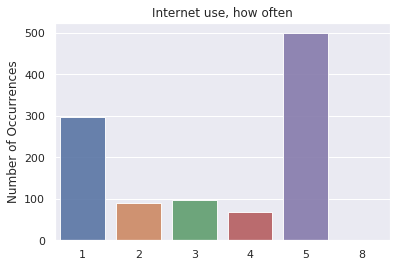

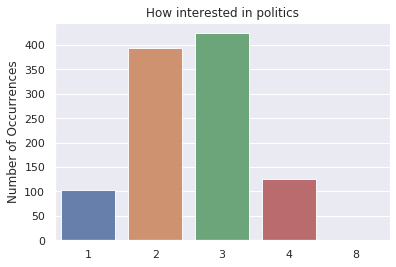

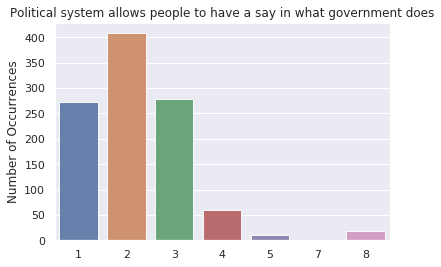

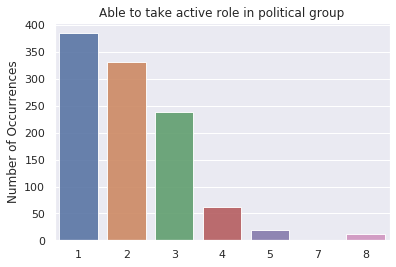

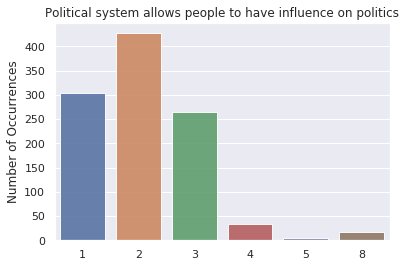

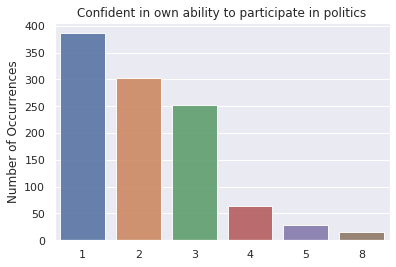

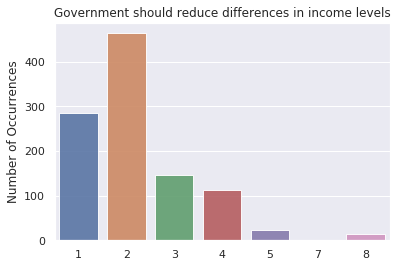

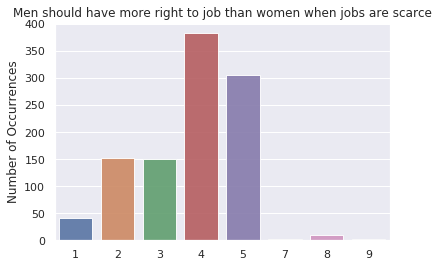

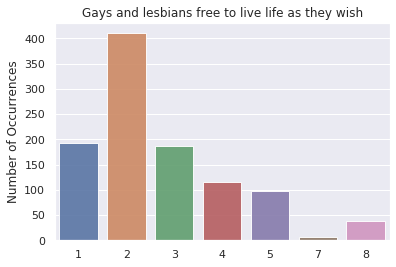

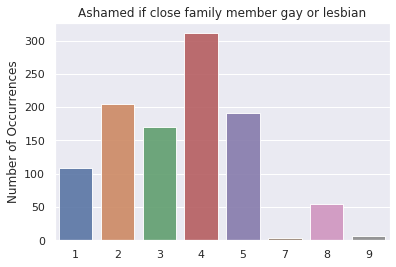

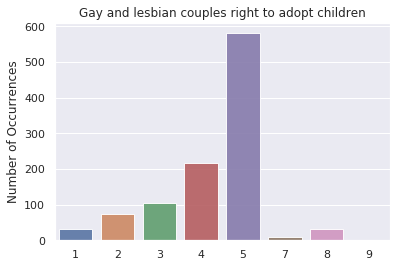

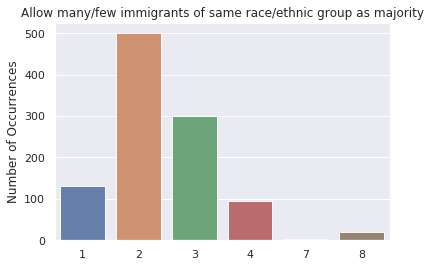

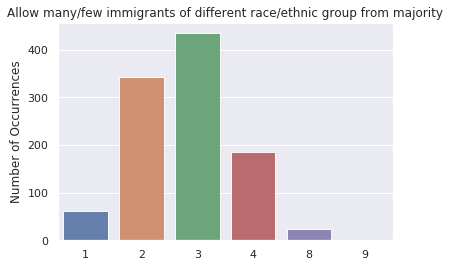

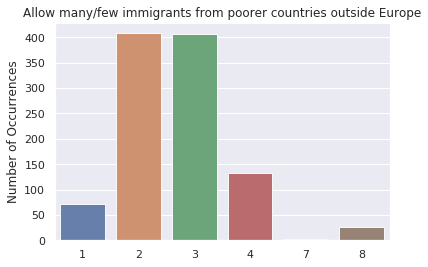

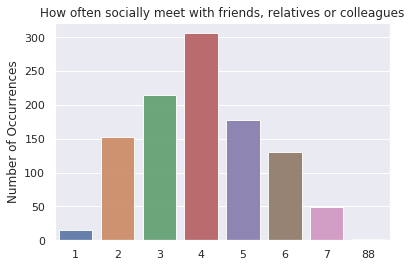

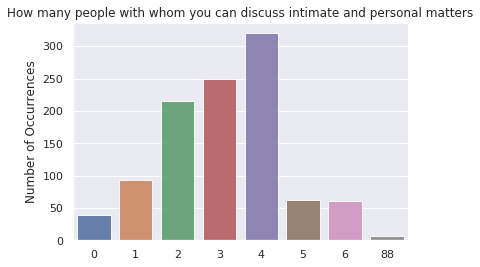

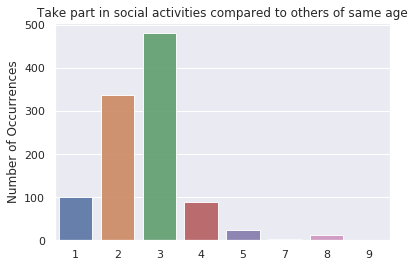

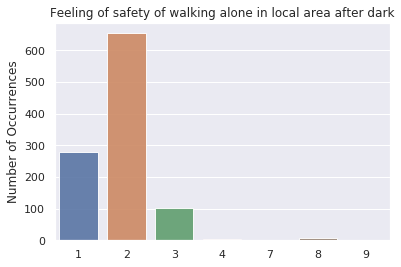

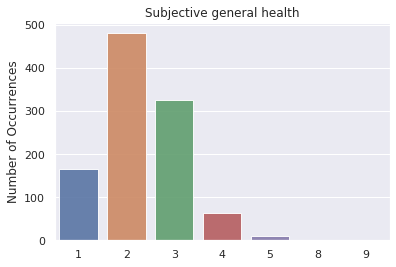

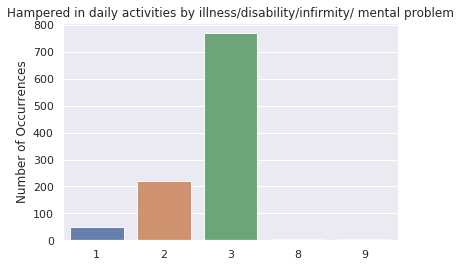

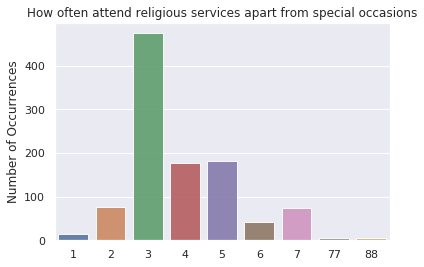

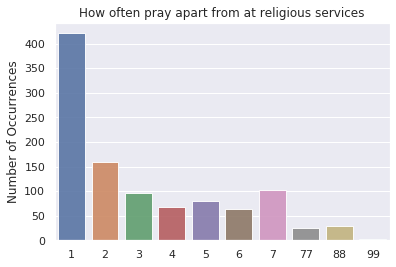

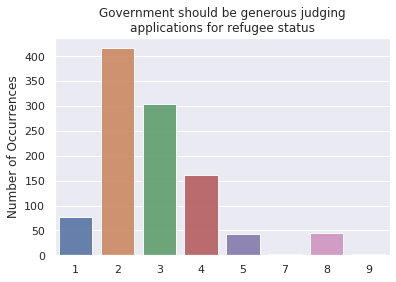

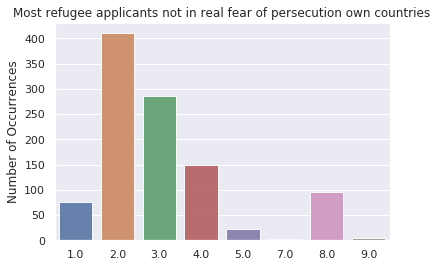

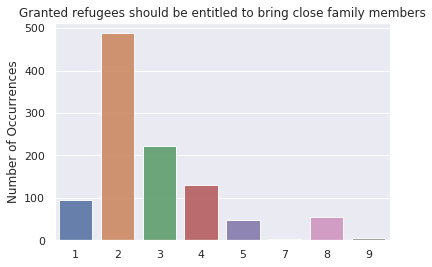

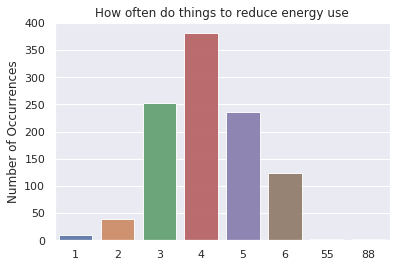

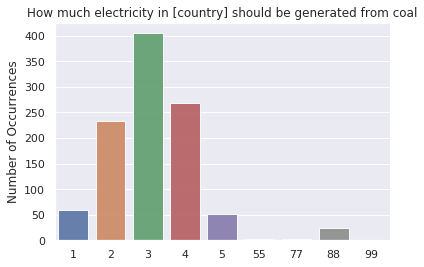

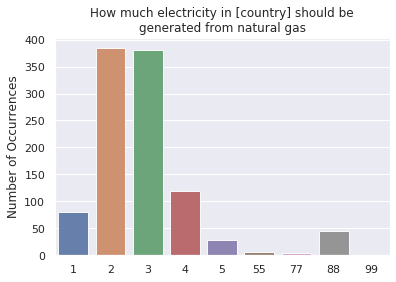

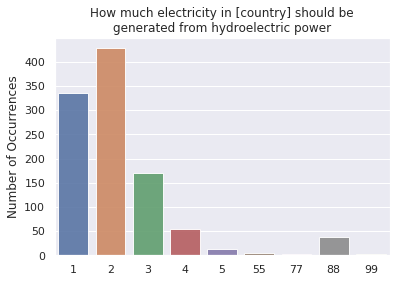

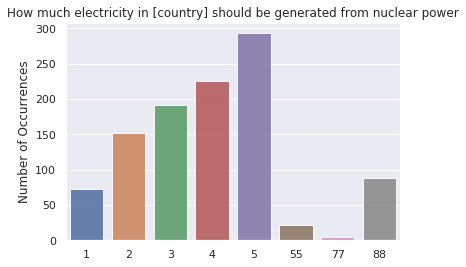

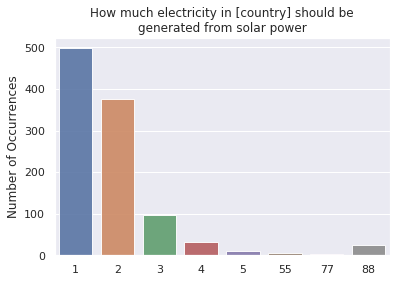

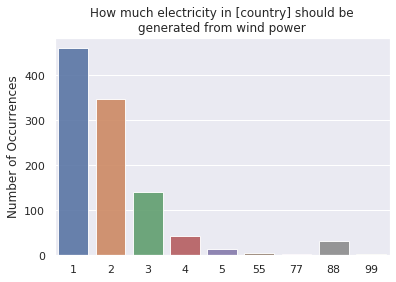

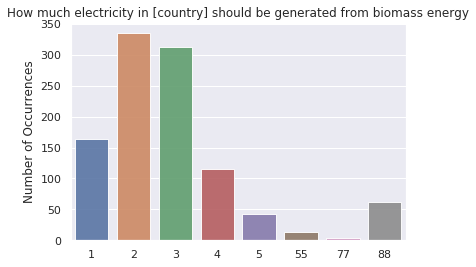

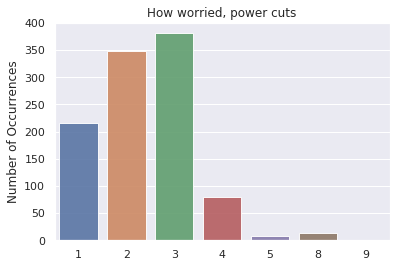

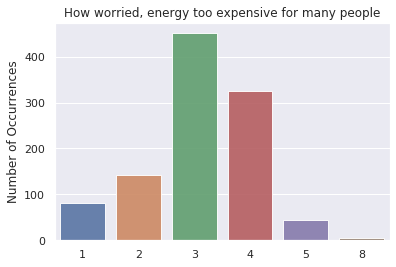

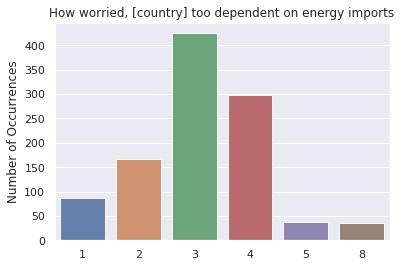

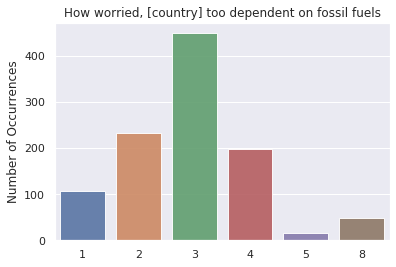

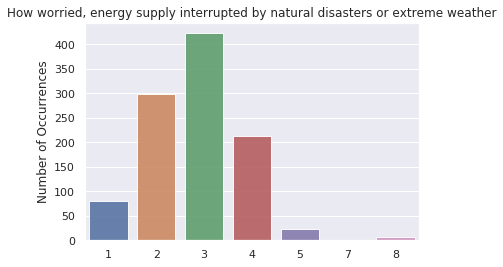

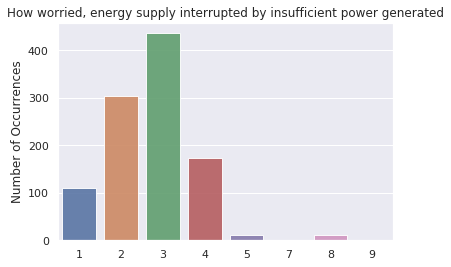

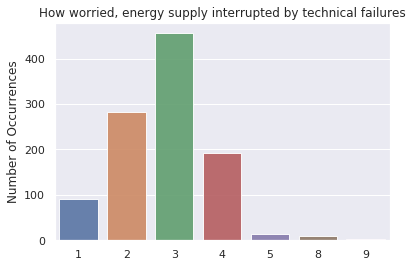

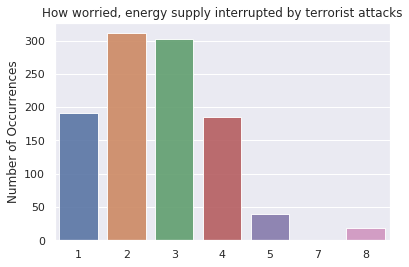

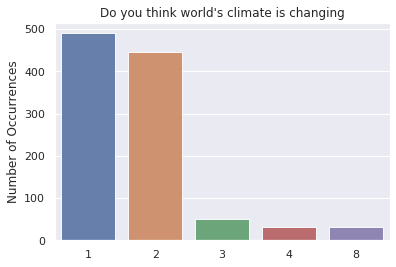

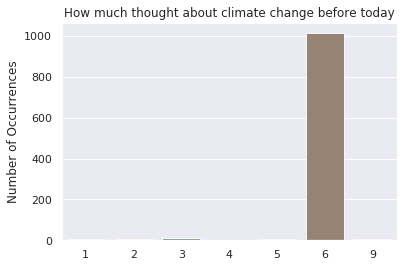

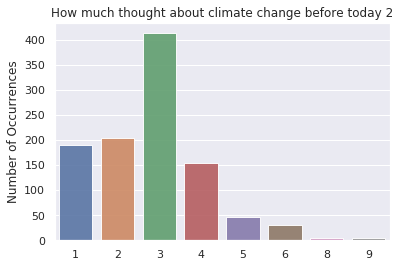

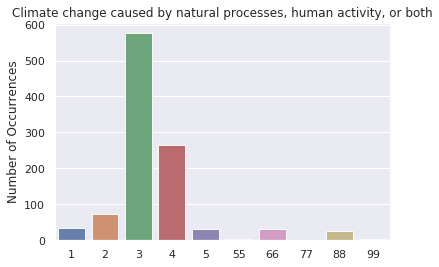

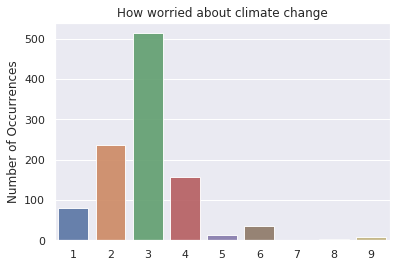

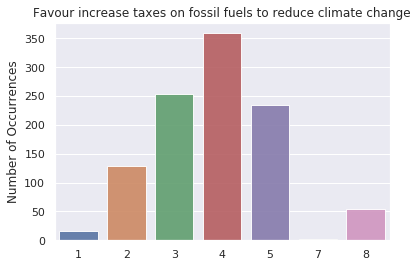

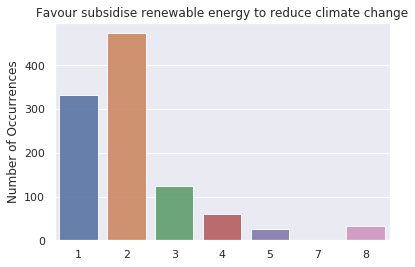

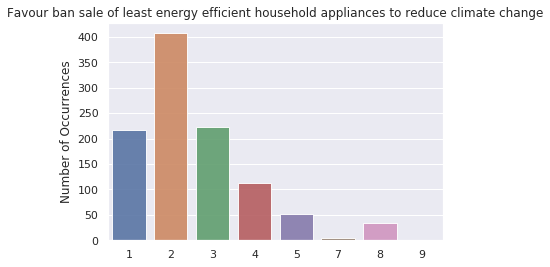

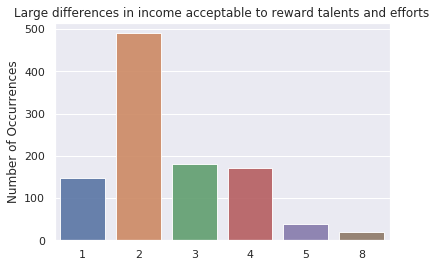

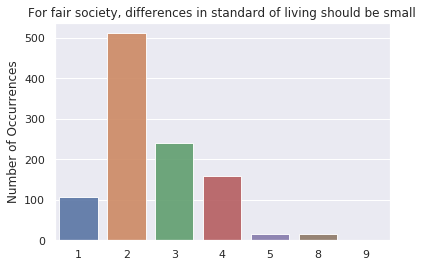

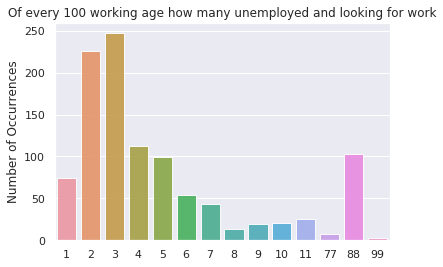

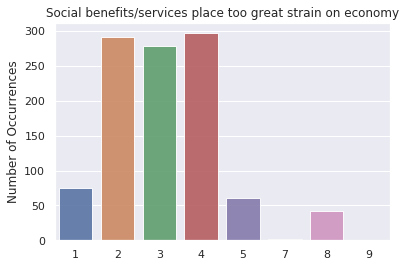

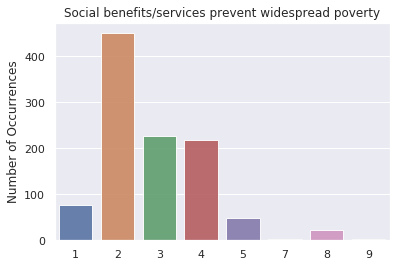

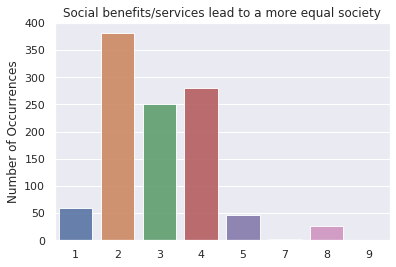

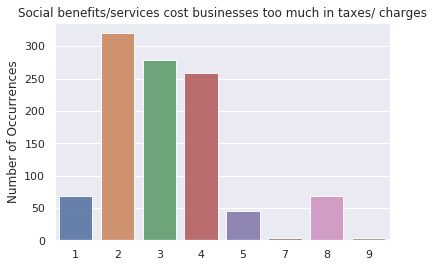

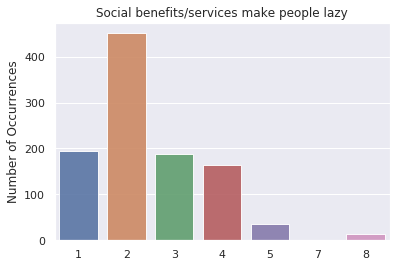

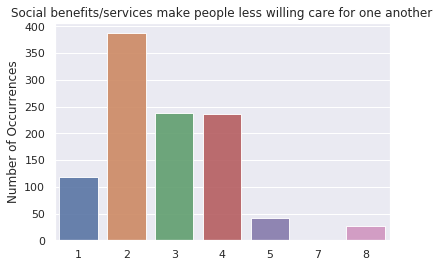

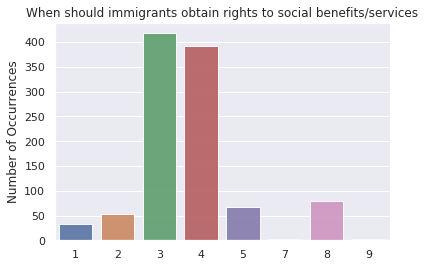

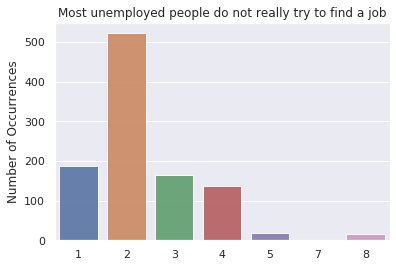

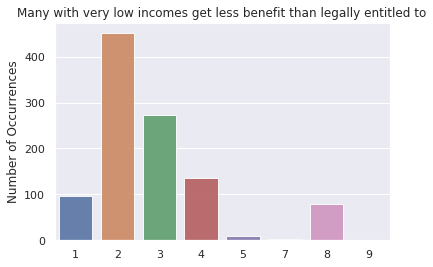

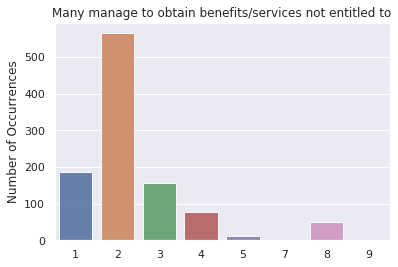

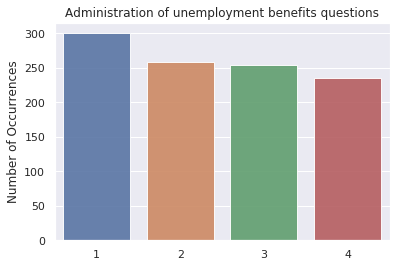

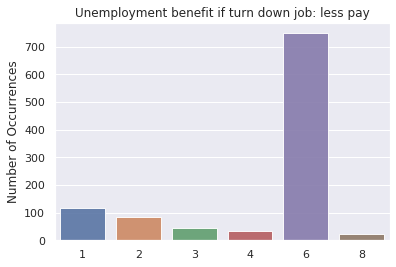

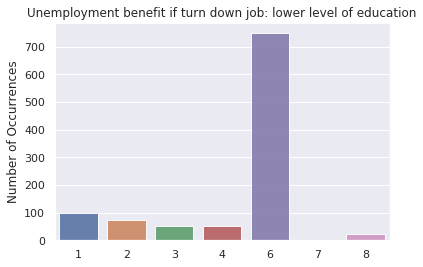

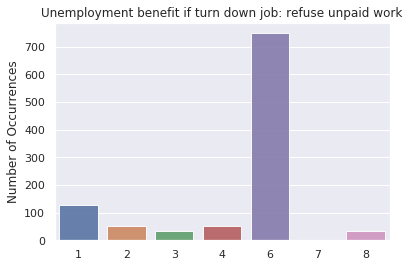

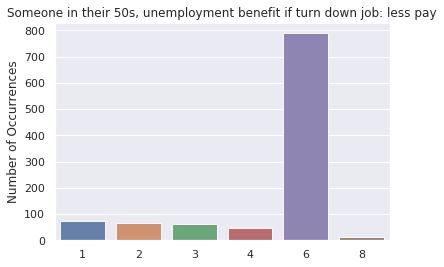

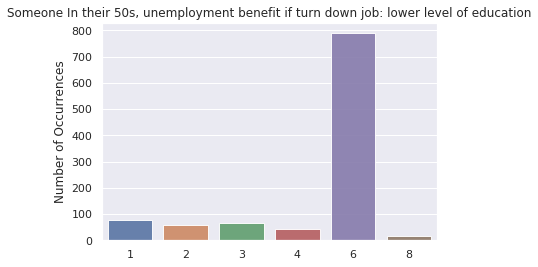

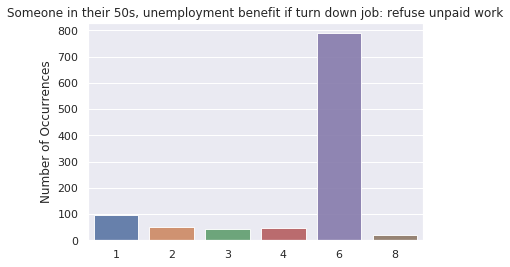

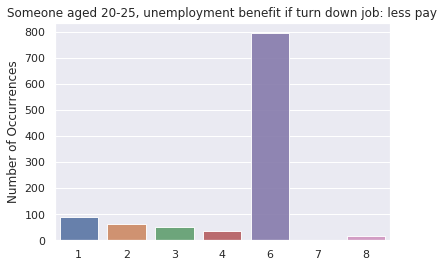

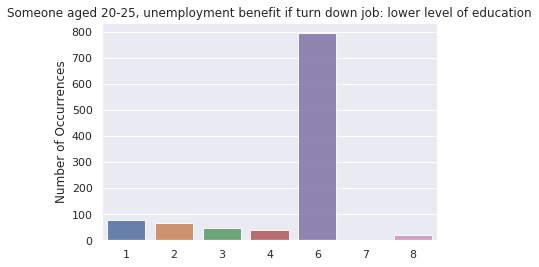

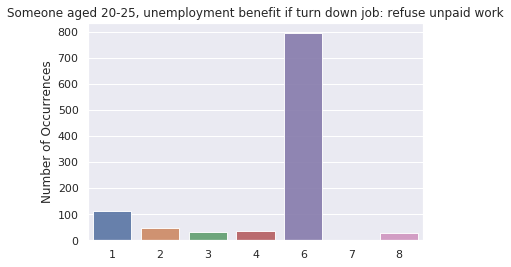

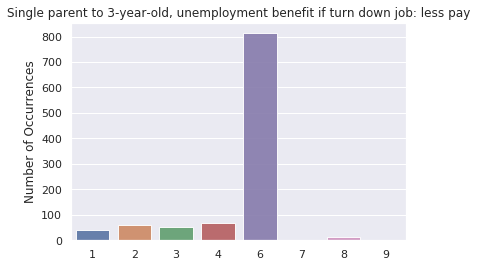

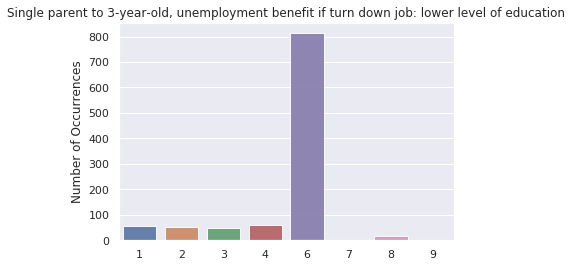

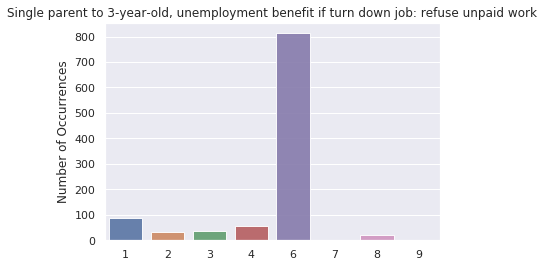

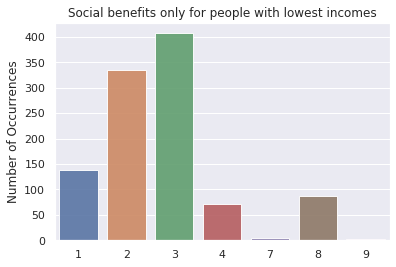

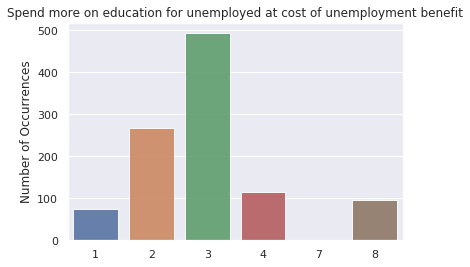

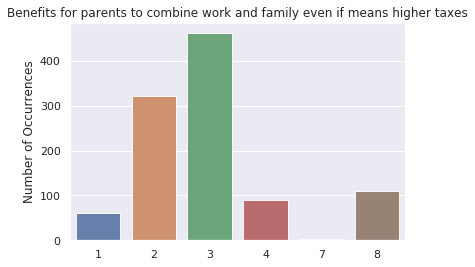

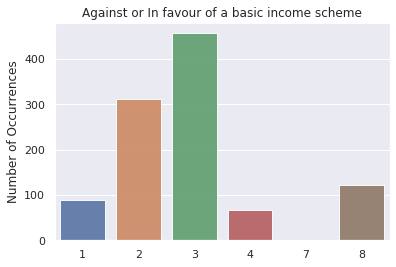

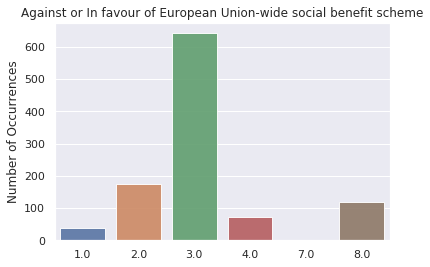

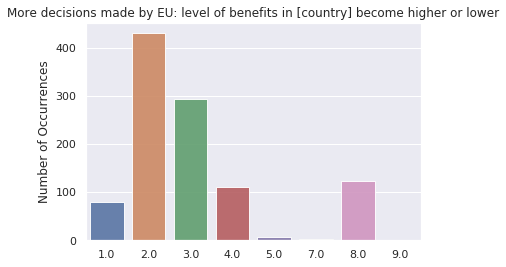

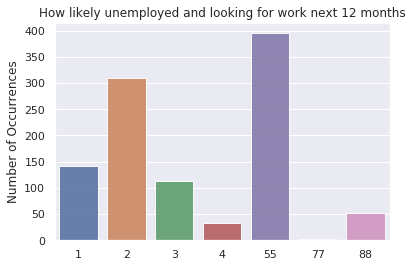

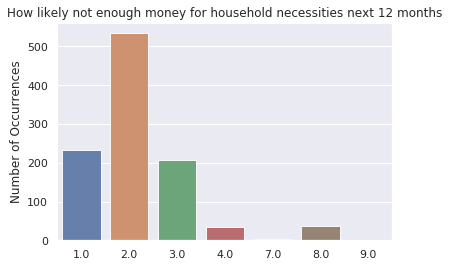

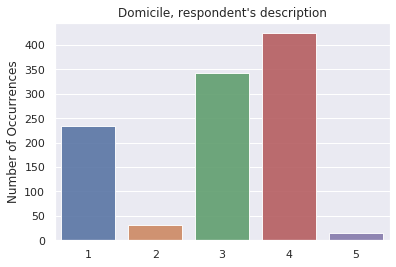

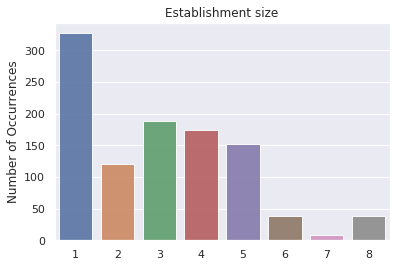

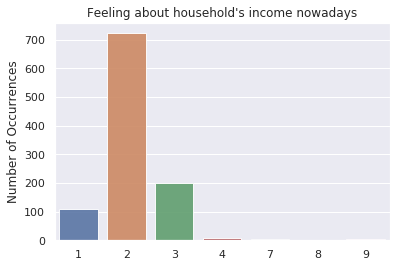

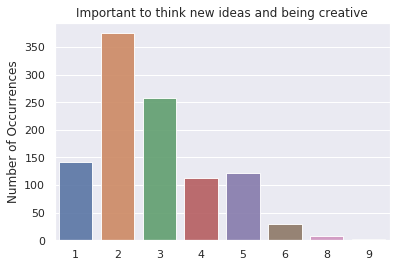

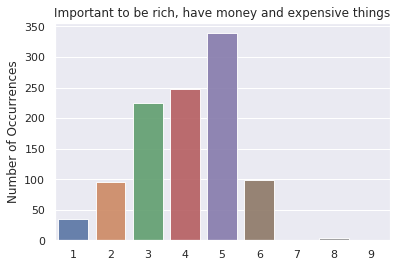

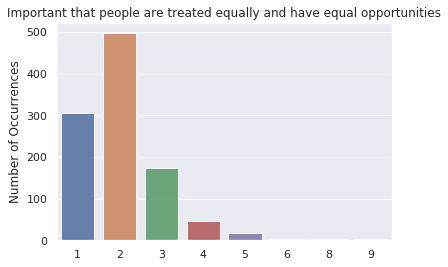

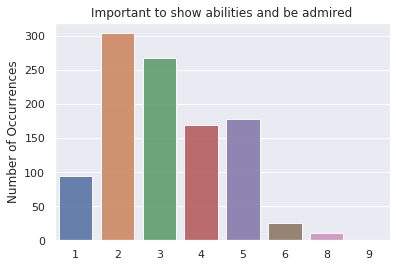

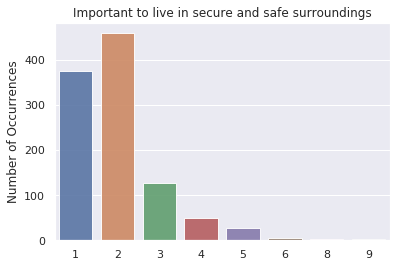

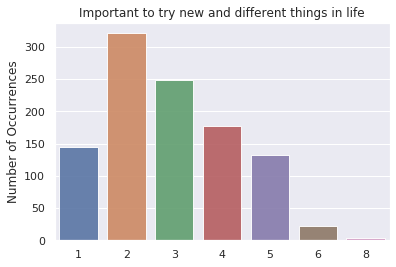

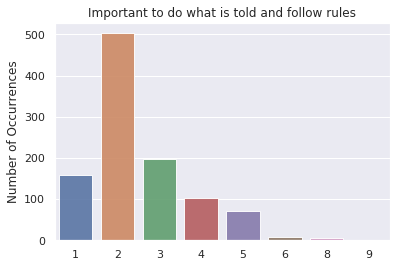

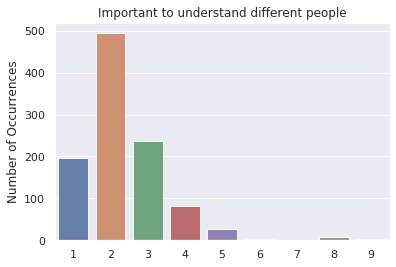

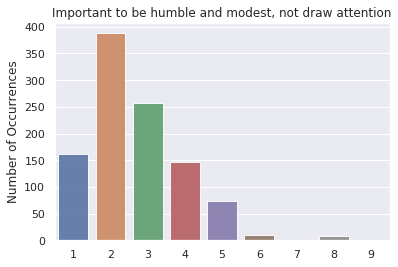

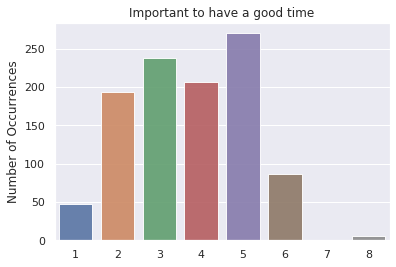

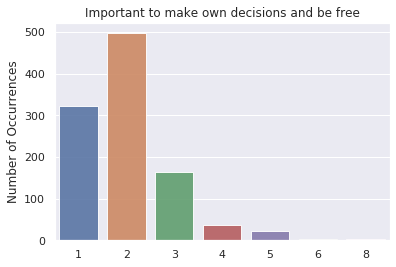

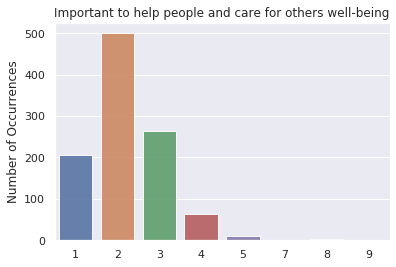

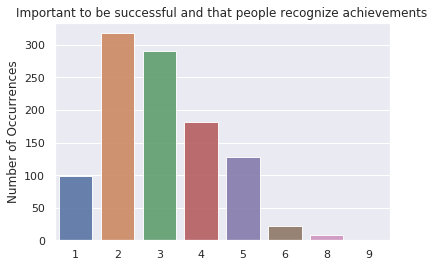

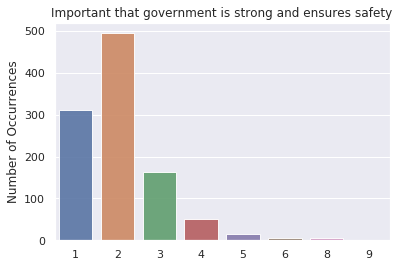

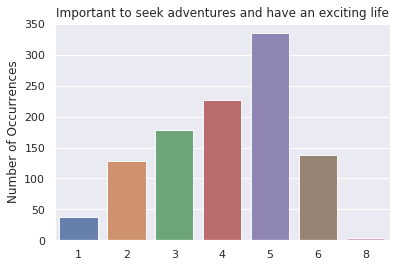

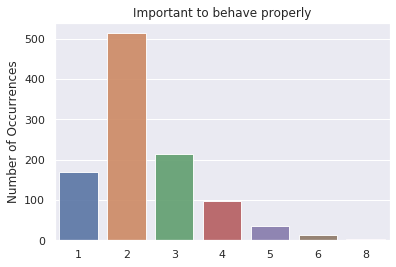

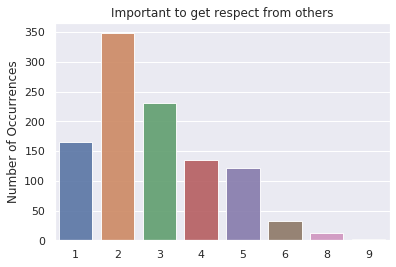

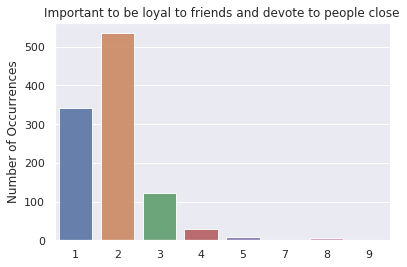

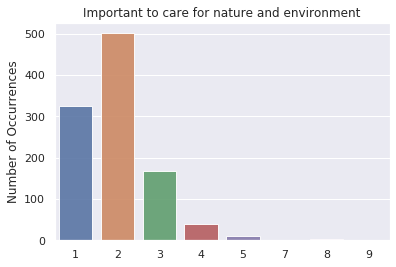

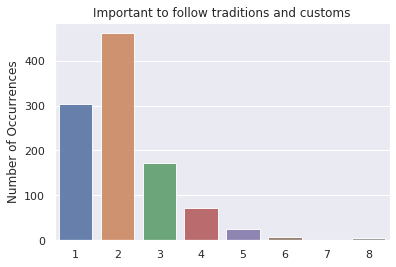

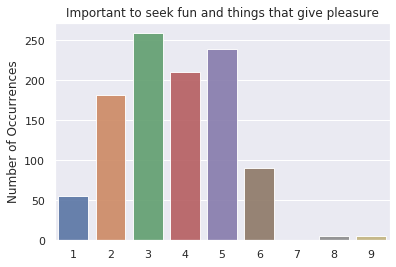

In [136]:
# loop for all variables in the data frame; chart_data - saving value_counts
for i in range(df_ord.columns.shape[0]):
    chart_data = df_ord.iloc[:,i].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(chart_data.index, chart_data.values, alpha=0.9)
    plt.title(df_ord.columns[i])
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.show()

In [137]:
# Listing all values for binary variables
for i in range(df_ord.columns.shape[0]):
    print(df_ord.iloc[:,i].value_counts(normalize=True))

5    0.476145
1    0.282443
3    0.091603
2    0.084924
4    0.063931
8    0.000954
Name: Internet use, how often, dtype: float64
3    0.404580
2    0.375000
4    0.120229
1    0.099237
8    0.000954
Name: How interested in politics, dtype: float64
2    0.389313
3    0.266221
1    0.260496
4    0.056298
8    0.017176
5    0.009542
7    0.000954
Name: Political system allows people to have a say in what government does, dtype: float64
1    0.367366
2    0.315840
3    0.227099
4    0.059160
5    0.019084
8    0.010496
7    0.000954
Name: Able to take active role in political group, dtype: float64
2    0.407443
1    0.289122
3    0.251908
4    0.031489
8    0.016221
5    0.003817
Name: Political system allows people to have influence on politics, dtype: float64
1    0.368321
2    0.289122
3    0.240458
4    0.061069
5    0.026718
8    0.014313
Name: Confident in own ability to participate in politics, dtype: float64
2    0.442748
1    0.272901
3    0.140267
4    0.107824
5    0.022901
8  

Name: Social benefits/services place too great strain on economy, dtype: float64
2    0.429389
3    0.216603
4    0.208969
1    0.073473
5    0.045802
8    0.021947
9    0.001908
7    0.001908
Name: Social benefits/services prevent widespread poverty, dtype: float64
2    0.363550
4    0.267176
3    0.239504
1    0.057252
5    0.043893
8    0.025763
7    0.001908
9    0.000954
Name: Social benefits/services lead to a more equal society, dtype: float64
2    0.305344
3    0.265267
4    0.247137
8    0.065840
1    0.065840
5    0.043893
9    0.003817
7    0.002863
Name: Social benefits/services cost businesses too much in taxes/ charges, dtype: float64
2    0.430344
1    0.185115
3    0.179389
4    0.157443
5    0.033397
8    0.013359
7    0.000954
Name: Social benefits/services make people lazy, dtype: float64
2    0.369275
3    0.227099
4    0.225191
1    0.112595
5    0.039122
8    0.025763
7    0.000954
Name: Social benefits/services make people less willing care for one another, dtype

Deleting variables because not all respondents asked by design/filtering question

In [138]:
df_ord = df_ord.drop(["Administration of unemployment benefits questions",
                     "Unemployment benefit if turn down job: less pay",
                     "Unemployment benefit if turn down job: lower level of education",
                     "Unemployment benefit if turn down job: refuse unpaid work",
                     "Someone in their 50s, unemployment benefit if turn down job: less pay",
                     "Someone In their 50s, unemployment benefit if turn down job: lower level of education",
                     "Someone in their 50s, unemployment benefit if turn down job: refuse unpaid work",
                     "Someone aged 20-25, unemployment benefit if turn down job: less pay",
                     "Someone aged 20-25, unemployment benefit if turn down job: refuse unpaid work",
                     "Single parent to 3-year-old, unemployment benefit if turn down job: less pay",
                     "Single parent to 3-year-old, unemployment benefit if turn down job: lower level of education",
                     "Single parent to 3-year-old, unemployment benefit if turn down job: refuse unpaid work"], axis=1)

Creating a variable storing variables that are scaled 1-5 and which use could be potentially considered if model not satisfactory [POTENTIAL FURTHER MODEL REWORKS]

In [139]:
ord_pot_to_be_used = pd.Series(["Political system allows people to have a say in what government does",
                                "Able to take active role in political group",
                                "Political system allows people to have influence on politics",
                                "Confident in own ability to participate in politics",
                                "Government should reduce differences in income levels",
                                "Men should have more right to job than women when jobs are scarce",
                                "Gays and lesbians free to live life as they wish",
                                "Ashamed if close family member gay or lesbian",
                                "Gay and lesbian couples right to adopt children",
                                "Take part in social activities compared to others of same age",
                                "Subjective general health",
                                "Government should be generous judging\napplications for refugee status",
                                "Most refugee applicants not in real fear of persecution own countries",
                                "Granted refugees should be entitled to bring close family members",
                                "How much electricity in [country] should be generated from coal",
                                "How much electricity in [country] should be\ngenerated from natural gas",
                                "How much electricity in [country] should be\ngenerated from hydroelectric power",
                                "How much electricity in [country] should be generated from nuclear power",
                                "How much electricity in [country] should be\ngenerated from solar power",
                                "How much electricity in [country] should be\ngenerated from wind power",
                                "How much electricity in [country] should be generated from biomass energy",
                                "How worried, power cuts",
                                "How worried, energy too expensive for many people",
                                "How worried, [country] too dependent on energy imports",
                                "How worried, [country] too dependent on fossil fuels",
                                "How worried, energy supply interrupted by natural disasters or extreme weather",
                                "How worried, energy supply interrupted by insufficient power generated",
                                "How worried, energy supply interrupted by technical failures",
                                "How worried, energy supply interrupted by terrorist attacks",
                                "How much thought about climate change before today",
                                "How much thought about climate change before today 2",
                                "Climate change caused by natural processes, human activity, or both",
                                "How worried about climate change",
                                "Favour increase taxes on fossil fuels to reduce climate change",
                                "Favour subsidise renewable energy to reduce climate change",
                                "Favour ban sale of least energy efficient household appliances to reduce climate change",
                                "Large differences in income acceptable to reward talents and efforts",
                                "For fair society, differences in standard of living should be small",
                                "Social benefits/services place too great strain on economy",
                                "Social benefits/services prevent widespread poverty",
                                "Social benefits/services lead to a more equal society",
                                "Social benefits/services cost businesses too much in taxes/ charges",
                                "Social benefits/services make people lazy",
                                "Social benefits/services make people less willing care for one another",
                                "Most unemployed people do not really try to find a job",
                                "Many with very low incomes get less benefit than legally entitled to",
                                "Many manage to obtain benefits/services not entitled to",
                                "Spend more on education for unemployed at cost of unemployment benefit",
                                "Social benefits only for people with lowest incomes",
                                "Benefits for parents to combine work and family even if means higher taxes",
                                "Against or In favour of a basic income scheme",
                                "Against or In favour of European Union-wide social benefit scheme",
                                "More decisions made by EU: level of benefits in [country] become higher or lower",
                                "How likely unemployed and looking for work next 12 months",
                                "How likely not enough money for household necessities next 12 months",
                                "Important to think new ideas and being creative",
                                "Important to be rich, have money and expensive things",
                                "Important that people are treated equally and have equal opportunities",
                                "Important to show abilities and be admired",
                                "Important to live in secure and safe surroundings",
                                "Important to try new and different things in life",
                                "Important to do what is told and follow rules",
                                "Important to understand different people",
                                "Important to be humble and modest, not draw attention",
                                "Important to have a good time",
                                "Important to make own decisions and be free",
                                "Important to help people and care for others well-being",
                                "Important to be successful and that people recognize achievements",
                                "Important that government is strong and ensures safety",
                                "Important to seek adventures and have an exciting life",
                                "Important to behave properly",
                                "Important to get respect from others",
                                "Important to be loyal to friends and devote to people close",
                                "Important to care for nature and environment",
                                "Important to follow traditions and customs",
                                "Important to seek fun and things that give pleasure"])

Creating a variable storing variables which are scaled but answers not grading step by step. Potentially to be used after One Hot Encoding if model not satisfactory [POTENTIAL FURTHER MODEL REWORKS]

In [140]:
ord_not_to_be_used = pd.Series(["How interested in politics",
                               "Allow many/few immigrants of same race/ethnic group as majority",
                               "Allow many/few immigrants from poorer countries outside Europe",
                               "How often socially meet with friends, relatives or colleagues",
                               "How many people with whom you can discuss intimate and personal matters",
                               "Feeling of safety of walking alone in local area after dark",
                               "Hampered in daily activities by illness/disability/infirmity/ mental problem",
                               "How often attend religious services apart from special occasions",
                               "How often pray apart from at religious services",
                               "How often do things to reduce energy use",
                               "Do you think world's climate is changing",
                               "Of every 100 working age how many unemployed and looking for work",
                               "When should immigrants obtain rights to social benefits/services",
                               "Establishment size",
                               "Feeling about household's income nowadays"])

In [141]:
ord_miss_0to10

0     Most people can be trusted or you can't be too...
1     Most people try to take advantage of you, or t...
2     Most of the time people helpful or mostly look...
3                         Trust in country's parliament
4                             Trust in the legal system
5                                   Trust in the police
6                                  Trust in politicians
7                            Trust in political parties
8                      Trust in the European Parliament
9                           Trust in the United Nations
10                        Placement on left right scale
11                   How satisfied with life as a whole
12    How satisfied with present state of economy in...
13           How satisfied with the national government
14    How satisfied with the way democracy works in ...
15               State of education in country nowadays
16    European Union: European unification go furthe...
17        Immigration bad or good for country's 

### Moving "Domicile, respondent's description" to nominal variables

In [145]:
df_nominal["Domicile, respondent's description"] = df_ord["Domicile, respondent's description"]

### Creating a dataset containing all ordinal variables to be further used

In [146]:
# Creating a dataset containing all ordinal variables to be further used
df_ord2 = df_ordinal.iloc[:,df_ordinal.columns.isin(ord_miss_0to10)]

# 6. MERGING ALL DATASETS

In [163]:
ohe_variables.shape

(1048, 46)

In [166]:
df_continuous.shape

(1048, 6)

In [167]:
df_ord2.shape

(1048, 41)

In [169]:
df_binary_mod.shape

(1048, 32)

In [170]:
all_var = df_continuous.join(df_ord2).join(ohe_variables).join(df_binary_mod)

In [171]:
all_var.head(5)

News about politics and current affairs, watching, reading or listening, in minutes  \
36135                                               10.0                                     
36136                                              190.0                                     
36140                                               15.0                                     
36141                                              120.0                                     
36142                                               60.0                                     

       Age of respondent, calculated  Years of full-time education completed  \
36135                             35                                    18.0   
36136                             56                                    12.0   
36140                             33                                    13.0   
36141                             77                                     7.0   
36142                             29                                    13.0   

       Total contracted hours per week in main job overtime excluded  \
36135                                          28.000000               
36136                                          60.000000               
36140                                          40.099068               
36141                                          48.000000               
36142                                          80.000000               

       Total hours normally  worked per week in main job overtime included  \
36135                                               28.0                     
36136                                               80.0                     
36140                                               40.0                     
36141                                               48.0                     
36142                                               80.0                     

       Number of people living regularly as member of household  \
36135                                                3.0          
36136                                                2.0          
36140                                                3.0          
36141                                                5.0          
36142                                                1.0          

       Most people can be trusted or you can't be too careful  \
36135                                                3.0        
36136                                                5.0        
36140                                                7.0        
36141                                                1.0        
36142                                                5.0        

       Most people try to take advantage of you, or try to be fair  \
36135                                                5.0             
36136                                                3.0             
36140                                                7.0             
36141                                                1.0             
36142                                                6.0             

       Most of the time people helpful or mostly looking out for themselves  \
36135                                           3.000000                      
36136                                           3.000000                      
36140                                           3.930165                      
36141                                           5.000000                      
36142                                           1.000000                      

       Trust in country's parliament  Trust in the legal system  \
36135                            3.0                   4.000000   
36136                            9.0                   3.000000   
36140                            0.0                   2.000000   
36141                            1.0                   4.065302   
36142                            1

In [172]:
all_var.shape

(1048, 125)

### Adding class feature to the final dataset

In [174]:
# Setting class feature
y = df_Poland['Party voted for in last national election, Poland']

In [175]:
y.value_counts(normalize=True)

6.0    0.437023
4.0    0.262405
2.0    0.103053
3.0    0.054389
8.0    0.050573
5.0    0.041985
1.0    0.036260
7.0    0.011450
9.0    0.002863
Name: Party voted for in last national election, Poland, dtype: float64

In [176]:
# Merging Together Party (Razem) with Other
y[y == 7] = 9

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [177]:
# Merging all_var with predicted feature
data = all_var.join(y)

#  7. Exporting files using pickle

In [665]:
# Saving files by using pickle
import pickle

In [667]:
file = open('plik', 'wb')
pickle.dump(data, file)
file.close()